# Machine Learning Engineer Nanodegree
## Reinforcement Learning
## Project: Train a Smartcab to Drive

Welcome to the fourth project of the Machine Learning Engineer Nanodegree! In this notebook, template code has already been provided for you to aid in your analysis of the *Smartcab* and your implemented learning algorithm. You will not need to modify the included code beyond what is requested. There will be questions that you must answer which relate to the project and the visualizations provided in the notebook. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide in `agent.py`.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

-----

## Getting Started
In this project, you will work towards constructing an optimized Q-Learning driving agent that will navigate a *Smartcab* through its environment towards a goal. Since the *Smartcab* is expected to drive passengers from one location to another, the driving agent will be evaluated on two very important metrics: **Safety** and **Reliability**. A driving agent that gets the *Smartcab* to its destination while running red lights or narrowly avoiding accidents would be considered **unsafe**. Similarly, a driving agent that frequently fails to reach the destination in time would be considered **unreliable**. Maximizing the driving agent's **safety** and **reliability** would ensure that *Smartcabs* have a permanent place in the transportation industry.

**Safety** and **Reliability** are measured using a letter-grade system as follows:

| Grade 	| Safety 	| Reliability 	|
|:-----:	|:------:	|:-----------:	|
|   A+  	|  Agent commits no traffic violations,<br/>and always chooses the correct action. | Agent reaches the destination in time<br />for 100% of trips. |
|   A   	|  Agent commits few minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 90% of trips. |
|   B   	| Agent commits frequent minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 80% of trips. |
|   C   	|  Agent commits at least one major traffic violation,<br/> such as driving through a red light. | Agent reaches the destination on time<br />for at least 70% of trips. |
|   D   	| Agent causes at least one minor accident,<br/> such as turning left on green with oncoming traffic.       	| Agent reaches the destination on time<br />for at least 60% of trips. |
|   F   	|  Agent causes at least one major accident,<br />such as driving through a red light with cross-traffic.      	| Agent fails to reach the destination on time<br />for at least 60% of trips. |

To assist evaluating these important metrics, you will need to load visualization code that will be used later on in the project. Run the code cell below to import this code which is required for your analysis.

In [29]:
# Import the visualization code  This is agent.py
import random
import math
from smartcab.environment import Agent, Environment
from smartcab.planner import RoutePlanner
from smartcab.simulator import Simulator

class LearningAgent(Agent):
    """ An agent that learns to drive in the Smartcab world.
        This is the object you will be modifying. """ 

    def __init__(self, env, learning=False, epsilon=1.0, alpha=0.5):
        super(LearningAgent, self).__init__(env)     # Set the agent in the evironment 
        self.planner = RoutePlanner(self.env, self)  # Create a route planner
        self.valid_actions = self.env.valid_actions  # The set of valid actions

        # Set parameters of the learning agent
        self.learning = learning # Whether the agent is expected to learn
        self.Q = dict()          # Create a Q-table which will be a dictionary of tuples
        self.epsilon = epsilon   # Random exploration factor
        self.alpha = alpha       # Learning factor

        ###########
        ## TO DO ##
        ###########
        # Set any additional class parameters as needed
        self.trial_num = 0
        self.prev_state = None
        self.counter    = 1 


    def reset(self, destination=None, testing=False):
        """ The reset function is called at the beginning of each trial.
            'testing' is set to True if testing trials are being used
            once training trials have completed. """

        # Select the destination as the new location to route to
        self.planner.route_to(destination)
        
        ########### 
        ## TO DO ##
        ###########
        # Update epsilon using a decay function of your choice
        # Update additional class parameters as needed
        # If 'testing' is True, set epsilon and alpha to 0
        if testing:
            self.epsilon = 0
            self.alpha   = 0
        else:
            self.epsilon = math.exp(-.01*self.trial_num)  
            self.trial_num = self.trial_num +1 
            if self.alpha > .2:
                self.alpha = self.alpha - 0.02

        return None

    def build_state(self):
        """ The build_state function is called when the agent requests data from the 
            environment. The next waypoint, the intersection inputs, and the deadline 
            are all features available to the agent. """

        # Collect data about the environment
        waypoint = self.planner.next_waypoint() # The next waypoint 
        inputs = self.env.sense(self)           # Visual input - intersection light and traffic
        deadline = self.env.get_deadline(self)  # Remaining deadline

        ########### 
        ## TO DO ##
        ###########
        
        # NOTE : you are not allowed to engineer eatures outside of the inputs available.
        # Because the aim of this project is to teach Reinforcement Learning, we have placed 
        # constraints in order for you to learn how to adjust epsilon and alpha, and thus learn about the balance between exploration and exploitation.
        # With the hand-engineered features, this learning process gets entirely negated.
        
        # Set 'state' as a tuple of relevant data for the agent        
        #state = None
        state = (waypoint, inputs['light'], inputs['oncoming'], inputs['left'])
        self.prev_state = state

        return state


    def get_maxQ(self, state):
        """ The get_max_Q function is called when the agent is asked to find the
            maximum Q-value of all actions based on the 'state' the smartcab is in. """

        ########### 
        ## TO DO ##
        ###########
        # Calculate the maximum Q-value of all actions for a given state

        maxQ = None
        for key in self.Q[state]:
            if (maxQ == None) or (maxQ < self.Q[state][key]):
                maxQ = self.Q[state][key]
        return maxQ 


    def createQ(self, state):
        """ The createQ function is called when a state is generated by the agent. """

        ########### 
        ## TO DO ##
        ###########
        # When learning, check if the 'state' is not in the Q-table
        # If it is not, create a new dictionary for that state
        #   Then, for each action available, set the initial Q-value to 0.0
        if self.learning:
            if not (state in self.Q.keys()):
                self.Q[state] = {None: 0.0, 'forward': 0.0, 'left': 0.0, 'right': 0.0}

        return


    def choose_action(self, state):
        """ The choose_action function is called when the agent is asked to choose
            which action to take, based on the 'state' the smartcab is in. """

        # Set the agent state and default action
        self.state = state
        self.next_waypoint = self.planner.next_waypoint()
        action = None

        ########### 
        ## TO DO ##
        ###########
        # When not learning, choose a random action
        # When learning, choose a random action with 'epsilon' probability
        # Otherwise, choose an action with the highest Q-value for the current state
        # Be sure that when choosing an action with highest Q-value that you randomly select between actions that "tie".
        if self.learning:
            if random.random() < self.epsilon:
                action = random.choice(self.valid_actions)
            else:
                maxQ = self.get_maxQ(state)
                argmax_actions = [k for k,v in self.Q[state].items() if v == maxQ]
                action = random.choice(argmax_actions)
        else:
            action = random.choice(self.valid_actions)
        return action


    def learn(self, state, action, reward):
        """ The learn function is called after the agent completes an action and
            receives a reward. This function does not consider future rewards 
            when conducting learning. """

        ########### 
        ## TO DO ##
        ###########
        # When learning, implement the value iteration update rule
        #   Use only the learning rate 'alpha' (do not use the discount factor 'gamma')
        if self.learning:
            self.Q[self.state][action] = (1.0 - self.alpha)*self.Q[self.state][action] + (self.alpha)*(reward)
        self.counter += 1
        return


    def update(self):
        """ The update function is called when a time step is completed in the 
            environment for a given trial. This function will build the agent
            state, choose an action, receive a reward, and learn if enabled. """

        state = self.build_state()          # Get current state
        self.createQ(state)                 # Create 'state' in Q-table
        action = self.choose_action(state)  # Choose an action
        reward = self.env.act(self, action) # Receive a reward
        self.learn(state, action, reward)   # Q-learn

        return
        

def run():
    """ Driving function for running the simulation. 
        Press ESC to close the simulation, or [SPACE] to pause the simulation. """

    ##############
    # Create the environment
    # Flags:
    #   verbose     - set to True to display additional output from the simulation
    #   num_dummies - discrete number of dummy agents in the environment, default is 100
    #   grid_size   - discrete number of intersections (columns, rows), default is (8, 6)
    env = Environment(verbose = True)
    
    ##############
    # Create the driving agent
    # Flags:
    #   learning   - set to True to force the driving agent to use Q-learning
    #    * epsilon - continuous value for the exploration factor, default is 1
    #    * alpha   - continuous value for the learning rate, default is 0.5
    agent = env.create_agent(LearningAgent, learning = True, epsilon = .95, alpha = .5)
    
    ##############
    # Follow the driving agent
    # Flags:
    #   enforce_deadline - set to True to enforce a deadline metric
    env.set_primary_agent(agent, enforce_deadline = True)

    ##############
    # Create the simulation
    # Flags:
    #   update_delay - continuous time (in seconds) between actions, default is 2.0 seconds
    #   display      - set to False to disable the GUI if PyGame is enabled
    #   log_metrics  - set to True to log trial and simulation results to /logs
    #   optimized    - set to True to change the default log file name
    sim = Simulator(env, update_delay = 0.01, log_metrics =True, optimized = True)
    
    ##############
    # Run the simulator
    # Flags:
    #   tolerance  - epsilon tolerance before beginning testing, default is 0.05 
    #   n_test     - discrete number of testing trials to perform, default is 0
    sim.run(n_test = 10, tolerance = 0.015)
    
   
        


if __name__ == '__main__':
    run()


/-------------------------
| Training trial 1
\-------------------------

Environment.reset(): Trial set up with start = (7, 4), destination = (3, 2), deadline = 30
Simulating trial. . . 
epsilon = 1.0000; alpha = 0.4800

/-------------------
| Step 0 Results
\-------------------

Environment.step(): t = 0
Environment.act() [POST]: location: (7, 3), heading: (0, -1), action: right, reward: 2.42214899313
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': None, 'right': None, 'left': None}, 'violation': 0, 'light': 'green', 'state': ('right', 'green', None, None), 'deadline': 30, 't': 0, 'action': 'right', 'reward': 2.4221489931304285, 'waypoint': 'right'}
Agent previous state: ('right', 'green', None, None)
Agent followed the waypoint right. (rewarded 2.42)
97% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

Environment.step(): t = 1
Environment.act() [POST]: location: (8, 3), heading: (1, 0), action: right, rewa

Agent previous state: ('left', 'red', 'left', None)
Agent attempted driving left through a red light. (rewarded -10.52)
47% of time remaining to reach destination.

/-------------------
| Step 16 Results
\-------------------

Environment.step(): t = 16
Environment.act() [POST]: location: (7, 5), heading: (-1, 0), action: None, reward: -4.01438313421
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': 'left', 'right': 'forward', 'left': 'forward'}, 'violation': 1, 'light': 'green', 'state': ('left', 'green', 'left', 'forward'), 'deadline': 14, 't': 16, 'action': None, 'reward': -4.014383134211511, 'waypoint': 'left'}
Agent previous state: ('left', 'green', 'left', 'forward')
Agent idled at a green light with no oncoming traffic. (rewarded -4.01)
43% of time remaining to reach destination.

/-------------------
| Step 17 Results
\-------------------

Environment.step(): t = 17
Environment.act() [POST]: location: (7, 6), heading: (0, 1), action: left, reward: 2.2889612


/-------------------
| Step 1 Results
\-------------------

Environment.step(): t = 1
Environment.act() [POST]: location: (1, 3), heading: (-1, 0), action: right, reward: 0.595214937382
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': None, 'right': None, 'left': 'left'}, 'violation': 0, 'light': 'red', 'state': ('left', 'red', None, 'left'), 'deadline': 24, 't': 1, 'action': 'right', 'reward': 0.5952149373815339, 'waypoint': 'left'}
Agent previous state: ('left', 'red', None, 'left')
Agent drove right instead of left. (rewarded 0.60)
92% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Environment.step(): t = 2
Environment.act() [POST]: location: (1, 2), heading: (0, -1), action: right, reward: 0.462976566057
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': None, 'right': None, 'left': 'forward'}, 'violation': 0, 'light': 'green', 'state': ('forward', 'green', None, 'forward'), 'deadline':


/-------------------
| Step 17 Results
\-------------------

Environment.step(): t = 17
Environment.act() [POST]: location: (3, 6), heading: (0, 1), action: right, reward: -19.2552907954
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': None, 'right': 'left', 'left': 'forward'}, 'violation': 3, 'light': 'red', 'state': ('left', 'red', None, 'forward'), 'deadline': 8, 't': 17, 'action': 'right', 'reward': -19.255290795403276, 'waypoint': 'left'}
Agent previous state: ('left', 'red', None, 'forward')
Agent attempted driving right through traffic and cause a minor accident. (rewarded -19.26)
28% of time remaining to reach destination.

/-------------------
| Step 18 Results
\-------------------

Environment.step(): t = 18
Environment.act() [POST]: location: (3, 6), heading: (0, 1), action: left, reward: -9.79722129676
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': None, 'right': 'left', 'left': None}, 'violation': 2, 'light': 'red', 'state': ('l


/-------------------
| Step 8 Results
\-------------------

Environment.step(): t = 8
Environment.act() [POST]: location: (1, 6), heading: (0, 1), action: left, reward: 1.68427868298
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': None, 'right': None, 'left': 'forward'}, 'violation': 0, 'light': 'green', 'state': ('right', 'green', None, 'forward'), 'deadline': 12, 't': 8, 'action': 'left', 'reward': 1.6842786829844894, 'waypoint': 'right'}
Agent previous state: ('right', 'green', None, 'forward')
Agent drove left instead of right. (rewarded 1.68)
55% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

Environment.step(): t = 9
Environment.act() [POST]: location: (1, 6), heading: (0, 1), action: left, reward: -9.06764039649
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': None, 'right': 'right', 'left': None}, 'violation': 2, 'light': 'red', 'state': ('right', 'red', None, None), 'deadline': 


/-------------------
| Step 4 Results
\-------------------

Environment.step(): t = 4
Environment.act() [POST]: location: (2, 5), heading: (-1, 0), action: None, reward: 2.50623224811
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': 'forward', 'right': None, 'left': 'forward'}, 'violation': 0, 'light': 'red', 'state': ('left', 'red', 'forward', 'forward'), 'deadline': 21, 't': 4, 'action': None, 'reward': 2.5062322481051877, 'waypoint': 'left'}
Agent previous state: ('left', 'red', 'forward', 'forward')
Agent properly idled at a red light. (rewarded 2.51)
80% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Environment.step(): t = 5
Environment.act() [POST]: location: (2, 5), heading: (-1, 0), action: forward, reward: -40.1638061718
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': 'forward', 'right': 'forward', 'left': None}, 'violation': 4, 'light': 'red', 'state': ('left', 'red', 'forward',


/-------------------
| Step 21 Results
\-------------------

Environment.step(): t = 21
Environment.act() [POST]: location: (6, 3), heading: (-1, 0), action: forward, reward: -9.10734200056
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': None, 'right': None, 'left': 'left'}, 'violation': 2, 'light': 'red', 'state': ('forward', 'red', None, 'left'), 'deadline': 4, 't': 21, 'action': 'forward', 'reward': -9.107342000559965, 'waypoint': 'forward'}
Agent previous state: ('forward', 'red', None, 'left')
Agent attempted driving forward through a red light. (rewarded -9.11)
12% of time remaining to reach destination.

/-------------------
| Step 22 Results
\-------------------

Environment.step(): t = 22
Environment.act() [POST]: location: (6, 3), heading: (-1, 0), action: left, reward: -10.5785138739
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': None, 'right': None, 'left': None}, 'violation': 2, 'light': 'red', 'state': ('forward', 'red', None,


/-------------------
| Step 13 Results
\-------------------

Environment.step(): t = 13
Environment.act() [POST]: location: (2, 2), heading: (0, -1), action: right, reward: 1.16417887597
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': None, 'right': None, 'left': None}, 'violation': 0, 'light': 'red', 'state': ('right', 'red', None, None), 'deadline': 7, 't': 13, 'action': 'right', 'reward': 1.1641788759657035, 'waypoint': 'right'}
Agent previous state: ('right', 'red', None, None)
Agent followed the waypoint right. (rewarded 1.16)
30% of time remaining to reach destination.

/-------------------
| Step 14 Results
\-------------------

Environment.step(): t = 14
Environment.act(): Primary agent has reached destination!
Environment.act() [POST]: location: (3, 2), heading: (1, 0), action: right, reward: 0.903728031154
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': None, 'right': None, 'left': None}, 'violation': 0, 'light': 'red', 'state': ('


/-------------------
| Step 14 Results
\-------------------

Environment.step(): t = 14
Environment.act() [POST]: location: (2, 6), heading: (1, 0), action: None, reward: -5.35004263771
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': 'right', 'right': None, 'left': 'forward'}, 'violation': 1, 'light': 'green', 'state': ('forward', 'green', 'right', 'forward'), 'deadline': 6, 't': 14, 'action': None, 'reward': -5.350042637714778, 'waypoint': 'forward'}
Agent previous state: ('forward', 'green', 'right', 'forward')
Agent idled at a green light with no oncoming traffic. (rewarded -5.35)
25% of time remaining to reach destination.

/-------------------
| Step 15 Results
\-------------------

Environment.step(): t = 15
Environment.act() [POST]: location: (3, 6), heading: (1, 0), action: forward, reward: 2.24069349839
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': None, 'right': 'forward', 'left': 'forward'}, 'violation': 0, 'light': 'green',

Agent previous state: ('left', 'red', None, 'right')
Agent attempted driving forward through a red light. (rewarded -10.17)
63% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

Environment.step(): t = 11
Environment.act() [POST]: location: (2, 4), heading: (1, 0), action: right, reward: 1.37596808219
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': None, 'right': None, 'left': 'left'}, 'violation': 0, 'light': 'green', 'state': ('left', 'green', None, 'left'), 'deadline': 19, 't': 11, 'action': 'right', 'reward': 1.3759680821949067, 'waypoint': 'left'}
Agent previous state: ('left', 'green', None, 'left')
Agent drove right instead of left. (rewarded 1.38)
60% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

Environment.step(): t = 12
Environment.act() [POST]: location: (2, 4), heading: (1, 0), action: None, reward: 1.52710649542
Environment.act(): Step data: 


/-------------------
| Step 27 Results
\-------------------

Environment.step(): t = 27
Environment.act() [POST]: location: (1, 2), heading: (0, -1), action: right, reward: 0.892853487007
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': 'forward', 'right': 'left', 'left': 'right'}, 'violation': 0, 'light': 'green', 'state': ('forward', 'green', 'forward', 'right'), 'deadline': 3, 't': 27, 'action': 'right', 'reward': 0.8928534870071645, 'waypoint': 'forward'}
Agent previous state: ('forward', 'green', 'forward', 'right')
Agent drove right instead of forward. (rewarded 0.89)
7% of time remaining to reach destination.

/-------------------
| Step 28 Results
\-------------------

Environment.step(): t = 28
Environment.act() [POST]: location: (8, 2), heading: (-1, 0), action: left, reward: 1.6560037265
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': 'left', 'right': 'left', 'left': None}, 'violation': 0, 'light': 'green', 'state': ('left', 'g

Environment.act() [POST]: location: (6, 5), heading: (0, -1), action: forward, reward: 0.476519358241
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': None, 'right': 'left', 'left': None}, 'violation': 0, 'light': 'green', 'state': ('left', 'green', None, None), 'deadline': 7, 't': 13, 'action': 'forward', 'reward': 0.476519358240863, 'waypoint': 'left'}
Agent previous state: ('left', 'green', None, None)
Agent drove forward instead of left. (rewarded 0.48)
30% of time remaining to reach destination.

/-------------------
| Step 14 Results
\-------------------

Environment.step(): t = 14
Environment.act() [POST]: location: (6, 4), heading: (0, -1), action: forward, reward: 0.0199557334819
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': None, 'right': None, 'left': 'forward'}, 'violation': 0, 'light': 'green', 'state': ('left', 'green', None, 'forward'), 'deadline': 6, 't': 14, 'action': 'forward', 'reward': 0.019955733481937243, 'waypoint'

Agent attempted driving left through traffic and cause a minor accident. (rewarded -19.53)
60% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

Environment.step(): t = 10
Environment.act() [POST]: location: (1, 5), heading: (-1, 0), action: right, reward: 1.26527468615
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': 'forward', 'right': None, 'left': None}, 'violation': 0, 'light': 'red', 'state': ('left', 'red', 'forward', None), 'deadline': 15, 't': 10, 'action': 'right', 'reward': 1.2652746861495694, 'waypoint': 'left'}
Agent previous state: ('left', 'red', 'forward', None)
Agent drove right instead of left. (rewarded 1.27)
56% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

Environment.step(): t = 11
Environment.act() [POST]: location: (1, 4), heading: (0, -1), action: right, reward: 0.804457226204
Environment.act(): Step data: {'inputs': {'light': 'green'


/-------------------
| Step 1 Results
\-------------------

Environment.step(): t = 1
Environment.act() [POST]: location: (2, 6), heading: (1, 0), action: left, reward: 1.66926170453
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': None, 'right': 'left', 'left': None}, 'violation': 0, 'light': 'green', 'state': ('right', 'green', None, None), 'deadline': 29, 't': 1, 'action': 'left', 'reward': 1.6692617045313467, 'waypoint': 'right'}
Agent previous state: ('right', 'green', None, None)
Agent drove left instead of right. (rewarded 1.67)
93% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Environment.step(): t = 2
Environment.act() [POST]: location: (2, 6), heading: (1, 0), action: None, reward: -4.69234595411
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': None, 'right': 'left', 'left': None}, 'violation': 1, 'light': 'green', 'state': ('right', 'green', None, None), 'deadline': 28, 't':

Agent attempted driving right through traffic and cause a minor accident. (rewarded -20.88)
40% of time remaining to reach destination.

/-------------------
| Step 18 Results
\-------------------

Environment.step(): t = 18
Environment.act() [POST]: location: (8, 3), heading: (1, 0), action: None, reward: 2.43232051817
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': None, 'right': None, 'left': 'left'}, 'violation': 0, 'light': 'red', 'state': ('left', 'red', None, 'left'), 'deadline': 12, 't': 18, 'action': None, 'reward': 2.4323205181729373, 'waypoint': 'left'}
Agent previous state: ('left', 'red', None, 'left')
Agent properly idled at a red light. (rewarded 2.43)
37% of time remaining to reach destination.

/-------------------
| Step 19 Results
\-------------------

Environment.step(): t = 19
Environment.act() [POST]: location: (8, 4), heading: (0, 1), action: right, reward: 1.10565438843
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': '


/-------------------
| Step 4 Results
\-------------------

Environment.step(): t = 4
Environment.act() [POST]: location: (2, 5), heading: (-1, 0), action: forward, reward: -10.9251810845
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': 'right', 'right': 'left', 'left': 'left'}, 'violation': 2, 'light': 'red', 'state': ('forward', 'red', 'right', 'left'), 'deadline': 21, 't': 4, 'action': 'forward', 'reward': -10.925181084461189, 'waypoint': 'forward'}
Agent previous state: ('forward', 'red', 'right', 'left')
Agent attempted driving forward through a red light. (rewarded -10.93)
80% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Environment.step(): t = 5
Environment.act() [POST]: location: (2, 5), heading: (-1, 0), action: left, reward: -9.79313910805
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': None, 'right': 'left', 'left': None}, 'violation': 2, 'light': 'red', 'state': ('forward', '

Agent previous state: ('forward', 'red', None, 'forward')
Agent attempted driving forward through a red light with traffic and cause a major accident. (rewarded -39.91)
16% of time remaining to reach destination.

/-------------------
| Step 21 Results
\-------------------

Environment.step(): t = 21
Environment.act() [POST]: location: (7, 2), heading: (0, -1), action: None, reward: -4.18280137959
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': 'forward', 'right': None, 'left': 'left'}, 'violation': 1, 'light': 'green', 'state': ('forward', 'green', 'forward', 'left'), 'deadline': 4, 't': 21, 'action': None, 'reward': -4.182801379587781, 'waypoint': 'forward'}
Agent previous state: ('forward', 'green', 'forward', 'left')
Agent idled at a green light with no oncoming traffic. (rewarded -4.18)
12% of time remaining to reach destination.

/-------------------
| Step 22 Results
\-------------------

Environment.step(): t = 22
Environment.act() [POST]: location: (7, 


/-------------------
| Step 11 Results
\-------------------

Environment.step(): t = 11
Environment.act() [POST]: location: (5, 4), heading: (1, 0), action: left, reward: -19.3249644511
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': 'forward', 'right': None, 'left': None}, 'violation': 3, 'light': 'green', 'state': ('forward', 'green', 'forward', None), 'deadline': 19, 't': 11, 'action': 'left', 'reward': -19.324964451149388, 'waypoint': 'forward'}
Agent previous state: ('forward', 'green', 'forward', None)
Agent attempted driving left through traffic and cause a minor accident. (rewarded -19.32)
60% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

Environment.step(): t = 12
Environment.act() [POST]: location: (5, 4), heading: (1, 0), action: None, reward: -5.3679085841
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': None, 'right': None, 'left': None}, 'violation': 1, 'light': 'green'


/-------------------
| Step 27 Results
\-------------------

Environment.step(): t = 27
Environment.act() [POST]: location: (4, 6), heading: (0, 1), action: forward, reward: -9.86273632778
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': None, 'right': None, 'left': 'left'}, 'violation': 2, 'light': 'red', 'state': ('right', 'red', None, 'left'), 'deadline': 3, 't': 27, 'action': 'forward', 'reward': -9.862736327783784, 'waypoint': 'right'}
Agent previous state: ('right', 'red', None, 'left')
Agent attempted driving forward through a red light. (rewarded -9.86)
7% of time remaining to reach destination.

/-------------------
| Step 28 Results
\-------------------

Environment.step(): t = 28
Environment.act() [POST]: location: (4, 7), heading: (0, 1), action: forward, reward: -0.667547407531
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': None, 'right': 'forward', 'left': 'left'}, 'violation': 0, 'light': 'green', 'state': ('right', 'green',

Agent attempted driving forward through a red light. (rewarded -9.16)
48% of time remaining to reach destination.

/-------------------
| Step 13 Results
\-------------------

Environment.step(): t = 13
Environment.act() [POST]: location: (1, 2), heading: (0, 1), action: right, reward: 0.592507621093
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': None, 'right': None, 'left': None}, 'violation': 0, 'light': 'green', 'state': ('forward', 'green', None, None), 'deadline': 12, 't': 13, 'action': 'right', 'reward': 0.5925076210933986, 'waypoint': 'forward'}
Agent previous state: ('forward', 'green', None, None)
Agent drove right instead of forward. (rewarded 0.59)
44% of time remaining to reach destination.

/-------------------
| Step 14 Results
\-------------------

Environment.step(): t = 14
Environment.act() [POST]: location: (8, 2), heading: (-1, 0), action: right, reward: 1.56168057288
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': 'le


/-------------------
| Step 4 Results
\-------------------

Environment.step(): t = 4
Environment.act() [POST]: location: (5, 3), heading: (-1, 0), action: left, reward: 0.498330202889
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': None, 'right': 'left', 'left': None}, 'violation': 0, 'light': 'green', 'state': ('right', 'green', None, None), 'deadline': 26, 't': 4, 'action': 'left', 'reward': 0.49833020288859997, 'waypoint': 'right'}
Agent previous state: ('right', 'green', None, None)
Agent drove left instead of right. (rewarded 0.50)
83% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Environment.step(): t = 5
Environment.act() [POST]: location: (5, 3), heading: (-1, 0), action: left, reward: -19.0676804604
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': 'right', 'right': 'left', 'left': None}, 'violation': 3, 'light': 'green', 'state': ('right', 'green', 'right', None), 'deadline'


/-------------------
| Step 20 Results
\-------------------

Environment.step(): t = 20
Environment.act() [POST]: location: (8, 4), heading: (1, 0), action: None, reward: 2.4395079915
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': 'left', 'right': None, 'left': None}, 'violation': 0, 'light': 'red', 'state': ('forward', 'red', 'left', None), 'deadline': 10, 't': 20, 'action': None, 'reward': 2.4395079914975506, 'waypoint': 'forward'}
Agent previous state: ('forward', 'red', 'left', None)
Agent properly idled at a red light. (rewarded 2.44)
30% of time remaining to reach destination.

/-------------------
| Step 21 Results
\-------------------

Environment.step(): t = 21
Environment.act() [POST]: location: (8, 4), heading: (1, 0), action: forward, reward: -9.98606050309
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': 'left', 'right': None, 'left': None}, 'violation': 2, 'light': 'red', 'state': ('forward', 'red', 'left', None), 'deadline': 9


/-------------------
| Step 6 Results
\-------------------

Environment.step(): t = 6
Environment.act() [POST]: location: (4, 2), heading: (-1, 0), action: right, reward: 0.454156337125
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': None, 'right': 'left', 'left': None}, 'violation': 0, 'light': 'green', 'state': ('left', 'green', None, None), 'deadline': 14, 't': 6, 'action': 'right', 'reward': 0.4541563371254682, 'waypoint': 'left'}
Agent previous state: ('left', 'green', None, None)
Agent drove right instead of left. (rewarded 0.45)
65% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

Environment.step(): t = 7
Environment.act() [POST]: location: (4, 7), heading: (0, -1), action: right, reward: 1.31265454242
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': None, 'right': 'left', 'left': 'left'}, 'violation': 0, 'light': 'red', 'state': ('right', 'red', None, 'left'), 'deadline': 13, 't':


/-------------------
| Step 2 Results
\-------------------

Environment.step(): t = 2
Environment.act() [POST]: location: (2, 2), heading: (1, 0), action: right, reward: 1.79630590813
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': 'forward', 'right': None, 'left': None}, 'violation': 0, 'light': 'red', 'state': ('left', 'red', 'forward', None), 'deadline': 23, 't': 2, 'action': 'right', 'reward': 1.7963059081340622, 'waypoint': 'left'}
Agent previous state: ('left', 'red', 'forward', None)
Agent drove right instead of left. (rewarded 1.80)
88% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

Environment.step(): t = 3
Environment.act() [POST]: location: (2, 2), heading: (1, 0), action: forward, reward: -40.4746287429
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': None, 'right': 'forward', 'left': None}, 'violation': 4, 'light': 'red', 'state': ('left', 'red', None, None), 'deadline': 22, '

Agent previous state: ('left', 'green', None, None)
Agent drove right instead of left. (rewarded 0.40)
24% of time remaining to reach destination.

/-------------------
| Step 19 Results
\-------------------

Environment.step(): t = 19
Environment.act() [POST]: location: (2, 3), heading: (1, 0), action: forward, reward: -10.4131373702
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': None, 'right': None, 'left': None}, 'violation': 2, 'light': 'red', 'state': ('left', 'red', None, None), 'deadline': 6, 't': 19, 'action': 'forward', 'reward': -10.413137370245524, 'waypoint': 'left'}
Agent previous state: ('left', 'red', None, None)
Agent attempted driving forward through a red light. (rewarded -10.41)
20% of time remaining to reach destination.

/-------------------
| Step 20 Results
\-------------------

Environment.step(): t = 20
Environment.act() [POST]: location: (2, 3), heading: (1, 0), action: left, reward: -9.65627925446
Environment.act(): Step data: {'inputs'

Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': None, 'right': None, 'left': None}, 'violation': 0, 'light': 'red', 'state': ('left', 'red', None, None), 'deadline': 20, 't': 10, 'action': None, 'reward': 1.479462148392519, 'waypoint': 'left'}
Agent previous state: ('left', 'red', None, None)
Agent properly idled at a red light. (rewarded 1.48)
63% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

Environment.step(): t = 11
Environment.act() [POST]: location: (2, 4), heading: (-1, 0), action: forward, reward: -39.2177002895
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': None, 'right': None, 'left': 'forward'}, 'violation': 4, 'light': 'red', 'state': ('left', 'red', None, 'forward'), 'deadline': 19, 't': 11, 'action': 'forward', 'reward': -39.21770028946386, 'waypoint': 'left'}
Agent previous state: ('left', 'red', None, 'forward')
Agent attempted driving forward through a red light with tr

Environment.step(): t = 27
Environment.act() [POST]: location: (5, 4), heading: (1, 0), action: None, reward: -4.66230607971
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': None, 'right': None, 'left': 'forward'}, 'violation': 1, 'light': 'green', 'state': ('right', 'green', None, 'forward'), 'deadline': 3, 't': 27, 'action': None, 'reward': -4.662306079706937, 'waypoint': 'right'}
Agent previous state: ('right', 'green', None, 'forward')
Agent idled at a green light with no oncoming traffic. (rewarded -4.66)
7% of time remaining to reach destination.

/-------------------
| Step 28 Results
\-------------------

Environment.step(): t = 28
Environment.act() [POST]: location: (5, 5), heading: (0, 1), action: right, reward: 1.85566591338
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': None, 'right': None, 'left': 'forward'}, 'violation': 0, 'light': 'green', 'state': ('right', 'green', None, 'forward'), 'deadline': 2, 't': 28, 'action': 'rig

Agent previous state: ('forward', 'green', None, None)
Agent idled at a green light with no oncoming traffic. (rewarded -4.87)
60% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

Environment.step(): t = 10
Environment.act() [POST]: location: (2, 6), heading: (1, 0), action: None, reward: -5.30172802986
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': 'right', 'right': None, 'left': None}, 'violation': 1, 'light': 'green', 'state': ('forward', 'green', 'right', None), 'deadline': 15, 't': 10, 'action': None, 'reward': -5.301728029856651, 'waypoint': 'forward'}
Agent previous state: ('forward', 'green', 'right', None)
Agent idled at a green light with no oncoming traffic. (rewarded -5.30)
56% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

Environment.step(): t = 11
Environment.act() [POST]: location: (2, 6), heading: (1, 0), action: None, reward: -4.08334646


/-------------------
| Step 1 Results
\-------------------

Environment.step(): t = 1
Environment.act() [POST]: location: (2, 5), heading: (0, 1), action: right, reward: 1.00170922869
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': 'left', 'right': 'left', 'left': None}, 'violation': 0, 'light': 'red', 'state': ('left', 'red', 'left', None), 'deadline': 19, 't': 1, 'action': 'right', 'reward': 1.0017092286890024, 'waypoint': 'left'}
Agent previous state: ('left', 'red', 'left', None)
Agent drove right instead of left. (rewarded 1.00)
90% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Environment.step(): t = 2
Environment.act() [POST]: location: (1, 5), heading: (-1, 0), action: right, reward: 2.4727967612
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': None, 'right': None, 'left': 'forward'}, 'violation': 0, 'light': 'green', 'state': ('right', 'green', None, 'forward'), 'deadline': 18,

Agent previous state: ('right', 'red', None, None)
Agent followed the waypoint right. (rewarded 2.07)
25% of time remaining to reach destination.

/-------------------
| Step 15 Results
\-------------------

Environment.step(): t = 15
Environment.act() [POST]: location: (2, 4), heading: (0, 1), action: None, reward: -5.07924580223
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': None, 'right': None, 'left': None}, 'violation': 1, 'light': 'green', 'state': ('right', 'green', None, None), 'deadline': 5, 't': 15, 'action': None, 'reward': -5.079245802234949, 'waypoint': 'right'}
Agent previous state: ('right', 'green', None, None)
Agent idled at a green light with no oncoming traffic. (rewarded -5.08)
20% of time remaining to reach destination.

/-------------------
| Step 16 Results
\-------------------

Environment.step(): t = 16
Environment.act() [POST]: location: (2, 4), heading: (0, 1), action: left, reward: -10.6054688657
Environment.act(): Step data: {'input


/-------------------
| Step 1 Results
\-------------------

Environment.step(): t = 1
Environment.act() [POST]: location: (2, 4), heading: (1, 0), action: None, reward: -5.68808695455
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': None, 'right': None, 'left': 'forward'}, 'violation': 1, 'light': 'green', 'state': ('left', 'green', None, 'forward'), 'deadline': 19, 't': 1, 'action': None, 'reward': -5.688086954550634, 'waypoint': 'left'}
Agent previous state: ('left', 'green', None, 'forward')
Agent idled at a green light with no oncoming traffic. (rewarded -5.69)
90% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Environment.step(): t = 2
Environment.act() [POST]: location: (2, 5), heading: (0, 1), action: right, reward: 1.01525349496
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': None, 'right': None, 'left': 'forward'}, 'violation': 0, 'light': 'green', 'state': ('left', 'green', N

Agent idled at a green light with no oncoming traffic. (rewarded -5.27)
10% of time remaining to reach destination.

/-------------------
| Step 18 Results
\-------------------

Environment.step(): t = 18
Environment.act() [POST]: location: (8, 4), heading: (0, -1), action: None, reward: -5.58017313907
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': 'right', 'right': None, 'left': 'left'}, 'violation': 1, 'light': 'green', 'state': ('left', 'green', 'right', 'left'), 'deadline': 2, 't': 18, 'action': None, 'reward': -5.58017313907089, 'waypoint': 'left'}
Agent previous state: ('left', 'green', 'right', 'left')
Agent idled at a green light with no oncoming traffic. (rewarded -5.58)
5% of time remaining to reach destination.

/-------------------
| Step 19 Results
\-------------------

Environment.step(): t = 19
Environment.act() [POST]: location: (8, 4), heading: (0, -1), action: None, reward: 1.25344024161
Environment.act(): Step data: {'inputs': {'light': 'red'

Agent previous state: ('forward', 'green', None, 'forward')
Agent drove right instead of forward. (rewarded 1.71)
45% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

Environment.step(): t = 11
Environment.act() [POST]: location: (7, 6), heading: (0, -1), action: forward, reward: 1.31566697645
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': None, 'right': None, 'left': None}, 'violation': 0, 'light': 'green', 'state': ('left', 'green', None, None), 'deadline': 9, 't': 11, 'action': 'forward', 'reward': 1.3156669764459126, 'waypoint': 'left'}
Agent previous state: ('left', 'green', None, None)
Agent drove forward instead of left. (rewarded 1.32)
40% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

Environment.step(): t = 12
Environment.act() [POST]: location: (8, 6), heading: (1, 0), action: right, reward: 1.46824033154
Environment.act(): Step data: {'inputs'


Environment.step(): t = 7
Environment.act() [POST]: location: (4, 4), heading: (-1, 0), action: left, reward: -10.67084378
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': None, 'right': None, 'left': None}, 'violation': 2, 'light': 'red', 'state': ('forward', 'red', None, None), 'deadline': 23, 't': 7, 'action': 'left', 'reward': -10.670843779971836, 'waypoint': 'forward'}
Agent previous state: ('forward', 'red', None, None)
Agent attempted driving left through a red light. (rewarded -10.67)
73% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

Environment.step(): t = 8
Environment.act() [POST]: location: (4, 4), heading: (-1, 0), action: left, reward: -9.31143600473
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': None, 'right': None, 'left': None}, 'violation': 2, 'light': 'red', 'state': ('forward', 'red', None, None), 'deadline': 22, 't': 8, 'action': 'left', 'reward': -9.311436004731874,


/-------------------
| Step 21 Results
\-------------------

Environment.step(): t = 21
Environment.act() [POST]: location: (8, 4), heading: (0, 1), action: right, reward: 0.535660744299
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': 'left', 'right': None, 'left': None}, 'violation': 0, 'light': 'green', 'state': ('forward', 'green', 'left', None), 'deadline': 9, 't': 21, 'action': 'right', 'reward': 0.5356607442994686, 'waypoint': 'forward'}
Agent previous state: ('forward', 'green', 'left', None)
Agent drove right instead of forward. (rewarded 0.54)
27% of time remaining to reach destination.

/-------------------
| Step 22 Results
\-------------------

Environment.step(): t = 22
Environment.act() [POST]: location: (1, 4), heading: (1, 0), action: left, reward: 0.552500385274
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': 'left', 'right': None, 'left': None}, 'violation': 0, 'light': 'green', 'state': ('left', 'green', 'left', None),


/-------------------
| Step 10 Results
\-------------------

Environment.step(): t = 10
Environment.act() [POST]: location: (8, 6), heading: (0, 1), action: left, reward: -39.1389272697
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': None, 'right': 'left', 'left': 'forward'}, 'violation': 4, 'light': 'red', 'state': ('left', 'red', None, 'forward'), 'deadline': 15, 't': 10, 'action': 'left', 'reward': -39.13892726974368, 'waypoint': 'left'}
Agent previous state: ('left', 'red', None, 'forward')
Agent attempted driving left through a red light with traffic and cause a major accident. (rewarded -39.14)
56% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

Environment.step(): t = 11
Environment.act() [POST]: location: (7, 6), heading: (-1, 0), action: right, reward: -0.139169672008
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': 'forward', 'right': 'left', 'left': 'left'}, 'violation': 0, 'lig


/-------------------
| Step 1 Results
\-------------------

Environment.step(): t = 1
Environment.act() [POST]: location: (7, 6), heading: (1, 0), action: right, reward: 1.43517758654
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': 'forward', 'right': None, 'left': None}, 'violation': 0, 'light': 'red', 'state': ('right', 'red', 'forward', None), 'deadline': 19, 't': 1, 'action': 'right', 'reward': 1.4351775865401741, 'waypoint': 'right'}
Agent previous state: ('right', 'red', 'forward', None)
Agent followed the waypoint right. (rewarded 1.44)
90% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Environment.step(): t = 2
Environment.act() [POST]: location: (7, 6), heading: (1, 0), action: left, reward: -19.401781635
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': 'right', 'right': None, 'left': 'left'}, 'violation': 3, 'light': 'green', 'state': ('forward', 'green', 'right', 'left'), 'dea


/-------------------
| Step 17 Results
\-------------------

Environment.step(): t = 17
Environment.act() [POST]: location: (7, 5), heading: (0, -1), action: right, reward: 1.0003487817
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': 'forward', 'right': 'forward', 'left': None}, 'violation': 0, 'light': 'red', 'state': ('right', 'red', 'forward', None), 'deadline': 3, 't': 17, 'action': 'right', 'reward': 1.0003487817009011, 'waypoint': 'right'}
Agent previous state: ('right', 'red', 'forward', None)
Agent followed the waypoint right. (rewarded 1.00)
10% of time remaining to reach destination.

/-------------------
| Step 18 Results
\-------------------

Environment.step(): t = 18
Environment.act() [POST]: location: (6, 5), heading: (-1, 0), action: left, reward: 0.342056667345
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': None, 'right': None, 'left': 'left'}, 'violation': 0, 'light': 'green', 'state': ('right', 'green', None, 'left'), '

Agent previous state: ('left', 'red', None, None)
Agent attempted driving forward through a red light. (rewarded -10.36)
50% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

Environment.step(): t = 10
Environment.act() [POST]: location: (3, 6), heading: (0, 1), action: left, reward: -9.42505235233
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': None, 'right': 'right', 'left': None}, 'violation': 2, 'light': 'red', 'state': ('left', 'red', None, None), 'deadline': 10, 't': 10, 'action': 'left', 'reward': -9.425052352325473, 'waypoint': 'left'}
Agent previous state: ('left', 'red', None, None)
Agent attempted driving left through a red light. (rewarded -9.43)
45% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

Environment.step(): t = 11
Environment.act() [POST]: location: (4, 6), heading: (1, 0), action: left, reward: 1.7976359226
Environment.act(): Step data: 


/-------------------
| Step 6 Results
\-------------------

Environment.step(): t = 6
Environment.act() [POST]: location: (8, 6), heading: (1, 0), action: None, reward: -5.71045678805
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': None, 'right': None, 'left': 'left'}, 'violation': 1, 'light': 'green', 'state': ('forward', 'green', None, 'left'), 'deadline': 19, 't': 6, 'action': None, 'reward': -5.710456788046244, 'waypoint': 'forward'}
Agent previous state: ('forward', 'green', None, 'left')
Agent idled at a green light with no oncoming traffic. (rewarded -5.71)
72% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

Environment.step(): t = 7
Environment.act() [POST]: location: (8, 6), heading: (1, 0), action: forward, reward: -10.5618818078
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': 'left', 'right': None, 'left': 'left'}, 'violation': 2, 'light': 'red', 'state': ('forward', 'red', 'l

Agent previous state: ('left', 'red', None, None)
Agent properly idled at a red light. (rewarded 0.36)
4% of time remaining to reach destination.

/-------------------
| Step 24 Results
\-------------------

Environment.step(): t = 24
Environment.act() [POST]: location: (8, 3), heading: (0, 1), action: None, reward: 1.07837311751
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': None, 'right': None, 'left': 'forward'}, 'violation': 0, 'light': 'red', 'state': ('left', 'red', None, 'forward'), 'deadline': 1, 't': 24, 'action': None, 'reward': 1.0783731175068263, 'waypoint': 'left'}
Environment.step(): Primary agent ran out of time! Trial aborted.
Agent previous state: ('left', 'red', None, 'forward')
Agent properly idled at a red light. (rewarded 1.08)
0% of time remaining to reach destination.

Trial Aborted!
Agent did not reach the destination.

/-------------------------
| Training trial 28
\-------------------------

Environment.reset(): Trial set up with start =


/-------------------
| Step 14 Results
\-------------------

Environment.step(): t = 14
Environment.act() [POST]: location: (8, 5), heading: (0, -1), action: right, reward: 1.40059494415
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': None, 'right': 'forward', 'left': None}, 'violation': 0, 'light': 'red', 'state': ('right', 'red', None, None), 'deadline': 6, 't': 14, 'action': 'right', 'reward': 1.4005949441543464, 'waypoint': 'right'}
Agent previous state: ('right', 'red', None, None)
Agent followed the waypoint right. (rewarded 1.40)
25% of time remaining to reach destination.

/-------------------
| Step 15 Results
\-------------------

Environment.step(): t = 15
Environment.act() [POST]: location: (1, 5), heading: (1, 0), action: right, reward: 1.51722482302
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': None, 'right': 'left', 'left': None}, 'violation': 0, 'light': 'green', 'state': ('right', 'green', None, None), 'deadline': 5, 't'


/-------------------
| Step 10 Results
\-------------------

Environment.step(): t = 10
Environment.act() [POST]: location: (6, 7), heading: (1, 0), action: forward, reward: -10.1587360795
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': None, 'right': None, 'left': 'left'}, 'violation': 2, 'light': 'red', 'state': ('forward', 'red', None, 'left'), 'deadline': 15, 't': 10, 'action': 'forward', 'reward': -10.158736079485205, 'waypoint': 'forward'}
Agent previous state: ('forward', 'red', None, 'left')
Agent attempted driving forward through a red light. (rewarded -10.16)
56% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

Environment.step(): t = 11
Environment.act() [POST]: location: (6, 7), heading: (1, 0), action: None, reward: -5.82610700465
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': None, 'right': None, 'left': None}, 'violation': 1, 'light': 'green', 'state': ('forward', 'green'


/-------------------
| Step 1 Results
\-------------------

Environment.step(): t = 1
Environment.act() [POST]: location: (5, 2), heading: (0, 1), action: left, reward: -10.1098822328
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': 'forward', 'right': None, 'left': 'right'}, 'violation': 2, 'light': 'red', 'state': ('left', 'red', 'forward', 'right'), 'deadline': 34, 't': 1, 'action': 'left', 'reward': -10.109882232773016, 'waypoint': 'left'}
Agent previous state: ('left', 'red', 'forward', 'right')
Agent attempted driving left through a red light. (rewarded -10.11)
94% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Environment.step(): t = 2
Environment.act() [POST]: location: (5, 2), heading: (0, 1), action: None, reward: 1.06083383898
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': 'forward', 'right': None, 'left': None}, 'violation': 0, 'light': 'red', 'state': ('left', 'red', 'forward


/-------------------
| Step 18 Results
\-------------------

Environment.step(): t = 18
Environment.act() [POST]: location: (1, 5), heading: (1, 0), action: left, reward: -10.1784684175
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': None, 'right': None, 'left': 'left'}, 'violation': 2, 'light': 'red', 'state': ('left', 'red', None, 'left'), 'deadline': 17, 't': 18, 'action': 'left', 'reward': -10.178468417499964, 'waypoint': 'left'}
Agent previous state: ('left', 'red', None, 'left')
Agent attempted driving left through a red light. (rewarded -10.18)
46% of time remaining to reach destination.

/-------------------
| Step 19 Results
\-------------------

Environment.step(): t = 19
Environment.act(): Primary agent has reached destination!
Environment.act() [POST]: location: (1, 4), heading: (0, -1), action: left, reward: 2.24823993432
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': None, 'right': 'right', 'left': None}, 'violation': 0, 'li


/-------------------
| Step 14 Results
\-------------------

Environment.step(): t = 14
Environment.act() [POST]: location: (2, 6), heading: (0, 1), action: None, reward: -4.59670026156
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': 'right', 'right': 'left', 'left': None}, 'violation': 1, 'light': 'green', 'state': ('left', 'green', 'right', None), 'deadline': 11, 't': 14, 'action': None, 'reward': -4.596700261563953, 'waypoint': 'left'}
Agent previous state: ('left', 'green', 'right', None)
Agent idled at a green light with no oncoming traffic. (rewarded -4.60)
40% of time remaining to reach destination.

/-------------------
| Step 15 Results
\-------------------

Environment.step(): t = 15
Environment.act() [POST]: location: (3, 6), heading: (1, 0), action: left, reward: 2.50188257328
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': None, 'right': 'left', 'left': None}, 'violation': 0, 'light': 'green', 'state': ('left', 'green', None


Environment.step(): t = 5
Environment.act() [POST]: location: (7, 5), heading: (0, -1), action: right, reward: 1.90866861097
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': 'right', 'right': 'left', 'left': 'left'}, 'violation': 0, 'light': 'green', 'state': ('forward', 'green', 'right', 'left'), 'deadline': 15, 't': 5, 'action': 'right', 'reward': 1.9086686109708317, 'waypoint': 'forward'}
Agent previous state: ('forward', 'green', 'right', 'left')
Agent drove right instead of forward. (rewarded 1.91)
70% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

Environment.step(): t = 6
Environment.act() [POST]: location: (7, 5), heading: (0, -1), action: left, reward: -20.6578698366
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': 'forward', 'right': 'right', 'left': None}, 'violation': 3, 'light': 'green', 'state': ('left', 'green', 'forward', None), 'deadline': 14, 't': 6, 'action': 'left', 

Agent previous state: ('forward', 'green', None, None)
Agent drove left instead of forward. (rewarded -0.19)
44% of time remaining to reach destination.

/-------------------
| Step 14 Results
\-------------------

Environment.step(): t = 14
Environment.act() [POST]: location: (7, 6), heading: (-1, 0), action: right, reward: 0.815266596344
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': 'left', 'right': None, 'left': None}, 'violation': 0, 'light': 'green', 'state': ('right', 'green', 'left', None), 'deadline': 11, 't': 14, 'action': 'right', 'reward': 0.8152665963444745, 'waypoint': 'right'}
Agent previous state: ('right', 'green', 'left', None)
Agent followed the waypoint right. (rewarded 0.82)
40% of time remaining to reach destination.

/-------------------
| Step 15 Results
\-------------------

Environment.step(): t = 15
Environment.act() [POST]: location: (7, 6), heading: (-1, 0), action: None, reward: 2.21227842248
Environment.act(): Step data: {'inputs'

Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': None, 'right': 'left', 'left': 'forward'}, 'violation': 3, 'light': 'red', 'state': ('left', 'red', None, 'forward'), 'deadline': 20, 't': 5, 'action': 'right', 'reward': -20.99633479165683, 'waypoint': 'left'}
Agent previous state: ('left', 'red', None, 'forward')
Agent attempted driving right through traffic and cause a minor accident. (rewarded -21.00)
76% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

Environment.step(): t = 6
Environment.act() [POST]: location: (6, 6), heading: (-1, 0), action: forward, reward: 1.05324352472
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': 'left', 'right': None, 'left': None}, 'violation': 0, 'light': 'green', 'state': ('left', 'green', 'left', None), 'deadline': 19, 't': 6, 'action': 'forward', 'reward': 1.0532435247225345, 'waypoint': 'left'}
Agent previous state: ('left', 'green', 'left', None)
Agent

Agent attempted driving left through a red light with traffic and cause a major accident. (rewarded -40.07)
8% of time remaining to reach destination.

/-------------------
| Step 23 Results
\-------------------

Environment.step(): t = 23
Environment.act() [POST]: location: (7, 4), heading: (0, 1), action: right, reward: 0.760163770188
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': None, 'right': None, 'left': 'right'}, 'violation': 0, 'light': 'green', 'state': ('forward', 'green', None, 'right'), 'deadline': 2, 't': 23, 'action': 'right', 'reward': 0.7601637701877528, 'waypoint': 'forward'}
Agent previous state: ('forward', 'green', None, 'right')
Agent drove right instead of forward. (rewarded 0.76)
4% of time remaining to reach destination.

/-------------------
| Step 24 Results
\-------------------

Environment.step(): t = 24
Environment.act() [POST]: location: (7, 4), heading: (0, 1), action: left, reward: -10.8885200044
Environment.act(): Step data: {'


/-------------------
| Step 14 Results
\-------------------

Environment.step(): t = 14
Environment.act() [POST]: location: (2, 3), heading: (1, 0), action: forward, reward: -9.8012926339
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': 'left', 'right': None, 'left': 'right'}, 'violation': 2, 'light': 'red', 'state': ('left', 'red', 'left', 'right'), 'deadline': 16, 't': 14, 'action': 'forward', 'reward': -9.801292633898159, 'waypoint': 'left'}
Agent previous state: ('left', 'red', 'left', 'right')
Agent attempted driving forward through a red light. (rewarded -9.80)
50% of time remaining to reach destination.

/-------------------
| Step 15 Results
\-------------------

Environment.step(): t = 15
Environment.act() [POST]: location: (2, 4), heading: (0, 1), action: right, reward: 1.72508741006
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': 'left', 'right': None, 'left': None}, 'violation': 0, 'light': 'red', 'state': ('left', 'red', 'left', 

Agent previous state: ('left', 'red', None, 'forward')
Agent attempted driving forward through a red light with traffic and cause a major accident. (rewarded -39.76)
7% of time remaining to reach destination.

/-------------------
| Step 28 Results
\-------------------

Environment.step(): t = 28
Environment.act() [POST]: location: (7, 3), heading: (0, -1), action: forward, reward: -10.6580612938
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': None, 'right': 'right', 'left': 'right'}, 'violation': 2, 'light': 'red', 'state': ('left', 'red', None, 'right'), 'deadline': 2, 't': 28, 'action': 'forward', 'reward': -10.658061293827112, 'waypoint': 'left'}
Agent previous state: ('left', 'red', None, 'right')
Agent attempted driving forward through a red light. (rewarded -10.66)
3% of time remaining to reach destination.

/-------------------
| Step 29 Results
\-------------------

Environment.step(): t = 29
Environment.act() [POST]: location: (8, 3), heading: (1, 0), ac

| Step 13 Results
\-------------------

Environment.step(): t = 13
Environment.act() [POST]: location: (5, 7), heading: (1, 0), action: forward, reward: 2.28077329828
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': None, 'right': None, 'left': None}, 'violation': 0, 'light': 'green', 'state': ('forward', 'green', None, None), 'deadline': 12, 't': 13, 'action': 'forward', 'reward': 2.2807732982792577, 'waypoint': 'forward'}
Agent previous state: ('forward', 'green', None, None)
Agent followed the waypoint forward. (rewarded 2.28)
44% of time remaining to reach destination.

/-------------------
| Step 14 Results
\-------------------

Environment.step(): t = 14
Environment.act() [POST]: location: (5, 7), heading: (1, 0), action: None, reward: 1.51468528905
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': None, 'right': 'right', 'left': None}, 'violation': 0, 'light': 'red', 'state': ('forward', 'red', None, None), 'deadline': 11, 't': 14, 'act


/-------------------
| Step 11 Results
\-------------------

Environment.step(): t = 11
Environment.act() [POST]: location: (8, 3), heading: (1, 0), action: forward, reward: -40.071957148
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': 'right', 'right': 'forward', 'left': None}, 'violation': 4, 'light': 'red', 'state': ('forward', 'red', 'right', None), 'deadline': 14, 't': 11, 'action': 'forward', 'reward': -40.07195714795724, 'waypoint': 'forward'}
Agent previous state: ('forward', 'red', 'right', None)
Agent attempted driving forward through a red light with traffic and cause a major accident. (rewarded -40.07)
52% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

Environment.step(): t = 12
Environment.act() [POST]: location: (8, 3), heading: (1, 0), action: None, reward: 2.23664271496
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': 'right', 'right': None, 'left': None}, 'violation': 0, 


/-------------------
| Step 2 Results
\-------------------

Environment.step(): t = 2
Environment.act() [POST]: location: (1, 7), heading: (0, 1), action: left, reward: -9.06330111096
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': None, 'right': None, 'left': None}, 'violation': 2, 'light': 'red', 'state': ('right', 'red', None, None), 'deadline': 18, 't': 2, 'action': 'left', 'reward': -9.063301110964892, 'waypoint': 'right'}
Agent previous state: ('right', 'red', None, None)
Agent attempted driving left through a red light. (rewarded -9.06)
85% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

Environment.step(): t = 3
Environment.act() [POST]: location: (1, 7), heading: (0, 1), action: None, reward: -5.44632269893
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': None, 'right': None, 'left': None}, 'violation': 1, 'light': 'green', 'state': ('right', 'green', None, None), 'deadline': 17,

\-------------------

Environment.step(): t = 19
Environment.act() [POST]: location: (5, 5), heading: (1, 0), action: None, reward: -5.04265866891
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': None, 'right': None, 'left': 'left'}, 'violation': 1, 'light': 'green', 'state': ('right', 'green', None, 'left'), 'deadline': 1, 't': 19, 'action': None, 'reward': -5.0426586689142585, 'waypoint': 'right'}
Environment.step(): Primary agent ran out of time! Trial aborted.
Agent previous state: ('right', 'green', None, 'left')
Agent idled at a green light with no oncoming traffic. (rewarded -5.04)
0% of time remaining to reach destination.

Trial Aborted!
Agent did not reach the destination.

/-------------------------
| Training trial 39
\-------------------------

Environment.reset(): Trial set up with start = (2, 7), destination = (4, 4), deadline = 25
Simulating trial. . . 
epsilon = 0.6839; alpha = 0.2000

/-------------------
| Step 0 Results
\-------------------

E

Agent previous state: ('right', 'green', None, None)
Agent drove left instead of right. (rewarded 0.37)
52% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

Environment.step(): t = 12
Environment.act() [POST]: location: (5, 6), heading: (0, -1), action: forward, reward: -10.9300388276
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': 'left', 'right': None, 'left': None}, 'violation': 2, 'light': 'red', 'state': ('left', 'red', 'left', None), 'deadline': 13, 't': 12, 'action': 'forward', 'reward': -10.930038827606568, 'waypoint': 'left'}
Agent previous state: ('left', 'red', 'left', None)
Agent attempted driving forward through a red light. (rewarded -10.93)
48% of time remaining to reach destination.

/-------------------
| Step 13 Results
\-------------------

Environment.step(): t = 13
Environment.act() [POST]: location: (6, 6), heading: (1, 0), action: right, reward: 0.886895844337
Environment.act(): Step data:

Agent previous state: ('forward', 'green', 'left', 'forward')
Agent idled at a green light with no oncoming traffic. (rewarded -5.20)
88% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

Environment.step(): t = 3
Environment.act() [POST]: location: (4, 6), heading: (1, 0), action: None, reward: -4.28330642089
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': None, 'right': 'left', 'left': 'forward'}, 'violation': 1, 'light': 'green', 'state': ('forward', 'green', None, 'forward'), 'deadline': 22, 't': 3, 'action': None, 'reward': -4.283306420887428, 'waypoint': 'forward'}
Agent previous state: ('forward', 'green', None, 'forward')
Agent idled at a green light with no oncoming traffic. (rewarded -4.28)
84% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Environment.step(): t = 4
Environment.act() [POST]: location: (4, 6), heading: (1, 0), action: None, reward: 1


/-------------------
| Step 19 Results
\-------------------

Environment.step(): t = 19
Environment.act() [POST]: location: (7, 3), heading: (0, 1), action: left, reward: -19.7512035108
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': 'forward', 'right': None, 'left': None}, 'violation': 3, 'light': 'green', 'state': ('right', 'green', 'forward', None), 'deadline': 6, 't': 19, 'action': 'left', 'reward': -19.7512035108168, 'waypoint': 'right'}
Agent previous state: ('right', 'green', 'forward', None)
Agent attempted driving left through traffic and cause a minor accident. (rewarded -19.75)
20% of time remaining to reach destination.

/-------------------
| Step 20 Results
\-------------------

Environment.step(): t = 20
Environment.act() [POST]: location: (7, 3), heading: (0, 1), action: left, reward: -19.9122895106
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': 'forward', 'right': None, 'left': None}, 'violation': 3, 'light': 'green', '


/-------------------
| Step 10 Results
\-------------------

Environment.step(): t = 10
Environment.act() [POST]: location: (7, 3), heading: (0, 1), action: right, reward: -0.175995915251
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': None, 'right': 'left', 'left': None}, 'violation': 0, 'light': 'green', 'state': ('left', 'green', None, None), 'deadline': 10, 't': 10, 'action': 'right', 'reward': -0.17599591525085267, 'waypoint': 'left'}
Agent previous state: ('left', 'green', None, None)
Agent drove right instead of left. (rewarded -0.18)
45% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

Environment.step(): t = 11
Environment.act() [POST]: location: (7, 3), heading: (0, 1), action: None, reward: -5.13688692549
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': None, 'right': 'forward', 'left': None}, 'violation': 1, 'light': 'green', 'state': ('right', 'green', None, None), 'deadlin


/-------------------
| Step 6 Results
\-------------------

Environment.step(): t = 6
Environment.act() [POST]: location: (2, 6), heading: (1, 0), action: None, reward: 2.22132289995
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': None, 'right': None, 'left': None}, 'violation': 0, 'light': 'red', 'state': ('forward', 'red', None, None), 'deadline': 14, 't': 6, 'action': None, 'reward': 2.2213228999534764, 'waypoint': 'forward'}
Agent previous state: ('forward', 'red', None, None)
Agent properly idled at a red light. (rewarded 2.22)
65% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

Environment.step(): t = 7
Environment.act() [POST]: location: (2, 6), heading: (1, 0), action: None, reward: 2.77733978156
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': None, 'right': None, 'left': 'left'}, 'violation': 0, 'light': 'red', 'state': ('forward', 'red', None, 'left'), 'deadline': 13, 't': 7, 'ac


/-------------------
| Step 2 Results
\-------------------

Environment.step(): t = 2
Environment.act() [POST]: location: (8, 5), heading: (0, -1), action: None, reward: 0.851259529885
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': None, 'right': 'forward', 'left': None}, 'violation': 0, 'light': 'red', 'state': ('right', 'red', None, None), 'deadline': 18, 't': 2, 'action': None, 'reward': 0.8512595298850839, 'waypoint': 'right'}
Agent previous state: ('right', 'red', None, None)
Agent properly idled at a red light. (rewarded 0.85)
85% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

Environment.step(): t = 3
Environment.act() [POST]: location: (1, 5), heading: (1, 0), action: right, reward: 2.84190610363
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': None, 'right': 'left', 'left': None}, 'violation': 0, 'light': 'red', 'state': ('right', 'red', None, None), 'deadline': 17, 't': 3, 'acti

Agent previous state: ('left', 'green', 'forward', None)
Agent drove right instead of left. (rewarded 1.54)
60% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

Environment.step(): t = 10
Environment.act() [POST]: location: (7, 2), heading: (0, -1), action: right, reward: -0.0798256690142
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': 'left', 'right': None, 'left': None}, 'violation': 0, 'light': 'green', 'state': ('forward', 'green', 'left', None), 'deadline': 15, 't': 10, 'action': 'right', 'reward': -0.07982566901420085, 'waypoint': 'forward'}
Agent previous state: ('forward', 'green', 'left', None)
Agent drove right instead of forward. (rewarded -0.08)
56% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

Environment.step(): t = 11
Environment.act() [POST]: location: (8, 2), heading: (1, 0), action: right, reward: 1.26993769329
Environment.act(): Step da


/-------------------
| Step 1 Results
\-------------------

Environment.step(): t = 1
Environment.act() [POST]: location: (4, 4), heading: (-1, 0), action: right, reward: 1.31208510108
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': None, 'right': 'left', 'left': 'right'}, 'violation': 0, 'light': 'red', 'state': ('left', 'red', None, 'right'), 'deadline': 29, 't': 1, 'action': 'right', 'reward': 1.3120851010815118, 'waypoint': 'left'}
Agent previous state: ('left', 'red', None, 'right')
Agent drove right instead of left. (rewarded 1.31)
93% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Environment.step(): t = 2
Environment.act() [POST]: location: (4, 4), heading: (-1, 0), action: None, reward: -4.24980766059
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': None, 'right': 'left', 'left': 'forward'}, 'violation': 1, 'light': 'green', 'state': ('forward', 'green', None, 'forward'), 'deadl

Agent previous state: ('right', 'green', None, None)
Agent drove forward instead of right. (rewarded 0.25)
40% of time remaining to reach destination.

/-------------------
| Step 18 Results
\-------------------

Environment.step(): t = 18
Environment.act() [POST]: location: (3, 4), heading: (0, 1), action: None, reward: -0.275385077063
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': 'forward', 'right': None, 'left': 'forward'}, 'violation': 0, 'light': 'red', 'state': ('right', 'red', 'forward', 'forward'), 'deadline': 12, 't': 18, 'action': None, 'reward': -0.27538507706329085, 'waypoint': 'right'}
Agent previous state: ('right', 'red', 'forward', 'forward')
Agent properly idled at a red light. (rewarded -0.28)
37% of time remaining to reach destination.

/-------------------
| Step 19 Results
\-------------------

Environment.step(): t = 19
Environment.act() [POST]: location: (2, 4), heading: (-1, 0), action: right, reward: 2.27063530331
Environment.act(): Step


Environment.step(): t = 4
Environment.act() [POST]: location: (8, 6), heading: (1, 0), action: None, reward: 2.90243778837
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': None, 'right': 'left', 'left': None}, 'violation': 0, 'light': 'red', 'state': ('forward', 'red', None, None), 'deadline': 16, 't': 4, 'action': None, 'reward': 2.902437788369575, 'waypoint': 'forward'}
Agent previous state: ('forward', 'red', None, None)
Agent properly idled at a red light. (rewarded 2.90)
75% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Environment.step(): t = 5
Environment.act() [POST]: location: (8, 6), heading: (1, 0), action: None, reward: 1.70656853788
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': 'right', 'right': None, 'left': None}, 'violation': 0, 'light': 'red', 'state': ('forward', 'red', 'right', None), 'deadline': 15, 't': 5, 'action': None, 'reward': 1.7065685378827866, 'waypoint': 'f


/-------------------
| Step 0 Results
\-------------------

Environment.step(): t = 0
Environment.act() [POST]: location: (2, 3), heading: (1, 0), action: None, reward: 2.29050342027
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': None, 'right': None, 'left': None}, 'violation': 0, 'light': 'red', 'state': ('forward', 'red', None, None), 'deadline': 20, 't': 0, 'action': None, 'reward': 2.290503420272654, 'waypoint': 'forward'}
Agent previous state: ('forward', 'red', None, None)
Agent properly idled at a red light. (rewarded 2.29)
95% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

Environment.step(): t = 1
Environment.act() [POST]: location: (2, 4), heading: (0, 1), action: right, reward: 0.626180690006
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': None, 'right': None, 'left': None}, 'violation': 0, 'light': 'red', 'state': ('forward', 'red', None, None), 'deadline': 19, 't': 1, 'actio


/-------------------
| Step 16 Results
\-------------------

Environment.step(): t = 16
Environment.act() [POST]: location: (2, 5), heading: (0, -1), action: left, reward: -0.0519286078428
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': None, 'right': 'forward', 'left': 'forward'}, 'violation': 0, 'light': 'green', 'state': ('forward', 'green', None, 'forward'), 'deadline': 4, 't': 16, 'action': 'left', 'reward': -0.051928607842774976, 'waypoint': 'forward'}
Agent previous state: ('forward', 'green', None, 'forward')
Agent drove left instead of forward. (rewarded -0.05)
15% of time remaining to reach destination.

/-------------------
| Step 17 Results
\-------------------

Environment.step(): t = 17
Environment.act() [POST]: location: (3, 5), heading: (1, 0), action: right, reward: 1.58749659308
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': None, 'right': 'forward', 'left': None}, 'violation': 0, 'light': 'green', 'state': ('right', '

Agent previous state: ('left', 'green', None, 'forward')
Agent followed the waypoint left. (rewarded 1.28)
55% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

Environment.step(): t = 9
Environment.act() [POST]: location: (5, 2), heading: (1, 0), action: forward, reward: 1.00341106758
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': None, 'right': 'left', 'left': None}, 'violation': 0, 'light': 'green', 'state': ('forward', 'green', None, None), 'deadline': 11, 't': 9, 'action': 'forward', 'reward': 1.003411067582312, 'waypoint': 'forward'}
Agent previous state: ('forward', 'green', None, None)
Agent followed the waypoint forward. (rewarded 1.00)
50% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

Environment.step(): t = 10
Environment.act() [POST]: location: (5, 2), heading: (1, 0), action: left, reward: -10.8363529533
Environment.act(): Step data: {'inputs'


/-------------------
| Step 4 Results
\-------------------

Environment.step(): t = 4
Environment.act() [POST]: location: (3, 6), heading: (-1, 0), action: left, reward: 2.21990588728
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': None, 'right': None, 'left': None}, 'violation': 0, 'light': 'green', 'state': ('left', 'green', None, None), 'deadline': 31, 't': 4, 'action': 'left', 'reward': 2.219905887275612, 'waypoint': 'left'}
Agent previous state: ('left', 'green', None, None)
Agent followed the waypoint left. (rewarded 2.22)
86% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Environment.step(): t = 5
Environment.act() [POST]: location: (3, 6), heading: (-1, 0), action: right, reward: -20.4834515058
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': None, 'right': None, 'left': 'forward'}, 'violation': 3, 'light': 'red', 'state': ('forward', 'red', None, 'forward'), 'deadline': 30, 't':


/-------------------
| Step 20 Results
\-------------------

Environment.step(): t = 20
Environment.act() [POST]: location: (7, 6), heading: (0, 1), action: right, reward: -0.104702064545
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': None, 'right': None, 'left': 'left'}, 'violation': 0, 'light': 'green', 'state': ('forward', 'green', None, 'left'), 'deadline': 15, 't': 20, 'action': 'right', 'reward': -0.10470206454498365, 'waypoint': 'forward'}
Agent previous state: ('forward', 'green', None, 'left')
Agent drove right instead of forward. (rewarded -0.10)
40% of time remaining to reach destination.

/-------------------
| Step 21 Results
\-------------------

Environment.step(): t = 21
Environment.act() [POST]: location: (7, 7), heading: (0, 1), action: forward, reward: 1.27202823024
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': 'left', 'right': None, 'left': None}, 'violation': 0, 'light': 'green', 'state': ('left', 'green', 'left',


/-------------------
| Step 7 Results
\-------------------

Environment.step(): t = 7
Environment.act() [POST]: location: (7, 7), heading: (-1, 0), action: forward, reward: 1.05421753011
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': 'forward', 'right': None, 'left': None}, 'violation': 0, 'light': 'green', 'state': ('forward', 'green', 'forward', None), 'deadline': 18, 't': 7, 'action': 'forward', 'reward': 1.0542175301050896, 'waypoint': 'forward'}
Agent previous state: ('forward', 'green', 'forward', None)
Agent followed the waypoint forward. (rewarded 1.05)
68% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

Environment.step(): t = 8
Environment.act() [POST]: location: (7, 7), heading: (-1, 0), action: None, reward: 1.61252668746
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': None, 'right': None, 'left': None}, 'violation': 0, 'light': 'red', 'state': ('forward', 'red', None, None)


/-------------------
| Step 4 Results
\-------------------

Environment.step(): t = 4
Environment.act() [POST]: location: (1, 6), heading: (-1, 0), action: None, reward: -5.80082216468
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': 'left', 'right': None, 'left': None}, 'violation': 1, 'light': 'green', 'state': ('forward', 'green', 'left', None), 'deadline': 21, 't': 4, 'action': None, 'reward': -5.800822164675505, 'waypoint': 'forward'}
Agent previous state: ('forward', 'green', 'left', None)
Agent idled at a green light with no oncoming traffic. (rewarded -5.80)
80% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Environment.step(): t = 5
Environment.act() [POST]: location: (1, 5), heading: (0, -1), action: right, reward: 0.326020886609
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': None, 'right': None, 'left': None}, 'violation': 0, 'light': 'green', 'state': ('forward', 'green', 


/-------------------
| Step 1 Results
\-------------------

Environment.step(): t = 1
Environment.act() [POST]: location: (2, 7), heading: (1, 0), action: left, reward: 2.83297047618
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': None, 'right': 'left', 'left': 'right'}, 'violation': 0, 'light': 'green', 'state': ('left', 'green', None, 'right'), 'deadline': 19, 't': 1, 'action': 'left', 'reward': 2.8329704761782173, 'waypoint': 'left'}
Agent previous state: ('left', 'green', None, 'right')
Agent followed the waypoint left. (rewarded 2.83)
90% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Environment.step(): t = 2
Environment.act() [POST]: location: (2, 2), heading: (0, 1), action: right, reward: 1.00322831249
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': 'left', 'right': None, 'left': None}, 'violation': 0, 'light': 'red', 'state': ('right', 'red', 'left', None), 'deadline': 18, 't'


/-------------------
| Step 18 Results
\-------------------

Environment.step(): t = 18
Environment.act() [POST]: location: (3, 2), heading: (0, -1), action: right, reward: -0.726681969808
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': None, 'right': None, 'left': None}, 'violation': 0, 'light': 'red', 'state': ('forward', 'red', None, None), 'deadline': 2, 't': 18, 'action': 'right', 'reward': -0.7266819698079807, 'waypoint': 'forward'}
Agent previous state: ('forward', 'red', None, None)
Agent drove right instead of forward. (rewarded -0.73)
5% of time remaining to reach destination.

/-------------------
| Step 19 Results
\-------------------

Environment.step(): t = 19
Environment.act() [POST]: location: (2, 2), heading: (-1, 0), action: left, reward: 0.708990871282
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': None, 'right': None, 'left': None}, 'violation': 0, 'light': 'green', 'state': ('left', 'green', None, None), 'deadline': 1


/-------------------
| Step 14 Results
\-------------------

Environment.step(): t = 14
Environment.act() [POST]: location: (7, 7), heading: (-1, 0), action: forward, reward: -10.6089215566
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': 'left', 'right': None, 'left': None}, 'violation': 2, 'light': 'red', 'state': ('left', 'red', 'left', None), 'deadline': 6, 't': 14, 'action': 'forward', 'reward': -10.60892155662757, 'waypoint': 'left'}
Agent previous state: ('left', 'red', 'left', None)
Agent attempted driving forward through a red light. (rewarded -10.61)
25% of time remaining to reach destination.

/-------------------
| Step 15 Results
\-------------------

Environment.step(): t = 15
Environment.act() [POST]: location: (7, 7), heading: (-1, 0), action: None, reward: 1.04402517345
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': 'left', 'right': None, 'left': None}, 'violation': 0, 'light': 'red', 'state': ('left', 'red', 'left', None), 

Agent previous state: ('right', 'green', 'forward', 'right')
Agent followed the waypoint right. (rewarded 2.44)
67% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

Environment.step(): t = 10
Environment.act() [POST]: location: (5, 6), heading: (1, 0), action: forward, reward: 2.36595195054
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': None, 'right': None, 'left': 'forward'}, 'violation': 0, 'light': 'green', 'state': ('forward', 'green', None, 'forward'), 'deadline': 20, 't': 10, 'action': 'forward', 'reward': 2.3659519505404596, 'waypoint': 'forward'}
Agent previous state: ('forward', 'green', None, 'forward')
Agent followed the waypoint forward. (rewarded 2.37)
63% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

Environment.step(): t = 11
Environment.act(): Primary agent has reached destination!
Environment.act() [POST]: location: (6, 6), heading: (1, 

Environment.step(): t = 13
Environment.act() [POST]: location: (3, 7), heading: (0, 1), action: left, reward: 2.0036397276
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': None, 'right': None, 'left': 'left'}, 'violation': 0, 'light': 'green', 'state': ('left', 'green', None, 'left'), 'deadline': 12, 't': 13, 'action': 'left', 'reward': 2.003639727604794, 'waypoint': 'left'}
Agent previous state: ('left', 'green', None, 'left')
Agent followed the waypoint left. (rewarded 2.00)
44% of time remaining to reach destination.

/-------------------
| Step 14 Results
\-------------------

Environment.step(): t = 14
Environment.act() [POST]: location: (3, 7), heading: (0, 1), action: left, reward: -10.807896087
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': None, 'right': 'right', 'left': None}, 'violation': 2, 'light': 'red', 'state': ('left', 'red', None, None), 'deadline': 11, 't': 14, 'action': 'left', 'reward': -10.807896087014376, 'waypoint': 


/-------------------
| Step 6 Results
\-------------------

Environment.step(): t = 6
Environment.act() [POST]: location: (7, 7), heading: (1, 0), action: forward, reward: 1.11818658219
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': None, 'right': None, 'left': None}, 'violation': 0, 'light': 'green', 'state': ('forward', 'green', None, None), 'deadline': 14, 't': 6, 'action': 'forward', 'reward': 1.1181865821889871, 'waypoint': 'forward'}
Agent previous state: ('forward', 'green', None, None)
Agent followed the waypoint forward. (rewarded 1.12)
65% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

Environment.step(): t = 7
Environment.act() [POST]: location: (7, 2), heading: (0, 1), action: right, reward: 0.274822452514
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': None, 'right': None, 'left': None}, 'violation': 0, 'light': 'red', 'state': ('left', 'red', None, None), 'deadline': 13, 


/-------------------
| Step 2 Results
\-------------------

Environment.step(): t = 2
Environment.act() [POST]: location: (3, 4), heading: (-1, 0), action: forward, reward: 2.33368825629
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': None, 'right': 'left', 'left': None}, 'violation': 0, 'light': 'green', 'state': ('forward', 'green', None, None), 'deadline': 18, 't': 2, 'action': 'forward', 'reward': 2.333688256289138, 'waypoint': 'forward'}
Agent previous state: ('forward', 'green', None, None)
Agent followed the waypoint forward. (rewarded 2.33)
85% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

Environment.step(): t = 3
Environment.act() [POST]: location: (3, 4), heading: (-1, 0), action: None, reward: 1.97937904918
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': None, 'right': None, 'left': None}, 'violation': 0, 'light': 'red', 'state': ('forward', 'red', None, None), 'deadline': 


/-------------------
| Step 1 Results
\-------------------

Environment.step(): t = 1
Environment.act() [POST]: location: (2, 5), heading: (1, 0), action: left, reward: 2.20857184918
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': None, 'right': 'forward', 'left': 'left'}, 'violation': 0, 'light': 'green', 'state': ('left', 'green', None, 'left'), 'deadline': 19, 't': 1, 'action': 'left', 'reward': 2.2085718491810753, 'waypoint': 'left'}
Agent previous state: ('left', 'green', None, 'left')
Agent followed the waypoint left. (rewarded 2.21)
90% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Environment.step(): t = 2
Environment.act() [POST]: location: (2, 5), heading: (1, 0), action: left, reward: -20.1576218413
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': 'forward', 'right': 'left', 'left': None}, 'violation': 3, 'light': 'green', 'state': ('forward', 'green', 'forward', None), 'de


Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 59
\-------------------------

Environment.reset(): Trial set up with start = (7, 5), destination = (3, 6), deadline = 25
Simulating trial. . . 
epsilon = 0.5599; alpha = 0.2000

/-------------------
| Step 0 Results
\-------------------

Environment.step(): t = 0
Environment.act() [POST]: location: (7, 4), heading: (0, -1), action: forward, reward: 1.41307789573
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': 'left', 'right': None, 'left': 'right'}, 'violation': 0, 'light': 'green', 'state': ('right', 'green', 'left', 'right'), 'deadline': 25, 't': 0, 'action': 'forward', 'reward': 1.413077895726187, 'waypoint': 'right'}
Agent previous state: ('right', 'green', 'left', 'right')
Agent drove forward instead of right. (rewarded 1.41)
96% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

Environment.step(): t = 1
Environme

Agent drove right instead of forward. (rewarded 1.22)
48% of time remaining to reach destination.

/-------------------
| Step 13 Results
\-------------------

Environment.step(): t = 13
Environment.act() [POST]: location: (2, 5), heading: (-1, 0), action: None, reward: 2.18950919411
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': None, 'right': 'left', 'left': 'forward'}, 'violation': 0, 'light': 'red', 'state': ('left', 'red', None, 'forward'), 'deadline': 12, 't': 13, 'action': None, 'reward': 2.18950919410846, 'waypoint': 'left'}
Agent previous state: ('left', 'red', None, 'forward')
Agent properly idled at a red light. (rewarded 2.19)
44% of time remaining to reach destination.

/-------------------
| Step 14 Results
\-------------------

Environment.step(): t = 14
Environment.act() [POST]: location: (2, 5), heading: (-1, 0), action: None, reward: 2.12526815957
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': None, 'right': 'left', 'left'


/-------------------
| Step 1 Results
\-------------------

Environment.step(): t = 1
Environment.act() [POST]: location: (4, 3), heading: (-1, 0), action: left, reward: 2.12760814322
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': None, 'right': 'forward', 'left': 'left'}, 'violation': 0, 'light': 'green', 'state': ('left', 'green', None, 'left'), 'deadline': 19, 't': 1, 'action': 'left', 'reward': 2.127608143223278, 'waypoint': 'left'}
Agent previous state: ('left', 'green', None, 'left')
Agent followed the waypoint left. (rewarded 2.13)
90% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Environment.step(): t = 2
Environment.act() [POST]: location: (4, 2), heading: (0, -1), action: right, reward: 2.03004105701
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': 'left', 'right': 'forward', 'left': None}, 'violation': 0, 'light': 'red', 'state': ('right', 'red', 'left', None), 'deadline': 1


/-------------------
| Step 2 Results
\-------------------

Environment.step(): t = 2
Environment.act() [POST]: location: (3, 4), heading: (-1, 0), action: None, reward: 2.31120751043
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': 'forward', 'right': 'forward', 'left': 'left'}, 'violation': 0, 'light': 'red', 'state': ('forward', 'red', 'forward', 'left'), 'deadline': 18, 't': 2, 'action': None, 'reward': 2.3112075104348118, 'waypoint': 'forward'}
Agent previous state: ('forward', 'red', 'forward', 'left')
Agent properly idled at a red light. (rewarded 2.31)
85% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

Environment.step(): t = 3
Environment.act() [POST]: location: (3, 4), heading: (-1, 0), action: None, reward: 2.563546535
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': 'forward', 'right': None, 'left': 'left'}, 'violation': 0, 'light': 'red', 'state': ('forward', 'red', 'forward', 


/-------------------
| Step 1 Results
\-------------------

Environment.step(): t = 1
Environment.act() [POST]: location: (5, 3), heading: (0, 1), action: left, reward: -10.3805979693
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': 'left', 'right': 'left', 'left': None}, 'violation': 2, 'light': 'red', 'state': ('right', 'red', 'left', None), 'deadline': 19, 't': 1, 'action': 'left', 'reward': -10.380597969279496, 'waypoint': 'right'}
Agent previous state: ('right', 'red', 'left', None)
Agent attempted driving left through a red light. (rewarded -10.38)
90% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Environment.step(): t = 2
Environment.act() [POST]: location: (4, 3), heading: (-1, 0), action: right, reward: 1.46606933309
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': 'left', 'right': None, 'left': None}, 'violation': 0, 'light': 'red', 'state': ('right', 'red', 'left', None), 'deadl

Agent previous state: ('left', 'green', None, 'right')
Agent followed the waypoint left. (rewarded 1.12)
10% of time remaining to reach destination.

/-------------------
| Step 18 Results
\-------------------

Environment.step(): t = 18
Environment.act(): Primary agent has reached destination!
Environment.act() [POST]: location: (3, 4), heading: (0, -1), action: right, reward: 0.631825567656
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': None, 'right': 'left', 'left': None}, 'violation': 0, 'light': 'green', 'state': ('right', 'green', None, None), 'deadline': 2, 't': 18, 'action': 'right', 'reward': 0.6318255676564137, 'waypoint': 'right'}
Agent previous state: ('right', 'green', None, None)
Agent followed the waypoint right. (rewarded 0.63)
5% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 64
\-------------------------

Environment.reset(): Trial set up with start = (1, 3)


/-------------------
| Step 3 Results
\-------------------

Environment.step(): t = 3
Environment.act() [POST]: location: (6, 5), heading: (1, 0), action: right, reward: 2.5287018598
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': None, 'right': 'left', 'left': 'left'}, 'violation': 0, 'light': 'red', 'state': ('right', 'red', None, 'left'), 'deadline': 27, 't': 3, 'action': 'right', 'reward': 2.5287018597992312, 'waypoint': 'right'}
Agent previous state: ('right', 'red', None, 'left')
Agent followed the waypoint right. (rewarded 2.53)
87% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Environment.step(): t = 4
Environment.act() [POST]: location: (6, 5), heading: (1, 0), action: forward, reward: -9.84914901036
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': 'left', 'right': None, 'left': None}, 'violation': 2, 'light': 'red', 'state': ('forward', 'red', 'left', None), 'deadline': 26, 't':

Agent previous state: ('left', 'green', 'left', 'left')
Agent drove right instead of left. (rewarded 1.58)
30% of time remaining to reach destination.

/-------------------
| Step 21 Results
\-------------------

Environment.step(): t = 21
Environment.act() [POST]: location: (2, 4), heading: (0, 1), action: right, reward: 1.23982133677
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': None, 'right': 'left', 'left': 'left'}, 'violation': 0, 'light': 'red', 'state': ('right', 'red', None, 'left'), 'deadline': 9, 't': 21, 'action': 'right', 'reward': 1.239821336770646, 'waypoint': 'right'}
Agent previous state: ('right', 'red', None, 'left')
Agent followed the waypoint right. (rewarded 1.24)
27% of time remaining to reach destination.

/-------------------
| Step 22 Results
\-------------------

Environment.step(): t = 22
Environment.act() [POST]: location: (2, 4), heading: (0, 1), action: None, reward: -0.32150092287
Environment.act(): Step data: {'inputs': {'light': 


/-------------------
| Step 2 Results
\-------------------

Environment.step(): t = 2
Environment.act() [POST]: location: (8, 5), heading: (1, 0), action: None, reward: 2.59906961387
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': None, 'right': None, 'left': 'forward'}, 'violation': 0, 'light': 'red', 'state': ('forward', 'red', None, 'forward'), 'deadline': 33, 't': 2, 'action': None, 'reward': 2.5990696138730636, 'waypoint': 'forward'}
Agent previous state: ('forward', 'red', None, 'forward')
Agent properly idled at a red light. (rewarded 2.60)
91% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

Environment.step(): t = 3
Environment.act() [POST]: location: (8, 5), heading: (1, 0), action: None, reward: 1.57342035111
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': None, 'right': None, 'left': None}, 'violation': 0, 'light': 'red', 'state': ('forward', 'red', None, None), 'deadline': 32, 


/-------------------
| Step 19 Results
\-------------------

Environment.step(): t = 19
Environment.act() [POST]: location: (4, 7), heading: (0, 1), action: forward, reward: 0.904745867291
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': None, 'right': None, 'left': 'right'}, 'violation': 0, 'light': 'green', 'state': ('right', 'green', None, 'right'), 'deadline': 16, 't': 19, 'action': 'forward', 'reward': 0.9047458672906091, 'waypoint': 'right'}
Agent previous state: ('right', 'green', None, 'right')
Agent drove forward instead of right. (rewarded 0.90)
43% of time remaining to reach destination.

/-------------------
| Step 20 Results
\-------------------

Environment.step(): t = 20
Environment.act() [POST]: location: (3, 7), heading: (-1, 0), action: right, reward: 2.68706993635
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': 'right', 'right': None, 'left': None}, 'violation': 0, 'light': 'red', 'state': ('right', 'red', 'right', None),


Environment.step(): t = 8
Environment.act() [POST]: location: (8, 6), heading: (1, 0), action: forward, reward: 2.68131979366
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': None, 'right': 'left', 'left': 'forward'}, 'violation': 0, 'light': 'green', 'state': ('forward', 'green', None, 'forward'), 'deadline': 22, 't': 8, 'action': 'forward', 'reward': 2.681319793658239, 'waypoint': 'forward'}
Agent previous state: ('forward', 'green', None, 'forward')
Agent followed the waypoint forward. (rewarded 2.68)
70% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

Environment.step(): t = 9
Environment.act() [POST]: location: (8, 5), heading: (0, -1), action: left, reward: 1.82551534402
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': None, 'right': 'left', 'left': None}, 'violation': 0, 'light': 'green', 'state': ('forward', 'green', None, None), 'deadline': 21, 't': 9, 'action': 'left', 'reward'


/-------------------
| Step 10 Results
\-------------------

Environment.step(): t = 10
Environment.act() [POST]: location: (1, 4), heading: (0, -1), action: left, reward: 0.0217994218185
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': 'left', 'right': None, 'left': None}, 'violation': 0, 'light': 'green', 'state': ('right', 'green', 'left', None), 'deadline': 10, 't': 10, 'action': 'left', 'reward': 0.021799421818517906, 'waypoint': 'right'}
Agent previous state: ('right', 'green', 'left', None)
Agent drove left instead of right. (rewarded 0.02)
45% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

Environment.step(): t = 11
Environment.act() [POST]: location: (2, 4), heading: (1, 0), action: right, reward: 2.05596082915
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': 'forward', 'right': None, 'left': None}, 'violation': 0, 'light': 'green', 'state': ('right', 'green', 'forward', None)

Agent previous state: ('right', 'green', 'forward', None)
Agent followed the waypoint right. (rewarded 1.70)
72% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

Environment.step(): t = 7
Environment.act() [POST]: location: (6, 3), heading: (1, 0), action: right, reward: 1.62790649958
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': None, 'right': None, 'left': None}, 'violation': 0, 'light': 'green', 'state': ('right', 'green', None, None), 'deadline': 18, 't': 7, 'action': 'right', 'reward': 1.6279064995795196, 'waypoint': 'right'}
Agent previous state: ('right', 'green', None, None)
Agent followed the waypoint right. (rewarded 1.63)
68% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

Environment.step(): t = 8
Environment.act() [POST]: location: (6, 3), heading: (1, 0), action: left, reward: -40.8611938315
Environment.act(): Step data: {'inputs': {'light': '


/-------------------
| Step 1 Results
\-------------------

Environment.step(): t = 1
Environment.act() [POST]: location: (3, 3), heading: (1, 0), action: right, reward: 2.2480867481
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': 'left', 'right': None, 'left': None}, 'violation': 0, 'light': 'red', 'state': ('right', 'red', 'left', None), 'deadline': 19, 't': 1, 'action': 'right', 'reward': 2.248086748095999, 'waypoint': 'right'}
Agent previous state: ('right', 'red', 'left', None)
Agent followed the waypoint right. (rewarded 2.25)
90% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Environment.step(): t = 2
Environment.act() [POST]: location: (3, 4), heading: (0, 1), action: right, reward: 1.28213377402
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': 'right', 'right': None, 'left': 'left'}, 'violation': 0, 'light': 'green', 'state': ('forward', 'green', 'right', 'left'), 'deadline': 18

Agent previous state: ('forward', 'red', None, None)
Agent properly idled at a red light. (rewarded 1.97)
50% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

Environment.step(): t = 10
Environment.act() [POST]: location: (6, 4), heading: (-1, 0), action: forward, reward: 1.86863028664
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': 'left', 'right': None, 'left': None}, 'violation': 0, 'light': 'green', 'state': ('forward', 'green', 'left', None), 'deadline': 10, 't': 10, 'action': 'forward', 'reward': 1.868630286640558, 'waypoint': 'forward'}
Agent previous state: ('forward', 'green', 'left', None)
Agent followed the waypoint forward. (rewarded 1.87)
45% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

Environment.step(): t = 11
Environment.act() [POST]: location: (6, 4), heading: (-1, 0), action: None, reward: 1.77638472227
Environment.act(): Step data: {'


/-------------------
| Step 9 Results
\-------------------

Environment.step(): t = 9
Environment.act() [POST]: location: (6, 5), heading: (1, 0), action: forward, reward: 0.418406157396
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': 'forward', 'right': None, 'left': None}, 'violation': 0, 'light': 'green', 'state': ('right', 'green', 'forward', None), 'deadline': 11, 't': 9, 'action': 'forward', 'reward': 0.41840615739618436, 'waypoint': 'right'}
Agent previous state: ('right', 'green', 'forward', None)
Agent drove forward instead of right. (rewarded 0.42)
50% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

Environment.step(): t = 10
Environment.act() [POST]: location: (6, 6), heading: (0, 1), action: right, reward: 2.64608880004
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': None, 'right': None, 'left': 'left'}, 'violation': 0, 'light': 'red', 'state': ('right', 'red', None, 'left')


/-------------------
| Step 8 Results
\-------------------

Environment.step(): t = 8
Environment.act() [POST]: location: (2, 6), heading: (1, 0), action: forward, reward: 1.45660806227
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': None, 'right': None, 'left': 'left'}, 'violation': 0, 'light': 'green', 'state': ('forward', 'green', None, 'left'), 'deadline': 12, 't': 8, 'action': 'forward', 'reward': 1.4566080622720645, 'waypoint': 'forward'}
Agent previous state: ('forward', 'green', None, 'left')
Agent followed the waypoint forward. (rewarded 1.46)
55% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

Environment.step(): t = 9
Environment.act() [POST]: location: (3, 6), heading: (1, 0), action: forward, reward: 2.26571795602
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': 'left', 'right': 'right', 'left': None}, 'violation': 0, 'light': 'green', 'state': ('forward', 'green', 'left', 

Agent previous state: ('right', 'red', None, None)
Agent followed the waypoint right. (rewarded 1.23)
80% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Environment.step(): t = 4
Environment.act() [POST]: location: (3, 3), heading: (1, 0), action: None, reward: 2.0638292441
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': None, 'right': 'left', 'left': None}, 'violation': 0, 'light': 'red', 'state': ('forward', 'red', None, None), 'deadline': 16, 't': 4, 'action': None, 'reward': 2.06382924410019, 'waypoint': 'forward'}
Agent previous state: ('forward', 'red', None, None)
Agent properly idled at a red light. (rewarded 2.06)
75% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Environment.step(): t = 5
Environment.act() [POST]: location: (4, 3), heading: (1, 0), action: forward, reward: 1.32360571394
Environment.act(): Step data: {'inputs': {'light': 'green', 'o


/-------------------
| Step 0 Results
\-------------------

Environment.step(): t = 0
Environment.act() [POST]: location: (5, 2), heading: (0, -1), action: forward, reward: 0.085561392479
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': None, 'right': None, 'left': 'forward'}, 'violation': 0, 'light': 'green', 'state': ('left', 'green', None, 'forward'), 'deadline': 25, 't': 0, 'action': 'forward', 'reward': 0.0855613924789902, 'waypoint': 'left'}
Agent previous state: ('left', 'green', None, 'forward')
Agent drove forward instead of left. (rewarded 0.09)
96% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

Environment.step(): t = 1
Environment.act() [POST]: location: (5, 2), heading: (0, -1), action: None, reward: 2.96725704592
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': 'left', 'right': 'left', 'left': 'left'}, 'violation': 0, 'light': 'red', 'state': ('left', 'red', 'left', 'left'),


/-------------------
| Step 0 Results
\-------------------

Environment.step(): t = 0
Environment.act() [POST]: location: (1, 7), heading: (-1, 0), action: left, reward: 1.91521970519
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': None, 'right': None, 'left': 'forward'}, 'violation': 0, 'light': 'green', 'state': ('left', 'green', None, 'forward'), 'deadline': 25, 't': 0, 'action': 'left', 'reward': 1.9152197051906499, 'waypoint': 'left'}
Agent previous state: ('left', 'green', None, 'forward')
Agent followed the waypoint left. (rewarded 1.92)
96% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

Environment.step(): t = 1
Environment.act() [POST]: location: (8, 7), heading: (-1, 0), action: forward, reward: 2.05996789149
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': 'left', 'right': 'forward', 'left': 'forward'}, 'violation': 0, 'light': 'green', 'state': ('forward', 'green', 'left', 

28% of time remaining to reach destination.

/-------------------
| Step 18 Results
\-------------------

Environment.step(): t = 18
Environment.act() [POST]: location: (8, 7), heading: (1, 0), action: left, reward: -9.81218807036
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': None, 'right': None, 'left': None}, 'violation': 2, 'light': 'red', 'state': ('left', 'red', None, None), 'deadline': 7, 't': 18, 'action': 'left', 'reward': -9.812188070357779, 'waypoint': 'left'}
Agent previous state: ('left', 'red', None, None)
Agent attempted driving left through a red light. (rewarded -9.81)
24% of time remaining to reach destination.

/-------------------
| Step 19 Results
\-------------------

Environment.step(): t = 19
Environment.act() [POST]: location: (8, 6), heading: (0, -1), action: left, reward: 1.55794198417
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': None, 'right': None, 'left': 'right'}, 'violation': 0, 'light': 'green', 'state':


/-------------------
| Step 9 Results
\-------------------

Environment.step(): t = 9
Environment.act() [POST]: location: (1, 3), heading: (0, 1), action: forward, reward: 0.448854863133
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': 'right', 'right': 'forward', 'left': None}, 'violation': 0, 'light': 'green', 'state': ('right', 'green', 'right', None), 'deadline': 11, 't': 9, 'action': 'forward', 'reward': 0.4488548631329934, 'waypoint': 'right'}
Agent previous state: ('right', 'green', 'right', None)
Agent drove forward instead of right. (rewarded 0.45)
50% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

Environment.step(): t = 10
Environment.act() [POST]: location: (8, 3), heading: (-1, 0), action: right, reward: 2.01781757173
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': 'right', 'right': None, 'left': 'left'}, 'violation': 0, 'light': 'red', 'state': ('right', 'red', 'right', 'l

Agent previous state: ('left', 'green', 'left', 'left')
Agent drove right instead of left. (rewarded 1.94)
83% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

Environment.step(): t = 6
Environment.act() [POST]: location: (1, 5), heading: (0, 1), action: left, reward: -40.7700064413
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': None, 'right': 'forward', 'left': 'forward'}, 'violation': 4, 'light': 'red', 'state': ('forward', 'red', None, 'forward'), 'deadline': 29, 't': 6, 'action': 'left', 'reward': -40.77000644129267, 'waypoint': 'forward'}
Agent previous state: ('forward', 'red', None, 'forward')
Agent attempted driving left through a red light with traffic and cause a major accident. (rewarded -40.77)
80% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

Environment.step(): t = 7
Environment.act() [POST]: location: (2, 5), heading: (1, 0), action: left, rew


/-------------------
| Step 4 Results
\-------------------

Environment.step(): t = 4
Environment.act() [POST]: location: (4, 2), heading: (1, 0), action: right, reward: 0.375559209362
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': 'forward', 'right': 'left', 'left': None}, 'violation': 0, 'light': 'red', 'state': ('left', 'red', 'forward', None), 'deadline': 16, 't': 4, 'action': 'right', 'reward': 0.37555920936249054, 'waypoint': 'left'}
Agent previous state: ('left', 'red', 'forward', None)
Agent drove right instead of left. (rewarded 0.38)
75% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Environment.step(): t = 5
Environment.act() [POST]: location: (4, 3), heading: (0, 1), action: right, reward: 2.53637819196
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': None, 'right': None, 'left': None}, 'violation': 0, 'light': 'green', 'state': ('right', 'green', None, None), 'deadline': 15

Environment.act() [POST]: location: (2, 7), heading: (0, 1), action: forward, reward: 0.544686322442
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': 'forward', 'right': 'left', 'left': None}, 'violation': 0, 'light': 'green', 'state': ('left', 'green', 'forward', None), 'deadline': 15, 't': 5, 'action': 'forward', 'reward': 0.5446863224424698, 'waypoint': 'left'}
Agent previous state: ('left', 'green', 'forward', None)
Agent drove forward instead of left. (rewarded 0.54)
70% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

Environment.step(): t = 6
Environment.act() [POST]: location: (2, 7), heading: (0, 1), action: None, reward: 2.84457513795
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': 'forward', 'right': None, 'left': None}, 'violation': 0, 'light': 'red', 'state': ('left', 'red', 'forward', None), 'deadline': 14, 't': 6, 'action': None, 'reward': 2.84457513795274, 'waypoint': 'left'

epsilon = 0.4449; alpha = 0.2000

/-------------------
| Step 0 Results
\-------------------

Environment.step(): t = 0
Environment.act() [POST]: location: (8, 2), heading: (-1, 0), action: forward, reward: 2.08154016858
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': 'forward', 'right': 'left', 'left': 'forward'}, 'violation': 0, 'light': 'green', 'state': ('forward', 'green', 'forward', 'forward'), 'deadline': 20, 't': 0, 'action': 'forward', 'reward': 2.0815401685775274, 'waypoint': 'forward'}
Agent previous state: ('forward', 'green', 'forward', 'forward')
Agent followed the waypoint forward. (rewarded 2.08)
95% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

Environment.step(): t = 1
Environment.act() [POST]: location: (7, 2), heading: (-1, 0), action: forward, reward: 1.24158096848
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': 'forward', 'right': 'forward', 'left': 'forward'}, '

\-------------------

Environment.step(): t = 8
Environment.act() [POST]: location: (6, 2), heading: (0, 1), action: left, reward: 1.19244774607
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': None, 'right': None, 'left': None}, 'violation': 0, 'light': 'green', 'state': ('right', 'green', None, None), 'deadline': 17, 't': 8, 'action': 'left', 'reward': 1.1924477460706817, 'waypoint': 'right'}
Agent previous state: ('right', 'green', None, None)
Agent drove left instead of right. (rewarded 1.19)
64% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

Environment.step(): t = 9
Environment.act() [POST]: location: (5, 2), heading: (-1, 0), action: right, reward: 2.21382265679
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': None, 'right': None, 'left': None}, 'violation': 0, 'light': 'green', 'state': ('right', 'green', None, None), 'deadline': 16, 't': 9, 'action': 'right', 'reward': 2.2138226


/-------------------
| Step 4 Results
\-------------------

Environment.step(): t = 4
Environment.act() [POST]: location: (8, 5), heading: (-1, 0), action: None, reward: 1.15144091776
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': 'left', 'right': None, 'left': None}, 'violation': 0, 'light': 'red', 'state': ('left', 'red', 'left', None), 'deadline': 16, 't': 4, 'action': None, 'reward': 1.1514409177604805, 'waypoint': 'left'}
Agent previous state: ('left', 'red', 'left', None)
Agent properly idled at a red light. (rewarded 1.15)
75% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Environment.step(): t = 5
Environment.act(): Primary agent has reached destination!
Environment.act() [POST]: location: (8, 6), heading: (0, 1), action: left, reward: 1.61183003486
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': 'left', 'right': None, 'left': 'forward'}, 'violation': 0, 'light': 'green', 'stat

Agent previous state: ('left', 'green', None, 'right')
Agent followed the waypoint left. (rewarded 1.70)
45% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

Environment.step(): t = 11
Environment.act() [POST]: location: (6, 5), heading: (-1, 0), action: None, reward: 1.72908496909
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': None, 'right': None, 'left': None}, 'violation': 0, 'light': 'red', 'state': ('forward', 'red', None, None), 'deadline': 9, 't': 11, 'action': None, 'reward': 1.7290849690921848, 'waypoint': 'forward'}
Agent previous state: ('forward', 'red', None, None)
Agent properly idled at a red light. (rewarded 1.73)
40% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

Environment.step(): t = 12
Environment.act() [POST]: location: (6, 5), heading: (-1, 0), action: None, reward: 0.801165396533
Environment.act(): Step data: {'inputs': {'light': 're

\-------------------

Environment.step(): t = 7
Environment.act() [POST]: location: (2, 6), heading: (-1, 0), action: forward, reward: -10.4237599932
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': None, 'right': None, 'left': None}, 'violation': 2, 'light': 'red', 'state': ('forward', 'red', None, None), 'deadline': 23, 't': 7, 'action': 'forward', 'reward': -10.423759993168112, 'waypoint': 'forward'}
Agent previous state: ('forward', 'red', None, None)
Agent attempted driving forward through a red light. (rewarded -10.42)
73% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

Environment.step(): t = 8
Environment.act() [POST]: location: (2, 6), heading: (-1, 0), action: None, reward: 1.44150448217
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': 'left', 'right': None, 'left': None}, 'violation': 0, 'light': 'red', 'state': ('forward', 'red', 'left', None), 'deadline': 22, 't': 8, 'action': No


/-------------------
| Step 23 Results
\-------------------

Environment.step(): t = 23
Environment.act() [POST]: location: (8, 7), heading: (1, 0), action: left, reward: 2.00747881241
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': 'left', 'right': 'right', 'left': 'forward'}, 'violation': 0, 'light': 'green', 'state': ('left', 'green', 'left', 'forward'), 'deadline': 7, 't': 23, 'action': 'left', 'reward': 2.007478812412623, 'waypoint': 'left'}
Agent previous state: ('left', 'green', 'left', 'forward')
Agent followed the waypoint left. (rewarded 2.01)
20% of time remaining to reach destination.

/-------------------
| Step 24 Results
\-------------------

Environment.step(): t = 24
Environment.act() [POST]: location: (8, 7), heading: (1, 0), action: None, reward: -5.59272833433
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': 'left', 'right': None, 'left': None}, 'violation': 1, 'light': 'green', 'state': ('right', 'green', 'left', None

Agent previous state: ('forward', 'green', 'left', 'right')
Agent drove right instead of forward. (rewarded 1.44)
65% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

Environment.step(): t = 7
Environment.act() [POST]: location: (3, 3), heading: (-1, 0), action: left, reward: 1.16609863455
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': None, 'right': None, 'left': None}, 'violation': 0, 'light': 'green', 'state': ('left', 'green', None, None), 'deadline': 13, 't': 7, 'action': 'left', 'reward': 1.1660986345542177, 'waypoint': 'left'}
Agent previous state: ('left', 'green', None, None)
Agent followed the waypoint left. (rewarded 1.17)
60% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

Environment.step(): t = 8
Environment.act() [POST]: location: (3, 3), heading: (-1, 0), action: None, reward: -4.22856236268
Environment.act(): Step data: {'inputs': {'light': 


/-------------------
| Step 3 Results
\-------------------

Environment.step(): t = 3
Environment.act() [POST]: location: (1, 4), heading: (-1, 0), action: None, reward: -5.75671427013
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': 'left', 'right': None, 'left': None}, 'violation': 1, 'light': 'green', 'state': ('forward', 'green', 'left', None), 'deadline': 22, 't': 3, 'action': None, 'reward': -5.7567142701292076, 'waypoint': 'forward'}
Agent previous state: ('forward', 'green', 'left', None)
Agent idled at a green light with no oncoming traffic. (rewarded -5.76)
84% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Environment.step(): t = 4
Environment.act() [POST]: location: (1, 5), heading: (0, 1), action: left, reward: 1.73130275493
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': 'left', 'right': 'forward', 'left': 'right'}, 'violation': 0, 'light': 'green', 'state': ('forward', '


/-------------------
| Step 20 Results
\-------------------

Environment.step(): t = 20
Environment.act() [POST]: location: (6, 5), heading: (-1, 0), action: left, reward: -10.7135228117
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': None, 'right': None, 'left': None}, 'violation': 2, 'light': 'red', 'state': ('left', 'red', None, None), 'deadline': 5, 't': 20, 'action': 'left', 'reward': -10.71352281166823, 'waypoint': 'left'}
Agent previous state: ('left', 'red', None, None)
Agent attempted driving left through a red light. (rewarded -10.71)
16% of time remaining to reach destination.

/-------------------
| Step 21 Results
\-------------------

Environment.step(): t = 21
Environment.act() [POST]: location: (6, 6), heading: (0, 1), action: left, reward: 1.68739392015
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': None, 'right': None, 'left': None}, 'violation': 0, 'light': 'green', 'state': ('left', 'green', None, None), 'deadline': 4,

| Step 11 Results
\-------------------

Environment.step(): t = 11
Environment.act() [POST]: location: (5, 6), heading: (1, 0), action: forward, reward: 2.62232496802
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': None, 'right': 'forward', 'left': None}, 'violation': 0, 'light': 'green', 'state': ('forward', 'green', None, None), 'deadline': 19, 't': 11, 'action': 'forward', 'reward': 2.6223249680249676, 'waypoint': 'forward'}
Agent previous state: ('forward', 'green', None, None)
Agent followed the waypoint forward. (rewarded 2.62)
60% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

Environment.step(): t = 12
Environment.act() [POST]: location: (5, 6), heading: (1, 0), action: None, reward: 1.50385355778
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': None, 'right': None, 'left': None}, 'violation': 0, 'light': 'red', 'state': ('left', 'red', None, None), 'deadline': 18, 't': 12, 'acti


/-------------------
| Step 27 Results
\-------------------

Environment.step(): t = 27
Environment.act() [POST]: location: (2, 7), heading: (-1, 0), action: right, reward: 0.397113513303
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': 'forward', 'right': None, 'left': None}, 'violation': 0, 'light': 'green', 'state': ('left', 'green', 'forward', None), 'deadline': 3, 't': 27, 'action': 'right', 'reward': 0.39711351330260514, 'waypoint': 'left'}
Agent previous state: ('left', 'green', 'forward', None)
Agent drove right instead of left. (rewarded 0.40)
7% of time remaining to reach destination.

/-------------------
| Step 28 Results
\-------------------

Environment.step(): t = 28
Environment.act() [POST]: location: (2, 2), heading: (0, 1), action: left, reward: 0.470298176542
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': None, 'right': None, 'left': None}, 'violation': 0, 'light': 'green', 'state': ('right', 'green', None, None), 'dea

Agent previous state: ('left', 'green', None, None)
Agent followed the waypoint left. (rewarded 0.89)
60% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

Environment.step(): t = 10
Environment.act() [POST]: location: (8, 4), heading: (-1, 0), action: None, reward: 1.75852413093
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': 'left', 'right': 'right', 'left': None}, 'violation': 0, 'light': 'red', 'state': ('forward', 'red', 'left', None), 'deadline': 15, 't': 10, 'action': None, 'reward': 1.7585241309349482, 'waypoint': 'forward'}
Agent previous state: ('forward', 'red', 'left', None)
Agent properly idled at a red light. (rewarded 1.76)
56% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

Environment.step(): t = 11
Environment.act() [POST]: location: (8, 3), heading: (0, -1), action: right, reward: 0.457321669478
Environment.act(): Step data: {'inputs': {'lig


/-------------------
| Step 23 Results
\-------------------

Environment.step(): t = 23
Environment.act() [POST]: location: (5, 3), heading: (-1, 0), action: left, reward: -19.8273107639
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': 'right', 'right': None, 'left': None}, 'violation': 3, 'light': 'green', 'state': ('right', 'green', 'right', None), 'deadline': 2, 't': 23, 'action': 'left', 'reward': -19.82731076391991, 'waypoint': 'right'}
Agent previous state: ('right', 'green', 'right', None)
Agent attempted driving left through traffic and cause a minor accident. (rewarded -19.83)
4% of time remaining to reach destination.

/-------------------
| Step 24 Results
\-------------------

Environment.step(): t = 24
Environment.act() [POST]: location: (5, 2), heading: (0, -1), action: right, reward: 1.01411759091
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': None, 'right': None, 'left': 'forward'}, 'violation': 0, 'light': 'green', 'stat


/-------------------
| Step 14 Results
\-------------------

Environment.step(): t = 14
Environment.act() [POST]: location: (3, 5), heading: (0, 1), action: forward, reward: 0.462306891132
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': 'forward', 'right': None, 'left': None}, 'violation': 0, 'light': 'green', 'state': ('right', 'green', 'forward', None), 'deadline': 16, 't': 14, 'action': 'forward', 'reward': 0.4623068911323034, 'waypoint': 'right'}
Agent previous state: ('right', 'green', 'forward', None)
Agent drove forward instead of right. (rewarded 0.46)
50% of time remaining to reach destination.

/-------------------
| Step 15 Results
\-------------------

Environment.step(): t = 15
Environment.act() [POST]: location: (2, 5), heading: (-1, 0), action: right, reward: 2.30458350826
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': None, 'right': 'forward', 'left': 'forward'}, 'violation': 0, 'light': 'green', 'state': ('right', 'gree

Agent previous state: ('left', 'green', 'forward', None)
Agent drove forward instead of left. (rewarded 0.13)
75% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Environment.step(): t = 5
Environment.act() [POST]: location: (5, 7), heading: (0, 1), action: left, reward: 1.41657723247
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': 'left', 'right': None, 'left': 'forward'}, 'violation': 0, 'light': 'green', 'state': ('left', 'green', 'left', 'forward'), 'deadline': 15, 't': 5, 'action': 'left', 'reward': 1.4165772324698072, 'waypoint': 'left'}
Agent previous state: ('left', 'green', 'left', 'forward')
Agent followed the waypoint left. (rewarded 1.42)
70% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

Environment.step(): t = 6
Environment.act() [POST]: location: (5, 7), heading: (0, 1), action: forward, reward: -10.0459656243
Environment.act(): Step data: {'i

/-------------------
| Step 6 Results
\-------------------

Environment.step(): t = 6
Environment.act() [POST]: location: (7, 2), heading: (0, -1), action: forward, reward: -10.3035220669
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': 'left', 'right': None, 'left': None}, 'violation': 2, 'light': 'red', 'state': ('right', 'red', 'left', None), 'deadline': 29, 't': 6, 'action': 'forward', 'reward': -10.30352206686366, 'waypoint': 'right'}
Agent previous state: ('right', 'red', 'left', None)
Agent attempted driving forward through a red light. (rewarded -10.30)
80% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

Environment.step(): t = 7
Environment.act() [POST]: location: (6, 2), heading: (-1, 0), action: left, reward: 1.38935358913
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': 'left', 'right': None, 'left': None}, 'violation': 0, 'light': 'green', 'state': ('right', 'green', 'left', No


/-------------------
| Step 2 Results
\-------------------

Environment.step(): t = 2
Environment.act() [POST]: location: (4, 2), heading: (0, -1), action: right, reward: 1.82823697645
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': 'right', 'right': None, 'left': None}, 'violation': 0, 'light': 'red', 'state': ('forward', 'red', 'right', None), 'deadline': 28, 't': 2, 'action': 'right', 'reward': 1.8282369764540194, 'waypoint': 'forward'}
Agent previous state: ('forward', 'red', 'right', None)
Agent drove right instead of forward. (rewarded 1.83)
90% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

Environment.step(): t = 3
Environment.act() [POST]: location: (5, 2), heading: (1, 0), action: right, reward: 1.83622512444
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': 'forward', 'right': None, 'left': None}, 'violation': 0, 'light': 'green', 'state': ('left', 'green', 'forward', None), 'd

Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': 'left', 'right': None, 'left': None}, 'violation': 0, 'light': 'red', 'state': ('left', 'red', 'left', None), 'deadline': 21, 't': 4, 'action': None, 'reward': 2.8430419097650192, 'waypoint': 'left'}
Agent previous state: ('left', 'red', 'left', None)
Agent properly idled at a red light. (rewarded 2.84)
80% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Environment.step(): t = 5
Environment.act() [POST]: location: (5, 4), heading: (0, 1), action: None, reward: 2.71931387941
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': 'left', 'right': None, 'left': None}, 'violation': 0, 'light': 'red', 'state': ('left', 'red', 'left', None), 'deadline': 20, 't': 5, 'action': None, 'reward': 2.719313879405566, 'waypoint': 'left'}
Agent previous state: ('left', 'red', 'left', None)
Agent properly idled at a red light. (rewarded 2.72)
76% of time remaining t


/-------------------
| Step 22 Results
\-------------------

Environment.step(): t = 22
Environment.act() [POST]: location: (8, 6), heading: (1, 0), action: None, reward: 1.46255591847
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': None, 'right': 'left', 'left': 'forward'}, 'violation': 0, 'light': 'red', 'state': ('forward', 'red', None, 'forward'), 'deadline': 3, 't': 22, 'action': None, 'reward': 1.4625559184708323, 'waypoint': 'forward'}
Agent previous state: ('forward', 'red', None, 'forward')
Agent properly idled at a red light. (rewarded 1.46)
8% of time remaining to reach destination.

/-------------------
| Step 23 Results
\-------------------

Environment.step(): t = 23
Environment.act() [POST]: location: (8, 6), heading: (1, 0), action: None, reward: 0.211496751857
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': None, 'right': 'left', 'left': None}, 'violation': 0, 'light': 'red', 'state': ('forward', 'red', None, None), 'deadlin


/-------------------
| Step 13 Results
\-------------------

Environment.step(): t = 13
Environment.act(): Primary agent has reached destination!
Environment.act() [POST]: location: (7, 5), heading: (-1, 0), action: forward, reward: 1.50678305979
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': 'left', 'right': 'right', 'left': 'left'}, 'violation': 0, 'light': 'green', 'state': ('forward', 'green', 'left', 'left'), 'deadline': 7, 't': 13, 'action': 'forward', 'reward': 1.5067830597859733, 'waypoint': 'forward'}
Agent previous state: ('forward', 'green', 'left', 'left')
Agent followed the waypoint forward. (rewarded 1.51)
30% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 97
\-------------------------

Environment.reset(): Trial set up with start = (1, 2), destination = (2, 5), deadline = 20
Simulating trial. . . 
epsilon = 0.3829; alpha = 0.2000

/-------------------
| Step 0


/-------------------
| Step 15 Results
\-------------------

Environment.step(): t = 15
Environment.act() [POST]: location: (5, 6), heading: (0, 1), action: right, reward: 0.767949190156
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': 'right', 'right': None, 'left': None}, 'violation': 0, 'light': 'green', 'state': ('right', 'green', 'right', None), 'deadline': 5, 't': 15, 'action': 'right', 'reward': 0.7679491901555975, 'waypoint': 'right'}
Agent previous state: ('right', 'green', 'right', None)
Agent followed the waypoint right. (rewarded 0.77)
20% of time remaining to reach destination.

/-------------------
| Step 16 Results
\-------------------

Environment.step(): t = 16
Environment.act() [POST]: location: (5, 6), heading: (0, 1), action: None, reward: -0.401919127677
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': None, 'right': None, 'left': 'forward'}, 'violation': 0, 'light': 'red', 'state': ('right', 'red', None, 'forward'), 'de


/-------------------
| Step 11 Results
\-------------------

Environment.step(): t = 11
Environment.act() [POST]: location: (3, 5), heading: (-1, 0), action: right, reward: 1.36450890249
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': 'left', 'right': 'left', 'left': None}, 'violation': 0, 'light': 'red', 'state': ('right', 'red', 'left', None), 'deadline': 9, 't': 11, 'action': 'right', 'reward': 1.3645089024880246, 'waypoint': 'right'}
Agent previous state: ('right', 'red', 'left', None)
Agent followed the waypoint right. (rewarded 1.36)
40% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

Environment.step(): t = 12
Environment.act() [POST]: location: (3, 5), heading: (-1, 0), action: left, reward: -9.31846986434
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': 'forward', 'right': None, 'left': None}, 'violation': 2, 'light': 'red', 'state': ('right', 'red', 'forward', None), 'deadline': 


/-------------------
| Step 2 Results
\-------------------

Environment.step(): t = 2
Environment.act() [POST]: location: (2, 2), heading: (-1, 0), action: None, reward: 2.3832150494
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': None, 'right': None, 'left': None}, 'violation': 0, 'light': 'red', 'state': ('forward', 'red', None, None), 'deadline': 23, 't': 2, 'action': None, 'reward': 2.3832150493998743, 'waypoint': 'forward'}
Agent previous state: ('forward', 'red', None, None)
Agent properly idled at a red light. (rewarded 2.38)
88% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

Environment.step(): t = 3
Environment.act() [POST]: location: (1, 2), heading: (-1, 0), action: forward, reward: 1.22895371814
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': None, 'right': 'left', 'left': None}, 'violation': 0, 'light': 'green', 'state': ('forward', 'green', None, None), 'deadline': 22, 't'

Agent followed the waypoint forward. (rewarded 2.75)
55% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

Environment.step(): t = 9
Environment.act() [POST]: location: (7, 2), heading: (1, 0), action: None, reward: 0.864531897681
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': 'left', 'right': 'left', 'left': 'forward'}, 'violation': 0, 'light': 'red', 'state': ('forward', 'red', 'left', 'forward'), 'deadline': 11, 't': 9, 'action': None, 'reward': 0.8645318976806315, 'waypoint': 'forward'}
Agent previous state: ('forward', 'red', 'left', 'forward')
Agent properly idled at a red light. (rewarded 0.86)
50% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

Environment.step(): t = 10
Environment.act() [POST]: location: (7, 2), heading: (1, 0), action: None, reward: 1.43109119227
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': 'left', 'right': 


/-------------------
| Step 8 Results
\-------------------

Environment.step(): t = 8
Environment.act() [POST]: location: (3, 6), heading: (-1, 0), action: None, reward: 2.29667619648
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': None, 'right': 'right', 'left': None}, 'violation': 0, 'light': 'red', 'state': ('forward', 'red', None, None), 'deadline': 27, 't': 8, 'action': None, 'reward': 2.2966761964846736, 'waypoint': 'forward'}
Agent previous state: ('forward', 'red', None, None)
Agent properly idled at a red light. (rewarded 2.30)
74% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

Environment.step(): t = 9
Environment.act() [POST]: location: (2, 6), heading: (-1, 0), action: forward, reward: 1.8765594632
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': None, 'right': None, 'left': None}, 'violation': 0, 'light': 'green', 'state': ('forward', 'green', None, None), 'deadline': 26, 't


/-------------------
| Step 24 Results
\-------------------

Environment.step(): t = 24
Environment.act() [POST]: location: (1, 6), heading: (1, 0), action: None, reward: 2.08399754962
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': 'left', 'right': None, 'left': 'right'}, 'violation': 0, 'light': 'red', 'state': ('forward', 'red', 'left', 'right'), 'deadline': 11, 't': 24, 'action': None, 'reward': 2.083997549620248, 'waypoint': 'forward'}
Agent previous state: ('forward', 'red', 'left', 'right')
Agent properly idled at a red light. (rewarded 2.08)
29% of time remaining to reach destination.

/-------------------
| Step 25 Results
\-------------------

Environment.step(): t = 25
Environment.act() [POST]: location: (2, 6), heading: (1, 0), action: forward, reward: 0.539882890176
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': 'left', 'right': 'left', 'left': None}, 'violation': 0, 'light': 'green', 'state': ('forward', 'green', 'left', Non


Environment.step(): t = 5
Environment.act() [POST]: location: (4, 7), heading: (1, 0), action: None, reward: 1.1530688338
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': None, 'right': None, 'left': None}, 'violation': 0, 'light': 'red', 'state': ('forward', 'red', None, None), 'deadline': 15, 't': 5, 'action': None, 'reward': 1.153068833801621, 'waypoint': 'forward'}
Agent previous state: ('forward', 'red', None, None)
Agent properly idled at a red light. (rewarded 1.15)
70% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

Environment.step(): t = 6
Environment.act() [POST]: location: (4, 7), heading: (1, 0), action: None, reward: 1.16452980588
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': None, 'right': 'left', 'left': None}, 'violation': 0, 'light': 'red', 'state': ('forward', 'red', None, None), 'deadline': 14, 't': 6, 'action': None, 'reward': 1.1645298058751548, 'waypoint': 'forward'


/-------------------
| Step 11 Results
\-------------------

Environment.step(): t = 11
Environment.act() [POST]: location: (1, 3), heading: (1, 0), action: None, reward: -5.83348378527
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': None, 'right': None, 'left': None}, 'violation': 1, 'light': 'green', 'state': ('forward', 'green', None, None), 'deadline': 9, 't': 11, 'action': None, 'reward': -5.833483785274454, 'waypoint': 'forward'}
Agent previous state: ('forward', 'green', None, None)
Agent idled at a green light with no oncoming traffic. (rewarded -5.83)
40% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

Environment.step(): t = 12
Environment.act() [POST]: location: (2, 3), heading: (1, 0), action: forward, reward: 2.54052210955
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': 'forward', 'right': None, 'left': 'forward'}, 'violation': 0, 'light': 'green', 'state': ('forward', 'g

Agent previous state: ('right', 'green', None, 'right')
Agent idled at a green light with no oncoming traffic. (rewarded -5.66)
96% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

Environment.step(): t = 1
Environment.act() [POST]: location: (2, 5), heading: (0, -1), action: left, reward: 1.83632219966
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': None, 'right': None, 'left': None}, 'violation': 0, 'light': 'green', 'state': ('right', 'green', None, None), 'deadline': 24, 't': 1, 'action': 'left', 'reward': 1.8363221996608867, 'waypoint': 'right'}
Agent previous state: ('right', 'green', None, None)
Agent drove left instead of right. (rewarded 1.84)
92% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Environment.step(): t = 2
Environment.act() [POST]: location: (1, 5), heading: (-1, 0), action: left, reward: 2.52435030738
Environment.act(): Step data: {'in


/-------------------
| Step 17 Results
\-------------------

Environment.step(): t = 17
Environment.act() [POST]: location: (5, 3), heading: (0, -1), action: right, reward: 0.930894317327
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': 'right', 'right': 'forward', 'left': 'left'}, 'violation': 0, 'light': 'green', 'state': ('right', 'green', 'right', 'left'), 'deadline': 8, 't': 17, 'action': 'right', 'reward': 0.930894317326789, 'waypoint': 'right'}
Agent previous state: ('right', 'green', 'right', 'left')
Agent followed the waypoint right. (rewarded 0.93)
28% of time remaining to reach destination.

/-------------------
| Step 18 Results
\-------------------

Environment.step(): t = 18
Environment.act() [POST]: location: (4, 3), heading: (-1, 0), action: left, reward: 1.33427975784
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': 'left', 'right': 'left', 'left': 'forward'}, 'violation': 0, 'light': 'green', 'state': ('right', 'green', '

Agent previous state: ('forward', 'green', None, None)
Agent followed the waypoint forward. (rewarded 1.82)
64% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

Environment.step(): t = 9
Environment.act(): Primary agent has reached destination!
Environment.act() [POST]: location: (1, 7), heading: (0, -1), action: forward, reward: 1.20237528115
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': None, 'right': 'left', 'left': None}, 'violation': 0, 'light': 'green', 'state': ('forward', 'green', None, None), 'deadline': 16, 't': 9, 'action': 'forward', 'reward': 1.2023752811467672, 'waypoint': 'forward'}
Agent previous state: ('forward', 'green', None, None)
Agent followed the waypoint forward. (rewarded 1.20)
60% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 108
\-------------------------

Environment.reset(): Trial set up with 


/-------------------
| Step 15 Results
\-------------------

Environment.step(): t = 15
Environment.act() [POST]: location: (6, 6), heading: (1, 0), action: None, reward: 2.37282656834
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': None, 'right': None, 'left': None}, 'violation': 0, 'light': 'red', 'state': ('left', 'red', None, None), 'deadline': 5, 't': 15, 'action': None, 'reward': 2.3728265683365786, 'waypoint': 'left'}
Agent previous state: ('left', 'red', None, None)
Agent properly idled at a red light. (rewarded 2.37)
20% of time remaining to reach destination.

/-------------------
| Step 16 Results
\-------------------

Environment.step(): t = 16
Environment.act() [POST]: location: (6, 5), heading: (0, -1), action: left, reward: 2.1800861627
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': None, 'right': None, 'left': None}, 'violation': 0, 'light': 'green', 'state': ('left', 'green', None, None), 'deadline': 4, 't': 16, 'action':

Agent previous state: ('forward', 'green', 'left', 'left')
Agent followed the waypoint forward. (rewarded 1.95)
68% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

Environment.step(): t = 8
Environment.act(): Primary agent has reached destination!
Environment.act() [POST]: location: (2, 6), heading: (0, -1), action: forward, reward: 1.28304257377
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': None, 'right': 'forward', 'left': 'forward'}, 'violation': 0, 'light': 'green', 'state': ('forward', 'green', None, 'forward'), 'deadline': 17, 't': 8, 'action': 'forward', 'reward': 1.2830425737733064, 'waypoint': 'forward'}
Agent previous state: ('forward', 'green', None, 'forward')
Agent followed the waypoint forward. (rewarded 1.28)
64% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 110
\-------------------------

Environment.reset


/-------------------
| Step 2 Results
\-------------------

Environment.step(): t = 2
Environment.act() [POST]: location: (8, 2), heading: (0, 1), action: None, reward: 2.42472917118
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': 'left', 'right': None, 'left': None}, 'violation': 0, 'light': 'red', 'state': ('left', 'red', 'left', None), 'deadline': 23, 't': 2, 'action': None, 'reward': 2.4247291711780674, 'waypoint': 'left'}
Agent previous state: ('left', 'red', 'left', None)
Agent properly idled at a red light. (rewarded 2.42)
88% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

Environment.step(): t = 3
Environment.act() [POST]: location: (8, 2), heading: (0, 1), action: None, reward: 1.82314839431
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': 'left', 'right': None, 'left': None}, 'violation': 0, 'light': 'red', 'state': ('left', 'red', 'left', None), 'deadline': 22, 't': 3, 'action':

Agent previous state: ('forward', 'green', None, None)
Agent followed the waypoint forward. (rewarded 2.58)
72% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

Environment.step(): t = 7
Environment.act() [POST]: location: (3, 7), heading: (-1, 0), action: forward, reward: 1.63517693219
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': 'left', 'right': None, 'left': None}, 'violation': 0, 'light': 'green', 'state': ('forward', 'green', 'left', None), 'deadline': 18, 't': 7, 'action': 'forward', 'reward': 1.6351769321943772, 'waypoint': 'forward'}
Agent previous state: ('forward', 'green', 'left', None)
Agent followed the waypoint forward. (rewarded 1.64)
68% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

Environment.step(): t = 8
Environment.act() [POST]: location: (3, 2), heading: (0, 1), action: left, reward: 2.30990348172
Environment.act(): Step data: {'inp


/-------------------
| Step 8 Results
\-------------------

Environment.step(): t = 8
Environment.act(): Primary agent has reached destination!
Environment.act() [POST]: location: (5, 4), heading: (0, 1), action: forward, reward: 2.81293726618
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': None, 'right': 'left', 'left': 'left'}, 'violation': 0, 'light': 'green', 'state': ('forward', 'green', None, 'left'), 'deadline': 12, 't': 8, 'action': 'forward', 'reward': 2.812937266178824, 'waypoint': 'forward'}
Agent previous state: ('forward', 'green', None, 'left')
Agent followed the waypoint forward. (rewarded 2.81)
55% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 115
\-------------------------

Environment.reset(): Trial set up with start = (6, 7), destination = (1, 5), deadline = 25
Simulating trial. . . 
epsilon = 0.3198; alpha = 0.2000

/-------------------
| Step 0 Results
\

Agent previous state: ('left', 'red', 'right', 'left')
Agent properly idled at a red light. (rewarded 2.28)
36% of time remaining to reach destination.

/-------------------
| Step 16 Results
\-------------------

Environment.step(): t = 16
Environment.act() [POST]: location: (1, 7), heading: (0, 1), action: right, reward: 1.46794825729
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': 'left', 'right': None, 'left': 'left'}, 'violation': 0, 'light': 'green', 'state': ('left', 'green', 'left', 'left'), 'deadline': 9, 't': 16, 'action': 'right', 'reward': 1.4679482572938678, 'waypoint': 'left'}
Agent previous state: ('left', 'green', 'left', 'left')
Agent drove right instead of left. (rewarded 1.47)
32% of time remaining to reach destination.

/-------------------
| Step 17 Results
\-------------------

Environment.step(): t = 17
Environment.act() [POST]: location: (8, 7), heading: (-1, 0), action: right, reward: 2.11378791773
Environment.act(): Step data: {'inputs'


/-------------------
| Step 1 Results
\-------------------

Environment.step(): t = 1
Environment.act() [POST]: location: (3, 6), heading: (0, -1), action: None, reward: 2.47095201726
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': None, 'right': None, 'left': None}, 'violation': 0, 'light': 'red', 'state': ('left', 'red', None, None), 'deadline': 24, 't': 1, 'action': None, 'reward': 2.4709520172626416, 'waypoint': 'left'}
Agent previous state: ('left', 'red', None, None)
Agent properly idled at a red light. (rewarded 2.47)
92% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Environment.step(): t = 2
Environment.act() [POST]: location: (3, 6), heading: (0, -1), action: None, reward: 1.00885589824
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': None, 'right': None, 'left': None}, 'violation': 0, 'light': 'red', 'state': ('left', 'red', None, None), 'deadline': 23, 't': 2, 'action': None, '


/-------------------
| Step 17 Results
\-------------------

Environment.step(): t = 17
Environment.act() [POST]: location: (1, 4), heading: (-1, 0), action: None, reward: 1.00943311145
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': None, 'right': 'forward', 'left': None}, 'violation': 0, 'light': 'red', 'state': ('forward', 'red', None, None), 'deadline': 8, 't': 17, 'action': None, 'reward': 1.0094331114531612, 'waypoint': 'forward'}
Agent previous state: ('forward', 'red', None, None)
Agent properly idled at a red light. (rewarded 1.01)
28% of time remaining to reach destination.

/-------------------
| Step 18 Results
\-------------------

Environment.step(): t = 18
Environment.act() [POST]: location: (1, 4), heading: (-1, 0), action: None, reward: 2.16784470451
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': None, 'right': 'right', 'left': 'forward'}, 'violation': 0, 'light': 'red', 'state': ('forward', 'red', None, 'forward'), 'deadli

Agent previous state: ('left', 'green', None, 'left')
Agent followed the waypoint left. (rewarded 2.27)
75% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Environment.step(): t = 5
Environment.act() [POST]: location: (2, 4), heading: (0, 1), action: left, reward: 0.636657423673
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': None, 'right': 'left', 'left': 'forward'}, 'violation': 0, 'light': 'green', 'state': ('forward', 'green', None, 'forward'), 'deadline': 15, 't': 5, 'action': 'left', 'reward': 0.6366574236728904, 'waypoint': 'forward'}
Agent previous state: ('forward', 'green', None, 'forward')
Agent drove left instead of forward. (rewarded 0.64)
70% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

Environment.step(): t = 6
Environment.act() [POST]: location: (1, 4), heading: (-1, 0), action: right, reward: 2.07325734074
Environment.act(): Step data: {'


/-------------------
| Step 11 Results
\-------------------

Environment.step(): t = 11
Environment.act() [POST]: location: (1, 5), heading: (0, 1), action: left, reward: -0.118470217555
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': 'left', 'right': None, 'left': None}, 'violation': 0, 'light': 'green', 'state': ('right', 'green', 'left', None), 'deadline': 14, 't': 11, 'action': 'left', 'reward': -0.1184702175549347, 'waypoint': 'right'}
Agent previous state: ('right', 'green', 'left', None)
Agent drove left instead of right. (rewarded -0.12)
52% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

Environment.step(): t = 12
Environment.act() [POST]: location: (1, 5), heading: (0, 1), action: None, reward: 2.41820320106
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': None, 'right': None, 'left': 'forward'}, 'violation': 0, 'light': 'red', 'state': ('left', 'red', None, 'forward'), 'deadli


/-------------------
| Step 9 Results
\-------------------

Environment.step(): t = 9
Environment.act() [POST]: location: (2, 4), heading: (0, 1), action: right, reward: 1.44655103376
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': 'right', 'right': None, 'left': None}, 'violation': 0, 'light': 'red', 'state': ('right', 'red', 'right', None), 'deadline': 11, 't': 9, 'action': 'right', 'reward': 1.4465510337606817, 'waypoint': 'right'}
Agent previous state: ('right', 'red', 'right', None)
Agent followed the waypoint right. (rewarded 1.45)
50% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

Environment.step(): t = 10
Environment.act() [POST]: location: (1, 4), heading: (-1, 0), action: right, reward: 1.94008553249
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': None, 'right': None, 'left': None}, 'violation': 0, 'light': 'red', 'state': ('right', 'red', None, None), 'deadline': 10, 't': 10,

Agent previous state: ('right', 'green', None, 'forward')
Agent drove forward instead of right. (rewarded 0.62)
60% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

Environment.step(): t = 10
Environment.act() [POST]: location: (3, 2), heading: (-1, 0), action: right, reward: 2.6667861893
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': 'left', 'right': None, 'left': None}, 'violation': 0, 'light': 'green', 'state': ('right', 'green', 'left', None), 'deadline': 15, 't': 10, 'action': 'right', 'reward': 2.6667861892967215, 'waypoint': 'right'}
Agent previous state: ('right', 'green', 'left', None)
Agent followed the waypoint right. (rewarded 2.67)
56% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

Environment.step(): t = 11
Environment.act() [POST]: location: (3, 2), heading: (-1, 0), action: None, reward: 1.75108158179
Environment.act(): Step data: {'inputs

| Step 11 Results
\-------------------

Environment.step(): t = 11
Environment.act() [POST]: location: (3, 3), heading: (1, 0), action: forward, reward: 1.7262501048
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': None, 'right': 'forward', 'left': None}, 'violation': 0, 'light': 'green', 'state': ('forward', 'green', None, None), 'deadline': 14, 't': 11, 'action': 'forward', 'reward': 1.7262501048015577, 'waypoint': 'forward'}
Agent previous state: ('forward', 'green', None, None)
Agent followed the waypoint forward. (rewarded 1.73)
52% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

Environment.step(): t = 12
Environment.act() [POST]: location: (3, 3), heading: (1, 0), action: None, reward: 2.63462086724
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': None, 'right': None, 'left': 'left'}, 'violation': 0, 'light': 'red', 'state': ('left', 'red', None, 'left'), 'deadline': 13, 't': 12, 'a

Agent previous state: ('forward', 'red', None, None)
Agent properly idled at a red light. (rewarded 1.24)
65% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

Environment.step(): t = 7
Environment.act() [POST]: location: (3, 2), heading: (1, 0), action: forward, reward: 1.51209690469
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': None, 'right': None, 'left': None}, 'violation': 0, 'light': 'green', 'state': ('forward', 'green', None, None), 'deadline': 13, 't': 7, 'action': 'forward', 'reward': 1.5120969046894406, 'waypoint': 'forward'}
Agent previous state: ('forward', 'green', None, None)
Agent followed the waypoint forward. (rewarded 1.51)
60% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

Environment.step(): t = 8
Environment.act() [POST]: location: (3, 3), heading: (0, 1), action: right, reward: 2.03623608011
Environment.act(): Step data: {'inputs': {'


/-------------------
| Step 11 Results
\-------------------

Environment.step(): t = 11
Environment.act() [POST]: location: (4, 6), heading: (0, 1), action: right, reward: 2.02016158769
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': None, 'right': None, 'left': None}, 'violation': 0, 'light': 'red', 'state': ('right', 'red', None, None), 'deadline': 19, 't': 11, 'action': 'right', 'reward': 2.0201615876942878, 'waypoint': 'right'}
Agent previous state: ('right', 'red', None, None)
Agent followed the waypoint right. (rewarded 2.02)
60% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

Environment.step(): t = 12
Environment.act() [POST]: location: (4, 7), heading: (0, 1), action: forward, reward: 1.14152660654
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': None, 'right': 'forward', 'left': 'forward'}, 'violation': 0, 'light': 'green', 'state': ('forward', 'green', None, 'forward'), 'deadl

Agent previous state: ('forward', 'green', 'left', None)
Agent drove left instead of forward. (rewarded 0.87)
72% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

Environment.step(): t = 7
Environment.act() [POST]: location: (6, 5), heading: (1, 0), action: right, reward: 1.51541563726
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': None, 'right': 'forward', 'left': 'left'}, 'violation': 0, 'light': 'red', 'state': ('right', 'red', None, 'left'), 'deadline': 18, 't': 7, 'action': 'right', 'reward': 1.5154156372565306, 'waypoint': 'right'}
Agent previous state: ('right', 'red', None, 'left')
Agent followed the waypoint right. (rewarded 1.52)
68% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

Environment.step(): t = 8
Environment.act() [POST]: location: (6, 5), heading: (1, 0), action: forward, reward: -10.0490719716
Environment.act(): Step data: {'inputs': {'li

Agent previous state: ('right', 'green', None, None)
Agent followed the waypoint right. (rewarded 1.36)
35% of time remaining to reach destination.

/-------------------
| Step 13 Results
\-------------------

Environment.step(): t = 13
Environment.act() [POST]: location: (6, 5), heading: (0, 1), action: None, reward: -0.331992992454
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': 'forward', 'right': None, 'left': 'forward'}, 'violation': 0, 'light': 'red', 'state': ('right', 'red', 'forward', 'forward'), 'deadline': 7, 't': 13, 'action': None, 'reward': -0.3319929924541195, 'waypoint': 'right'}
Agent previous state: ('right', 'red', 'forward', 'forward')
Agent properly idled at a red light. (rewarded -0.33)
30% of time remaining to reach destination.

/-------------------
| Step 14 Results
\-------------------

Environment.step(): t = 14
Environment.act(): Primary agent has reached destination!
Environment.act() [POST]: location: (5, 5), heading: (-1, 0), action:


/-------------------
| Step 0 Results
\-------------------

Environment.step(): t = 0
Environment.act() [POST]: location: (2, 5), heading: (1, 0), action: forward, reward: -39.5128987249
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': 'left', 'right': 'forward', 'left': 'right'}, 'violation': 4, 'light': 'red', 'state': ('forward', 'red', 'left', 'right'), 'deadline': 25, 't': 0, 'action': 'forward', 'reward': -39.51289872487786, 'waypoint': 'forward'}
Agent previous state: ('forward', 'red', 'left', 'right')
Agent attempted driving forward through a red light with traffic and cause a major accident. (rewarded -39.51)
96% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

Environment.step(): t = 1
Environment.act() [POST]: location: (2, 5), heading: (1, 0), action: None, reward: 2.1545831489
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': 'left', 'right': None, 'left': 'right'}, 'violation': 


/-------------------
| Step 1 Results
\-------------------

Environment.step(): t = 1
Environment.act() [POST]: location: (1, 6), heading: (1, 0), action: None, reward: 2.94478609549
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': 'left', 'right': None, 'left': None}, 'violation': 0, 'light': 'red', 'state': ('left', 'red', 'left', None), 'deadline': 24, 't': 1, 'action': None, 'reward': 2.944786095494817, 'waypoint': 'left'}
Agent previous state: ('left', 'red', 'left', None)
Agent properly idled at a red light. (rewarded 2.94)
92% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Environment.step(): t = 2
Environment.act() [POST]: location: (1, 6), heading: (1, 0), action: None, reward: 1.02667121159
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': 'left', 'right': 'forward', 'left': None}, 'violation': 0, 'light': 'red', 'state': ('left', 'red', 'left', None), 'deadline': 23, 't': 2, 'acti


/-------------------
| Step 4 Results
\-------------------

Environment.step(): t = 4
Environment.act() [POST]: location: (2, 5), heading: (1, 0), action: None, reward: -5.4255722646
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': 'forward', 'right': None, 'left': None}, 'violation': 1, 'light': 'green', 'state': ('forward', 'green', 'forward', None), 'deadline': 26, 't': 4, 'action': None, 'reward': -5.425572264596213, 'waypoint': 'forward'}
Agent previous state: ('forward', 'green', 'forward', None)
Agent idled at a green light with no oncoming traffic. (rewarded -5.43)
83% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Environment.step(): t = 5
Environment.act() [POST]: location: (3, 5), heading: (1, 0), action: forward, reward: 2.26735717329
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': 'forward', 'right': None, 'left': None}, 'violation': 0, 'light': 'green', 'state': ('forward


/-------------------
| Step 2 Results
\-------------------

Environment.step(): t = 2
Environment.act() [POST]: location: (1, 2), heading: (1, 0), action: right, reward: 2.70028079947
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': 'left', 'right': None, 'left': None}, 'violation': 0, 'light': 'red', 'state': ('right', 'red', 'left', None), 'deadline': 28, 't': 2, 'action': 'right', 'reward': 2.7002807994739237, 'waypoint': 'right'}
Agent previous state: ('right', 'red', 'left', None)
Agent followed the waypoint right. (rewarded 2.70)
90% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

Environment.step(): t = 3
Environment.act() [POST]: location: (1, 2), heading: (1, 0), action: None, reward: 1.07814730623
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': None, 'right': 'forward', 'left': 'forward'}, 'violation': 0, 'light': 'red', 'state': ('forward', 'red', None, 'forward'), 'deadline': 27


/-------------------
| Step 0 Results
\-------------------

Environment.step(): t = 0
Environment.act() [POST]: location: (4, 3), heading: (1, 0), action: right, reward: 0.67659041278
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': 'forward', 'right': 'left', 'left': 'left'}, 'violation': 0, 'light': 'green', 'state': ('left', 'green', 'forward', 'left'), 'deadline': 20, 't': 0, 'action': 'right', 'reward': 0.6765904127804376, 'waypoint': 'left'}
Agent previous state: ('left', 'green', 'forward', 'left')
Agent drove right instead of left. (rewarded 0.68)
95% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

Environment.step(): t = 1
Environment.act() [POST]: location: (4, 3), heading: (1, 0), action: None, reward: 1.30481876135
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': None, 'right': 'forward', 'left': None}, 'violation': 0, 'light': 'red', 'state': ('forward', 'red', None, None), 'd


/-------------------
| Step 16 Results
\-------------------

Environment.step(): t = 16
Environment.act() [POST]: location: (1, 4), heading: (1, 0), action: forward, reward: -0.177867446987
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': None, 'right': None, 'left': None}, 'violation': 0, 'light': 'green', 'state': ('left', 'green', None, None), 'deadline': 4, 't': 16, 'action': 'forward', 'reward': -0.1778674469870487, 'waypoint': 'left'}
Agent previous state: ('left', 'green', None, None)
Agent drove forward instead of left. (rewarded -0.18)
15% of time remaining to reach destination.

/-------------------
| Step 17 Results
\-------------------

Environment.step(): t = 17
Environment.act() [POST]: location: (1, 4), heading: (1, 0), action: None, reward: -5.01364337451
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': 'left', 'right': None, 'left': None}, 'violation': 1, 'light': 'green', 'state': ('left', 'green', 'left', None), 'deadlin

Agent previous state: ('forward', 'green', None, None)
Agent followed the waypoint forward. (rewarded 2.88)
64% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

Environment.step(): t = 9
Environment.act() [POST]: location: (6, 5), heading: (0, -1), action: None, reward: 1.17668941413
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': None, 'right': 'forward', 'left': None}, 'violation': 0, 'light': 'red', 'state': ('forward', 'red', None, None), 'deadline': 16, 't': 9, 'action': None, 'reward': 1.176689414133162, 'waypoint': 'forward'}
Agent previous state: ('forward', 'red', None, None)
Agent properly idled at a red light. (rewarded 1.18)
60% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

Environment.step(): t = 10
Environment.act() [POST]: location: (6, 5), heading: (0, -1), action: forward, reward: -39.320798543
Environment.act(): Step data: {'inputs': {'ligh


/-------------------
| Step 1 Results
\-------------------

Environment.step(): t = 1
Environment.act() [POST]: location: (4, 7), heading: (0, 1), action: None, reward: 1.99471448269
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': None, 'right': 'right', 'left': 'right'}, 'violation': 0, 'light': 'red', 'state': ('left', 'red', None, 'right'), 'deadline': 19, 't': 1, 'action': None, 'reward': 1.9947144826915675, 'waypoint': 'left'}
Agent previous state: ('left', 'red', None, 'right')
Agent properly idled at a red light. (rewarded 1.99)
90% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Environment.step(): t = 2
Environment.act() [POST]: location: (4, 7), heading: (0, 1), action: None, reward: 1.7048485074
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': None, 'right': None, 'left': None}, 'violation': 0, 'light': 'red', 'state': ('left', 'red', None, None), 'deadline': 18, 't': 2, 'action'


/-------------------
| Step 0 Results
\-------------------

Environment.step(): t = 0
Environment.act() [POST]: location: (4, 5), heading: (-1, 0), action: right, reward: 2.08752753744
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': 'left', 'right': 'right', 'left': 'left'}, 'violation': 0, 'light': 'green', 'state': ('right', 'green', 'left', 'left'), 'deadline': 20, 't': 0, 'action': 'right', 'reward': 2.0875275374399878, 'waypoint': 'right'}
Agent previous state: ('right', 'green', 'left', 'left')
Agent followed the waypoint right. (rewarded 2.09)
95% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

Environment.step(): t = 1
Environment.act() [POST]: location: (4, 5), heading: (-1, 0), action: None, reward: 1.61884556018
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': None, 'right': 'left', 'left': 'left'}, 'violation': 0, 'light': 'red', 'state': ('left', 'red', None, 'left'), 'deadli

87% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Environment.step(): t = 4
Environment.act() [POST]: location: (1, 7), heading: (0, 1), action: right, reward: 0.201003377545
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': 'left', 'right': 'right', 'left': None}, 'violation': 0, 'light': 'green', 'state': ('forward', 'green', 'left', None), 'deadline': 26, 't': 4, 'action': 'right', 'reward': 0.20100337754491482, 'waypoint': 'forward'}
Agent previous state: ('forward', 'green', 'left', None)
Agent drove right instead of forward. (rewarded 0.20)
83% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Environment.step(): t = 5
Environment.act() [POST]: location: (1, 7), heading: (0, 1), action: None, reward: 1.52543414057
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': 'forward', 'right': None, 'left': None}, 'violation': 0, 'light': 'red',


/-------------------
| Step 1 Results
\-------------------

Environment.step(): t = 1
Environment.act() [POST]: location: (5, 7), heading: (-1, 0), action: forward, reward: 1.16527260303
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': 'forward', 'right': None, 'left': 'forward'}, 'violation': 0, 'light': 'green', 'state': ('right', 'green', 'forward', 'forward'), 'deadline': 19, 't': 1, 'action': 'forward', 'reward': 1.165272603028531, 'waypoint': 'right'}
Agent previous state: ('right', 'green', 'forward', 'forward')
Agent drove forward instead of right. (rewarded 1.17)
90% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Environment.step(): t = 2
Environment.act() [POST]: location: (4, 7), heading: (-1, 0), action: forward, reward: 2.86185044116
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': None, 'right': 'left', 'left': 'left'}, 'violation': 0, 'light': 'green', 'state': ('forward'

Agent previous state: ('left', 'green', None, None)
Agent idled at a green light with no oncoming traffic. (rewarded -4.64)
65% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

Environment.step(): t = 7
Environment.act() [POST]: location: (4, 4), heading: (-1, 0), action: left, reward: 2.17174014311
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': None, 'right': None, 'left': 'forward'}, 'violation': 0, 'light': 'green', 'state': ('left', 'green', None, 'forward'), 'deadline': 13, 't': 7, 'action': 'left', 'reward': 2.171740143105154, 'waypoint': 'left'}
Agent previous state: ('left', 'green', None, 'forward')
Agent followed the waypoint left. (rewarded 2.17)
60% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

Environment.step(): t = 8
Environment.act() [POST]: location: (4, 4), heading: (-1, 0), action: forward, reward: -40.4881597125
Environment.act(): Step 


/-------------------
| Step 10 Results
\-------------------

Environment.step(): t = 10
Environment.act() [POST]: location: (7, 6), heading: (-1, 0), action: forward, reward: 1.96009140205
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': None, 'right': 'forward', 'left': None}, 'violation': 0, 'light': 'green', 'state': ('forward', 'green', None, None), 'deadline': 10, 't': 10, 'action': 'forward', 'reward': 1.9600914020540237, 'waypoint': 'forward'}
Agent previous state: ('forward', 'green', None, None)
Agent followed the waypoint forward. (rewarded 1.96)
45% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

Environment.step(): t = 11
Environment.act(): Primary agent has reached destination!
Environment.act() [POST]: location: (7, 5), heading: (0, -1), action: right, reward: 1.57905403208
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': 'left', 'right': 'forward', 'left': 'left'}, 'violati

Agent previous state: ('forward', 'green', None, None)
Agent followed the waypoint forward. (rewarded 2.01)
56% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

Environment.step(): t = 11
Environment.act() [POST]: location: (8, 6), heading: (-1, 0), action: None, reward: 2.18878817346
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': 'forward', 'right': None, 'left': 'right'}, 'violation': 0, 'light': 'red', 'state': ('forward', 'red', 'forward', 'right'), 'deadline': 14, 't': 11, 'action': None, 'reward': 2.1887881734593826, 'waypoint': 'forward'}
Agent previous state: ('forward', 'red', 'forward', 'right')
Agent properly idled at a red light. (rewarded 2.19)
52% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

Environment.step(): t = 12
Environment.act() [POST]: location: (8, 6), heading: (-1, 0), action: None, reward: 1.86272391851
Environment.act(): Step dat

\-------------------

Environment.step(): t = 4
Environment.act() [POST]: location: (8, 3), heading: (0, -1), action: left, reward: 0.740323402696
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': 'left', 'right': None, 'left': None}, 'violation': 0, 'light': 'green', 'state': ('forward', 'green', 'left', None), 'deadline': 21, 't': 4, 'action': 'left', 'reward': 0.7403234026959068, 'waypoint': 'forward'}
Agent previous state: ('forward', 'green', 'left', None)
Agent drove left instead of forward. (rewarded 0.74)
80% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Environment.step(): t = 5
Environment.act() [POST]: location: (1, 3), heading: (1, 0), action: right, reward: 1.38168375332
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': 'forward', 'right': None, 'left': None}, 'violation': 0, 'light': 'green', 'state': ('right', 'green', 'forward', None), 'deadline': 20, 't': 5, 'action': 'ri


/-------------------
| Step 3 Results
\-------------------

Environment.step(): t = 3
Environment.act() [POST]: location: (7, 6), heading: (-1, 0), action: None, reward: 2.55045356612
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': 'left', 'right': None, 'left': None}, 'violation': 0, 'light': 'red', 'state': ('left', 'red', 'left', None), 'deadline': 22, 't': 3, 'action': None, 'reward': 2.5504535661198373, 'waypoint': 'left'}
Agent previous state: ('left', 'red', 'left', None)
Agent properly idled at a red light. (rewarded 2.55)
84% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Environment.step(): t = 4
Environment.act() [POST]: location: (7, 6), heading: (-1, 0), action: None, reward: 2.50680800143
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': 'left', 'right': None, 'left': 'forward'}, 'violation': 0, 'light': 'red', 'state': ('left', 'red', 'left', 'forward'), 'deadline': 21, 't': 


Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 147
\-------------------------

Environment.reset(): Trial set up with start = (7, 7), destination = (1, 3), deadline = 20
Simulating trial. . . 
epsilon = 0.2322; alpha = 0.2000

/-------------------
| Step 0 Results
\-------------------

Environment.step(): t = 0
Environment.act() [POST]: location: (7, 7), heading: (-1, 0), action: None, reward: 2.25040051116
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': 'left', 'right': None, 'left': None}, 'violation': 0, 'light': 'red', 'state': ('left', 'red', 'left', None), 'deadline': 20, 't': 0, 'action': None, 'reward': 2.250400511163147, 'waypoint': 'left'}
Agent previous state: ('left', 'red', 'left', None)
Agent properly idled at a red light. (rewarded 2.25)
95% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

Environment.step(): t = 1
Environment.act() [POST]: location: (

Agent previous state: ('left', 'green', None, None)
Agent followed the waypoint left. (rewarded 2.19)
15% of time remaining to reach destination.

/-------------------
| Step 17 Results
\-------------------

Environment.step(): t = 17
Environment.act() [POST]: location: (7, 3), heading: (1, 0), action: None, reward: 1.4116803292
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': None, 'right': None, 'left': None}, 'violation': 0, 'light': 'red', 'state': ('forward', 'red', None, None), 'deadline': 3, 't': 17, 'action': None, 'reward': 1.4116803291992632, 'waypoint': 'forward'}
Agent previous state: ('forward', 'red', None, None)
Agent properly idled at a red light. (rewarded 1.41)
10% of time remaining to reach destination.

/-------------------
| Step 18 Results
\-------------------

Environment.step(): t = 18
Environment.act() [POST]: location: (7, 3), heading: (1, 0), action: None, reward: 1.22085443798
Environment.act(): Step data: {'inputs': {'light': 'red', 'on

Agent previous state: ('left', 'red', None, None)
Agent properly idled at a red light. (rewarded 1.82)
53% of time remaining to reach destination.

/-------------------
| Step 14 Results
\-------------------

Environment.step(): t = 14
Environment.act() [POST]: location: (5, 6), heading: (1, 0), action: None, reward: 1.84852921446
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': 'right', 'right': None, 'left': None}, 'violation': 0, 'light': 'red', 'state': ('left', 'red', 'right', None), 'deadline': 16, 't': 14, 'action': None, 'reward': 1.8485292144562515, 'waypoint': 'left'}
Agent previous state: ('left', 'red', 'right', None)
Agent properly idled at a red light. (rewarded 1.85)
50% of time remaining to reach destination.

/-------------------
| Step 15 Results
\-------------------

Environment.step(): t = 15
Environment.act() [POST]: location: (5, 6), heading: (1, 0), action: None, reward: 1.3676284207
Environment.act(): Step data: {'inputs': {'light': 'red', '


/-------------------
| Step 2 Results
\-------------------

Environment.step(): t = 2
Environment.act() [POST]: location: (8, 2), heading: (0, -1), action: None, reward: -4.75872495247
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': None, 'right': 'forward', 'left': 'left'}, 'violation': 1, 'light': 'green', 'state': ('left', 'green', None, 'left'), 'deadline': 18, 't': 2, 'action': None, 'reward': -4.758724952468032, 'waypoint': 'left'}
Agent previous state: ('left', 'green', None, 'left')
Agent idled at a green light with no oncoming traffic. (rewarded -4.76)
85% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

Environment.step(): t = 3
Environment.act() [POST]: location: (7, 2), heading: (-1, 0), action: left, reward: 1.81968699246
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': 'left', 'right': 'forward', 'left': 'left'}, 'violation': 0, 'light': 'green', 'state': ('left', 'green', 


/-------------------
| Step 2 Results
\-------------------

Environment.step(): t = 2
Environment.act() [POST]: location: (8, 7), heading: (-1, 0), action: left, reward: 2.70644413669
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': None, 'right': 'left', 'left': None}, 'violation': 0, 'light': 'green', 'state': ('left', 'green', None, None), 'deadline': 23, 't': 2, 'action': 'left', 'reward': 2.706444136688927, 'waypoint': 'left'}
Agent previous state: ('left', 'green', None, None)
Agent followed the waypoint left. (rewarded 2.71)
88% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

Environment.step(): t = 3
Environment.act() [POST]: location: (8, 6), heading: (0, -1), action: right, reward: 0.543558112809
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': None, 'right': None, 'left': 'left'}, 'violation': 0, 'light': 'green', 'state': ('forward', 'green', None, 'left'), 'deadline': 22, 't


/-------------------
| Step 9 Results
\-------------------

Environment.step(): t = 9
Environment.act() [POST]: location: (2, 2), heading: (-1, 0), action: left, reward: -20.5548301336
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': 'right', 'right': None, 'left': None}, 'violation': 3, 'light': 'green', 'state': ('forward', 'green', 'right', None), 'deadline': 21, 't': 9, 'action': 'left', 'reward': -20.554830133564522, 'waypoint': 'forward'}
Agent previous state: ('forward', 'green', 'right', None)
Agent attempted driving left through traffic and cause a minor accident. (rewarded -20.55)
67% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

Environment.step(): t = 10
Environment.act() [POST]: location: (1, 2), heading: (-1, 0), action: forward, reward: 2.26621196222
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': None, 'right': None, 'left': None}, 'violation': 0, 'light': 'green', 's


/-------------------
| Step 9 Results
\-------------------

Environment.step(): t = 9
Environment.act() [POST]: location: (6, 6), heading: (0, 1), action: None, reward: 1.73531097307
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': 'right', 'right': None, 'left': None}, 'violation': 0, 'light': 'red', 'state': ('forward', 'red', 'right', None), 'deadline': 16, 't': 9, 'action': None, 'reward': 1.7353109730732397, 'waypoint': 'forward'}
Agent previous state: ('forward', 'red', 'right', None)
Agent properly idled at a red light. (rewarded 1.74)
60% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

Environment.step(): t = 10
Environment.act() [POST]: location: (6, 7), heading: (0, 1), action: forward, reward: 2.1821396087
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': 'forward', 'right': None, 'left': 'right'}, 'violation': 0, 'light': 'green', 'state': ('forward', 'green', 'forward', 'right

Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': 'left', 'right': 'forward', 'left': 'right'}, 'violation': 0, 'light': 'red', 'state': ('forward', 'red', 'left', 'right'), 'deadline': 22, 't': 8, 'action': None, 'reward': 0.9625470244204233, 'waypoint': 'forward'}
Agent previous state: ('forward', 'red', 'left', 'right')
Agent properly idled at a red light. (rewarded 0.96)
70% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

Environment.step(): t = 9
Environment.act() [POST]: location: (2, 3), heading: (1, 0), action: None, reward: 2.19342829194
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': 'left', 'right': 'left', 'left': None}, 'violation': 0, 'light': 'red', 'state': ('forward', 'red', 'left', None), 'deadline': 21, 't': 9, 'action': None, 'reward': 2.1934282919419936, 'waypoint': 'forward'}
Agent previous state: ('forward', 'red', 'left', None)
Agent properly idled at a red light. (rew


/-------------------
| Step 9 Results
\-------------------

Environment.step(): t = 9
Environment.act() [POST]: location: (4, 6), heading: (0, -1), action: None, reward: 1.1152673895
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': None, 'right': None, 'left': None}, 'violation': 0, 'light': 'red', 'state': ('forward', 'red', None, None), 'deadline': 16, 't': 9, 'action': None, 'reward': 1.1152673894992589, 'waypoint': 'forward'}
Agent previous state: ('forward', 'red', None, None)
Agent properly idled at a red light. (rewarded 1.12)
60% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

Environment.step(): t = 10
Environment.act(): Primary agent has reached destination!
Environment.act() [POST]: location: (4, 5), heading: (0, -1), action: forward, reward: 0.914683842492
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': None, 'right': None, 'left': 'left'}, 'violation': 0, 'light': 'green', '


Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 157
\-------------------------

Environment.reset(): Trial set up with start = (5, 3), destination = (2, 6), deadline = 30
Simulating trial. . . 
epsilon = 0.2101; alpha = 0.2000

/-------------------
| Step 0 Results
\-------------------

Environment.step(): t = 0
Environment.act() [POST]: location: (5, 3), heading: (-1, 0), action: right, reward: -19.5365734143
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': 'forward', 'right': 'left', 'left': 'forward'}, 'violation': 3, 'light': 'red', 'state': ('forward', 'red', 'forward', 'forward'), 'deadline': 30, 't': 0, 'action': 'right', 'reward': -19.536573414298445, 'waypoint': 'forward'}
Agent previous state: ('forward', 'red', 'forward', 'forward')
Agent attempted driving right through traffic and cause a minor accident. (rewarded -19.54)
97% of time remaining to reach destination.

/-------------------
| Step 1 Results
\---

Agent previous state: ('right', 'red', None, 'forward')
Agent properly idled at a red light. (rewarded 0.80)
57% of time remaining to reach destination.

/-------------------
| Step 13 Results
\-------------------

Environment.step(): t = 13
Environment.act() [POST]: location: (2, 7), heading: (1, 0), action: right, reward: 2.62086914989
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': None, 'right': None, 'left': 'left'}, 'violation': 0, 'light': 'green', 'state': ('right', 'green', None, 'left'), 'deadline': 17, 't': 13, 'action': 'right', 'reward': 2.6208691498900647, 'waypoint': 'right'}
Agent previous state: ('right', 'green', None, 'left')
Agent followed the waypoint right. (rewarded 2.62)
53% of time remaining to reach destination.

/-------------------
| Step 14 Results
\-------------------

Environment.step(): t = 14
Environment.act(): Primary agent has reached destination!
Environment.act() [POST]: location: (2, 6), heading: (0, -1), action: left, rewar


/-------------------
| Step 0 Results
\-------------------

Environment.step(): t = 0
Environment.act() [POST]: location: (3, 2), heading: (0, 1), action: None, reward: 1.05300025531
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': 'left', 'right': 'forward', 'left': 'left'}, 'violation': 0, 'light': 'red', 'state': ('left', 'red', 'left', 'left'), 'deadline': 20, 't': 0, 'action': None, 'reward': 1.0530002553115823, 'waypoint': 'left'}
Agent previous state: ('left', 'red', 'left', 'left')
Agent properly idled at a red light. (rewarded 1.05)
95% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

Environment.step(): t = 1
Environment.act() [POST]: location: (3, 2), heading: (0, 1), action: None, reward: 2.89820988778
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': 'left', 'right': None, 'left': None}, 'violation': 0, 'light': 'red', 'state': ('left', 'red', 'left', None), 'deadline': 19, 't': 1


/-------------------
| Step 4 Results
\-------------------

Environment.step(): t = 4
Environment.act() [POST]: location: (5, 6), heading: (-1, 0), action: left, reward: 2.80345757763
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': 'left', 'right': 'right', 'left': None}, 'violation': 0, 'light': 'green', 'state': ('left', 'green', 'left', None), 'deadline': 16, 't': 4, 'action': 'left', 'reward': 2.803457577626329, 'waypoint': 'left'}
Agent previous state: ('left', 'green', 'left', None)
Agent followed the waypoint left. (rewarded 2.80)
75% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Environment.step(): t = 5
Environment.act() [POST]: location: (5, 5), heading: (0, -1), action: right, reward: 2.18911368232
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': 'forward', 'right': None, 'left': None}, 'violation': 0, 'light': 'red', 'state': ('right', 'red', 'forward', None), 'deadline': 15


/-------------------
| Step 6 Results
\-------------------

Environment.step(): t = 6
Environment.act() [POST]: location: (3, 3), heading: (0, -1), action: left, reward: -40.9473713003
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': None, 'right': None, 'left': 'forward'}, 'violation': 4, 'light': 'red', 'state': ('right', 'red', None, 'forward'), 'deadline': 14, 't': 6, 'action': 'left', 'reward': -40.94737130026185, 'waypoint': 'right'}
Agent previous state: ('right', 'red', None, 'forward')
Agent attempted driving left through a red light with traffic and cause a major accident. (rewarded -40.95)
65% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

Environment.step(): t = 7
Environment.act() [POST]: location: (4, 3), heading: (1, 0), action: right, reward: 2.40629440488
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': None, 'right': 'right', 'left': 'forward'}, 'violation': 0, 'light': 

Environment.step(): Primary agent ran out of time! Trial aborted.
Agent previous state: ('left', 'red', None, None)
Agent attempted driving forward through a red light. (rewarded -10.48)
0% of time remaining to reach destination.

Trial Aborted!
Agent did not reach the destination.

/-------------------------
| Training trial 164
\-------------------------

Environment.reset(): Trial set up with start = (7, 7), destination = (2, 3), deadline = 25
Simulating trial. . . 
epsilon = 0.1959; alpha = 0.2000

/-------------------
| Step 0 Results
\-------------------

Environment.step(): t = 0
Environment.act() [POST]: location: (8, 7), heading: (1, 0), action: right, reward: 2.42486349339
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': None, 'right': None, 'left': 'left'}, 'violation': 0, 'light': 'red', 'state': ('right', 'red', None, 'left'), 'deadline': 25, 't': 0, 'action': 'right', 'reward': 2.424863493394472, 'waypoint': 'right'}
Agent previous state: ('right', 'r


/-------------------
| Step 3 Results
\-------------------

Environment.step(): t = 3
Environment.act() [POST]: location: (2, 4), heading: (-1, 0), action: None, reward: 2.51967047836
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': None, 'right': 'left', 'left': None}, 'violation': 0, 'light': 'red', 'state': ('left', 'red', None, None), 'deadline': 22, 't': 3, 'action': None, 'reward': 2.519670478355411, 'waypoint': 'left'}
Agent previous state: ('left', 'red', None, None)
Agent properly idled at a red light. (rewarded 2.52)
84% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Environment.step(): t = 4
Environment.act() [POST]: location: (2, 5), heading: (0, 1), action: left, reward: 0.984961985901
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': 'left', 'right': None, 'left': None}, 'violation': 0, 'light': 'green', 'state': ('left', 'green', 'left', None), 'deadline': 21, 't': 4, 'actio


/-------------------
| Step 4 Results
\-------------------

Environment.step(): t = 4
Environment.act() [POST]: location: (7, 7), heading: (0, -1), action: None, reward: 2.59955829221
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': 'left', 'right': 'forward', 'left': 'left'}, 'violation': 0, 'light': 'red', 'state': ('left', 'red', 'left', 'left'), 'deadline': 16, 't': 4, 'action': None, 'reward': 2.599558292207257, 'waypoint': 'left'}
Agent previous state: ('left', 'red', 'left', 'left')
Agent properly idled at a red light. (rewarded 2.60)
75% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Environment.step(): t = 5
Environment.act() [POST]: location: (7, 7), heading: (0, -1), action: None, reward: 2.22155901057
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': 'left', 'right': None, 'left': None}, 'violation': 0, 'light': 'red', 'state': ('left', 'red', 'left', None), 'deadline': 15, 't': 


/-------------------
| Step 2 Results
\-------------------

Environment.step(): t = 2
Environment.act() [POST]: location: (1, 2), heading: (-1, 0), action: None, reward: 2.76302521335
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': 'forward', 'right': 'left', 'left': None}, 'violation': 0, 'light': 'red', 'state': ('forward', 'red', 'forward', None), 'deadline': 23, 't': 2, 'action': None, 'reward': 2.7630252133503865, 'waypoint': 'forward'}
Agent previous state: ('forward', 'red', 'forward', None)
Agent properly idled at a red light. (rewarded 2.76)
88% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

Environment.step(): t = 3
Environment.act() [POST]: location: (8, 2), heading: (-1, 0), action: forward, reward: 2.53054483603
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': 'left', 'right': None, 'left': None}, 'violation': 0, 'light': 'green', 'state': ('forward', 'green', 'left', None),


/-------------------
| Step 8 Results
\-------------------

Environment.step(): t = 8
Environment.act() [POST]: location: (1, 7), heading: (1, 0), action: forward, reward: 2.33418957919
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': None, 'right': None, 'left': None}, 'violation': 0, 'light': 'green', 'state': ('forward', 'green', None, None), 'deadline': 12, 't': 8, 'action': 'forward', 'reward': 2.334189579188135, 'waypoint': 'forward'}
Agent previous state: ('forward', 'green', None, None)
Agent followed the waypoint forward. (rewarded 2.33)
55% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

Environment.step(): t = 9
Environment.act() [POST]: location: (2, 7), heading: (1, 0), action: forward, reward: 0.892925140608
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': None, 'right': None, 'left': 'left'}, 'violation': 0, 'light': 'green', 'state': ('forward', 'green', None, 'left'), 'd


/-------------------
| Step 12 Results
\-------------------

Environment.step(): t = 12
Environment.act() [POST]: location: (8, 3), heading: (0, 1), action: None, reward: 2.30064293329
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': 'forward', 'right': 'right', 'left': None}, 'violation': 0, 'light': 'red', 'state': ('forward', 'red', 'forward', None), 'deadline': 13, 't': 12, 'action': None, 'reward': 2.300642933290262, 'waypoint': 'forward'}
Agent previous state: ('forward', 'red', 'forward', None)
Agent properly idled at a red light. (rewarded 2.30)
48% of time remaining to reach destination.

/-------------------
| Step 13 Results
\-------------------

Environment.step(): t = 13
Environment.act(): Primary agent has reached destination!
Environment.act() [POST]: location: (8, 4), heading: (0, 1), action: forward, reward: 1.49121351323
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': 'forward', 'right': None, 'left': None}, 'violation': 0


/-------------------
| Step 3 Results
\-------------------

Environment.step(): t = 3
Environment.act() [POST]: location: (2, 3), heading: (1, 0), action: None, reward: 2.77918018542
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': None, 'right': None, 'left': None}, 'violation': 0, 'light': 'red', 'state': ('left', 'red', None, None), 'deadline': 17, 't': 3, 'action': None, 'reward': 2.7791801854153855, 'waypoint': 'left'}
Agent previous state: ('left', 'red', None, None)
Agent properly idled at a red light. (rewarded 2.78)
80% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Environment.step(): t = 4
Environment.act() [POST]: location: (2, 3), heading: (1, 0), action: None, reward: 2.30928852472
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': 'forward', 'right': None, 'left': 'forward'}, 'violation': 0, 'light': 'red', 'state': ('left', 'red', 'forward', 'forward'), 'deadline': 16, 't': 4,


/-------------------
| Step 19 Results
\-------------------

Environment.step(): t = 19
Environment.act() [POST]: location: (7, 7), heading: (-1, 0), action: None, reward: 1.19257495602
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': None, 'right': None, 'left': None}, 'violation': 0, 'light': 'red', 'state': ('left', 'red', None, None), 'deadline': 1, 't': 19, 'action': None, 'reward': 1.1925749560202077, 'waypoint': 'left'}
Environment.step(): Primary agent ran out of time! Trial aborted.
Agent previous state: ('left', 'red', None, None)
Agent properly idled at a red light. (rewarded 1.19)
0% of time remaining to reach destination.

Trial Aborted!
Agent did not reach the destination.

/-------------------------
| Training trial 173
\-------------------------

Environment.reset(): Trial set up with start = (6, 2), destination = (4, 5), deadline = 25
Simulating trial. . . 
epsilon = 0.1791; alpha = 0.2000

/-------------------
| Step 0 Results
\------------------


/-------------------
| Step 3 Results
\-------------------

Environment.step(): t = 3
Environment.act() [POST]: location: (3, 2), heading: (0, 1), action: right, reward: 1.26973130317
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': 'forward', 'right': None, 'left': 'forward'}, 'violation': 0, 'light': 'green', 'state': ('left', 'green', 'forward', 'forward'), 'deadline': 17, 't': 3, 'action': 'right', 'reward': 1.2697313031705404, 'waypoint': 'left'}
Agent previous state: ('left', 'green', 'forward', 'forward')
Agent drove right instead of left. (rewarded 1.27)
80% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Environment.step(): t = 4
Environment.act() [POST]: location: (2, 2), heading: (-1, 0), action: right, reward: 1.14429996773
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': 'left', 'right': None, 'left': None}, 'violation': 0, 'light': 'red', 'state': ('right', 'red', 'left', Non

Agent previous state: ('left', 'red', 'left', None)
Agent properly idled at a red light. (rewarded 1.69)
72% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

Environment.step(): t = 7
Environment.act() [POST]: location: (7, 7), heading: (-1, 0), action: left, reward: 1.47251797204
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': 'left', 'right': None, 'left': None}, 'violation': 0, 'light': 'green', 'state': ('left', 'green', 'left', None), 'deadline': 18, 't': 7, 'action': 'left', 'reward': 1.472517972043789, 'waypoint': 'left'}
Agent previous state: ('left', 'green', 'left', None)
Agent followed the waypoint left. (rewarded 1.47)
68% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

Environment.step(): t = 8
Environment.act() [POST]: location: (7, 6), heading: (0, -1), action: right, reward: 1.83774467428
Environment.act(): Step data: {'inputs': {'light': 'gre


/-------------------
| Step 3 Results
\-------------------

Environment.step(): t = 3
Environment.act() [POST]: location: (3, 5), heading: (1, 0), action: None, reward: 2.44192353754
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': None, 'right': None, 'left': None}, 'violation': 0, 'light': 'red', 'state': ('forward', 'red', None, None), 'deadline': 17, 't': 3, 'action': None, 'reward': 2.441923537542982, 'waypoint': 'forward'}
Agent previous state: ('forward', 'red', None, None)
Agent properly idled at a red light. (rewarded 2.44)
80% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Environment.step(): t = 4
Environment.act(): Primary agent has reached destination!
Environment.act() [POST]: location: (4, 5), heading: (1, 0), action: forward, reward: 1.68003270055
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': None, 'right': None, 'left': None}, 'violation': 0, 'light': 'green', 'state':

Agent previous state: ('left', 'red', None, None)
Agent properly idled at a red light. (rewarded 1.43)
76% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

Environment.step(): t = 6
Environment.act() [POST]: location: (4, 2), heading: (-1, 0), action: None, reward: 1.64389926837
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': None, 'right': None, 'left': 'left'}, 'violation': 0, 'light': 'red', 'state': ('left', 'red', None, 'left'), 'deadline': 19, 't': 6, 'action': None, 'reward': 1.643899268367721, 'waypoint': 'left'}
Agent previous state: ('left', 'red', None, 'left')
Agent properly idled at a red light. (rewarded 1.64)
72% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

Environment.step(): t = 7
Environment.act(): Primary agent has reached destination!
Environment.act() [POST]: location: (4, 3), heading: (0, 1), action: left, reward: 2.69348143565
Environm


/-------------------
| Step 3 Results
\-------------------

Environment.step(): t = 3
Environment.act() [POST]: location: (7, 7), heading: (-1, 0), action: None, reward: 2.37330975773
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': None, 'right': None, 'left': None}, 'violation': 0, 'light': 'red', 'state': ('forward', 'red', None, None), 'deadline': 32, 't': 3, 'action': None, 'reward': 2.3733097577319313, 'waypoint': 'forward'}
Agent previous state: ('forward', 'red', None, None)
Agent properly idled at a red light. (rewarded 2.37)
89% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Environment.step(): t = 4
Environment.act() [POST]: location: (7, 6), heading: (0, -1), action: right, reward: 0.960343697253
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': 'right', 'right': None, 'left': 'forward'}, 'violation': 0, 'light': 'green', 'state': ('forward', 'green', 'right', 'forward'), 'dead


/-------------------
| Step 3 Results
\-------------------

Environment.step(): t = 3
Environment.act() [POST]: location: (8, 2), heading: (1, 0), action: forward, reward: 1.96516431977
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': 'left', 'right': None, 'left': None}, 'violation': 0, 'light': 'green', 'state': ('forward', 'green', 'left', None), 'deadline': 17, 't': 3, 'action': 'forward', 'reward': 1.9651643197663657, 'waypoint': 'forward'}
Agent previous state: ('forward', 'green', 'left', None)
Agent followed the waypoint forward. (rewarded 1.97)
80% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Environment.step(): t = 4
Environment.act() [POST]: location: (8, 2), heading: (1, 0), action: left, reward: -9.56772959734
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': None, 'right': None, 'left': 'left'}, 'violation': 2, 'light': 'red', 'state': ('forward', 'red', None, 'left'), 'dea


/-------------------
| Step 1 Results
\-------------------

Environment.step(): t = 1
Environment.act() [POST]: location: (5, 7), heading: (-1, 0), action: None, reward: -4.77875391974
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': None, 'right': 'left', 'left': 'forward'}, 'violation': 1, 'light': 'green', 'state': ('forward', 'green', None, 'forward'), 'deadline': 24, 't': 1, 'action': None, 'reward': -4.778753919744111, 'waypoint': 'forward'}
Agent previous state: ('forward', 'green', None, 'forward')
Agent idled at a green light with no oncoming traffic. (rewarded -4.78)
92% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Environment.step(): t = 2
Environment.act() [POST]: location: (4, 7), heading: (-1, 0), action: forward, reward: 2.63092398824
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': None, 'right': 'left', 'left': 'forward'}, 'violation': 0, 'light': 'green', 'state': ('


/-------------------
| Step 7 Results
\-------------------

Environment.step(): t = 7
Environment.act() [POST]: location: (4, 6), heading: (1, 0), action: forward, reward: 2.63846951167
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': None, 'right': None, 'left': 'left'}, 'violation': 0, 'light': 'green', 'state': ('forward', 'green', None, 'left'), 'deadline': 13, 't': 7, 'action': 'forward', 'reward': 2.6384695116735575, 'waypoint': 'forward'}
Agent previous state: ('forward', 'green', None, 'left')
Agent followed the waypoint forward. (rewarded 2.64)
60% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

Environment.step(): t = 8
Environment.act() [POST]: location: (4, 6), heading: (1, 0), action: None, reward: 1.92101978385
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': 'left', 'right': 'right', 'left': None}, 'violation': 0, 'light': 'red', 'state': ('forward', 'red', 'left', None), 'd


/-------------------
| Step 3 Results
\-------------------

Environment.step(): t = 3
Environment.act() [POST]: location: (3, 7), heading: (-1, 0), action: None, reward: 1.07550074965
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': None, 'right': 'forward', 'left': 'forward'}, 'violation': 0, 'light': 'red', 'state': ('left', 'red', None, 'forward'), 'deadline': 22, 't': 3, 'action': None, 'reward': 1.0755007496545947, 'waypoint': 'left'}
Agent previous state: ('left', 'red', None, 'forward')
Agent properly idled at a red light. (rewarded 1.08)
84% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Environment.step(): t = 4
Environment.act() [POST]: location: (3, 7), heading: (-1, 0), action: None, reward: 1.50348195299
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': None, 'right': None, 'left': None}, 'violation': 0, 'light': 'red', 'state': ('left', 'red', None, None), 'deadline': 21, 't': 


/-------------------
| Step 7 Results
\-------------------

Environment.step(): t = 7
Environment.act() [POST]: location: (2, 7), heading: (1, 0), action: forward, reward: 1.67225804034
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': None, 'right': None, 'left': None}, 'violation': 0, 'light': 'green', 'state': ('forward', 'green', None, None), 'deadline': 13, 't': 7, 'action': 'forward', 'reward': 1.6722580403395708, 'waypoint': 'forward'}
Agent previous state: ('forward', 'green', None, None)
Agent followed the waypoint forward. (rewarded 1.67)
60% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

Environment.step(): t = 8
Environment.act() [POST]: location: (2, 2), heading: (0, 1), action: right, reward: 1.13720735655
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': 'right', 'right': None, 'left': None}, 'violation': 0, 'light': 'green', 'state': ('right', 'green', 'right', None), 'dea


/-------------------
| Step 11 Results
\-------------------

Environment.step(): t = 11
Environment.act(): Primary agent has reached destination!
Environment.act() [POST]: location: (6, 7), heading: (1, 0), action: forward, reward: 1.25667528132
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': None, 'right': 'forward', 'left': None}, 'violation': 0, 'light': 'green', 'state': ('forward', 'green', None, None), 'deadline': 9, 't': 11, 'action': 'forward', 'reward': 1.2566752813247526, 'waypoint': 'forward'}
Agent previous state: ('forward', 'green', None, None)
Agent followed the waypoint forward. (rewarded 1.26)
40% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 188
\-------------------------

Environment.reset(): Trial set up with start = (3, 4), destination = (7, 4), deadline = 20
Simulating trial. . . 
epsilon = 0.1541; alpha = 0.2000

/-------------------
| Step 0 Results
\

Environment.step(): t = 5
Environment.act(): Primary agent has reached destination!
Environment.act() [POST]: location: (4, 7), heading: (0, -1), action: forward, reward: 1.51072171078
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': None, 'right': 'forward', 'left': None}, 'violation': 0, 'light': 'green', 'state': ('forward', 'green', None, None), 'deadline': 15, 't': 5, 'action': 'forward', 'reward': 1.5107217107777284, 'waypoint': 'forward'}
Agent previous state: ('forward', 'green', None, None)
Agent followed the waypoint forward. (rewarded 1.51)
70% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 190
\-------------------------

Environment.reset(): Trial set up with start = (1, 4), destination = (6, 6), deadline = 25
Simulating trial. . . 
epsilon = 0.1511; alpha = 0.2000

/-------------------
| Step 0 Results
\-------------------

Environment.step(): t = 0
Environment.act

epsilon = 0.1481; alpha = 0.2000

/-------------------
| Step 0 Results
\-------------------

Environment.step(): t = 0
Environment.act() [POST]: location: (7, 4), heading: (0, 1), action: None, reward: 2.46010079486
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': 'left', 'right': None, 'left': None}, 'violation': 0, 'light': 'red', 'state': ('left', 'red', 'left', None), 'deadline': 25, 't': 0, 'action': None, 'reward': 2.46010079486122, 'waypoint': 'left'}
Agent previous state: ('left', 'red', 'left', None)
Agent properly idled at a red light. (rewarded 2.46)
96% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

Environment.step(): t = 1
Environment.act() [POST]: location: (7, 4), heading: (0, 1), action: None, reward: 1.70903904449
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': 'left', 'right': 'right', 'left': 'right'}, 'violation': 0, 'light': 'red', 'state': ('left', 'red', 'left', 'ri


/-------------------
| Step 16 Results
\-------------------

Environment.step(): t = 16
Environment.act() [POST]: location: (2, 6), heading: (0, 1), action: None, reward: 1.83147001854
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': None, 'right': 'left', 'left': None}, 'violation': 0, 'light': 'red', 'state': ('forward', 'red', None, None), 'deadline': 9, 't': 16, 'action': None, 'reward': 1.8314700185379658, 'waypoint': 'forward'}
Agent previous state: ('forward', 'red', None, None)
Agent properly idled at a red light. (rewarded 1.83)
32% of time remaining to reach destination.

/-------------------
| Step 17 Results
\-------------------

Environment.step(): t = 17
Environment.act() [POST]: location: (2, 7), heading: (0, 1), action: forward, reward: 0.885466567566
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': None, 'right': None, 'left': None}, 'violation': 0, 'light': 'green', 'state': ('forward', 'green', None, None), 'deadline': 8, 

Agent properly idled at a red light. (rewarded 1.29)
70% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

Environment.step(): t = 9
Environment.act() [POST]: location: (5, 2), heading: (1, 0), action: None, reward: 2.49989911177
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': 'left', 'right': 'forward', 'left': 'forward'}, 'violation': 0, 'light': 'red', 'state': ('forward', 'red', 'left', 'forward'), 'deadline': 21, 't': 9, 'action': None, 'reward': 2.4998991117652496, 'waypoint': 'forward'}
Agent previous state: ('forward', 'red', 'left', 'forward')
Agent properly idled at a red light. (rewarded 2.50)
67% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

Environment.step(): t = 10
Environment.act() [POST]: location: (6, 2), heading: (1, 0), action: forward, reward: 2.21054719088
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': 'left', 'r

Agent properly idled at a red light. (rewarded 1.26)
70% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

Environment.step(): t = 9
Environment.act() [POST]: location: (3, 6), heading: (1, 0), action: forward, reward: 1.70650799481
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': None, 'right': None, 'left': None}, 'violation': 0, 'light': 'green', 'state': ('forward', 'green', None, None), 'deadline': 21, 't': 9, 'action': 'forward', 'reward': 1.7065079948120176, 'waypoint': 'forward'}
Agent previous state: ('forward', 'green', None, None)
Agent followed the waypoint forward. (rewarded 1.71)
67% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

Environment.step(): t = 10
Environment.act() [POST]: location: (3, 5), heading: (0, -1), action: left, reward: 2.54216288277
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': None, 'right': None, '


/-------------------
| Step 3 Results
\-------------------

Environment.step(): t = 3
Environment.act() [POST]: location: (3, 4), heading: (1, 0), action: None, reward: 1.21907074604
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': 'left', 'right': None, 'left': None}, 'violation': 0, 'light': 'red', 'state': ('left', 'red', 'left', None), 'deadline': 27, 't': 3, 'action': None, 'reward': 1.2190707460399104, 'waypoint': 'left'}
Agent previous state: ('left', 'red', 'left', None)
Agent properly idled at a red light. (rewarded 1.22)
87% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Environment.step(): t = 4
Environment.act() [POST]: location: (3, 4), heading: (1, 0), action: None, reward: 2.92714416765
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': 'left', 'right': None, 'left': 'right'}, 'violation': 0, 'light': 'red', 'state': ('left', 'red', 'left', 'right'), 'deadline': 26, 't': 4, 'ac

Agent previous state: ('left', 'red', None, 'forward')
Agent properly idled at a red light. (rewarded 2.33)
30% of time remaining to reach destination.

/-------------------
| Step 21 Results
\-------------------

Environment.step(): t = 21
Environment.act() [POST]: location: (7, 7), heading: (-1, 0), action: None, reward: 2.21751340975
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': 'right', 'right': None, 'left': 'left'}, 'violation': 0, 'light': 'red', 'state': ('left', 'red', 'right', 'left'), 'deadline': 9, 't': 21, 'action': None, 'reward': 2.2175134097514624, 'waypoint': 'left'}
Agent previous state: ('left', 'red', 'right', 'left')
Agent properly idled at a red light. (rewarded 2.22)
27% of time remaining to reach destination.

/-------------------
| Step 22 Results
\-------------------

Environment.step(): t = 22
Environment.act() [POST]: location: (7, 6), heading: (0, -1), action: right, reward: 1.14138297166
Environment.act(): Step data: {'inputs': {'li


/-------------------
| Step 2 Results
\-------------------

Environment.step(): t = 2
Environment.act() [POST]: location: (2, 2), heading: (-1, 0), action: forward, reward: 2.24625663462
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': None, 'right': 'left', 'left': None}, 'violation': 0, 'light': 'green', 'state': ('forward', 'green', None, None), 'deadline': 23, 't': 2, 'action': 'forward', 'reward': 2.2462566346153015, 'waypoint': 'forward'}
Agent previous state: ('forward', 'green', None, None)
Agent followed the waypoint forward. (rewarded 2.25)
88% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

Environment.step(): t = 3
Environment.act() [POST]: location: (2, 2), heading: (-1, 0), action: left, reward: -10.997100015
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': None, 'right': 'left', 'left': 'left'}, 'violation': 2, 'light': 'red', 'state': ('left', 'red', None, 'left'), 'deadlin


/-------------------
| Step 12 Results
\-------------------

Environment.step(): t = 12
Environment.act() [POST]: location: (7, 6), heading: (1, 0), action: None, reward: 1.67881560491
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': None, 'right': None, 'left': 'left'}, 'violation': 0, 'light': 'red', 'state': ('forward', 'red', None, 'left'), 'deadline': 18, 't': 12, 'action': None, 'reward': 1.6788156049101077, 'waypoint': 'forward'}
Agent previous state: ('forward', 'red', None, 'left')
Agent properly idled at a red light. (rewarded 1.68)
57% of time remaining to reach destination.

/-------------------
| Step 13 Results
\-------------------

Environment.step(): t = 13
Environment.act() [POST]: location: (7, 6), heading: (1, 0), action: None, reward: 1.71345523236
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': None, 'right': None, 'left': None}, 'violation': 0, 'light': 'red', 'state': ('forward', 'red', None, None), 'deadline': 17, 't':

Agent previous state: ('forward', 'green', 'left', None)
Agent followed the waypoint forward. (rewarded 1.42)
13% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 200
\-------------------------

Environment.reset(): Trial set up with start = (8, 7), destination = (5, 3), deadline = 25
Simulating trial. . . 
epsilon = 0.1367; alpha = 0.2000

/-------------------
| Step 0 Results
\-------------------

Environment.step(): t = 0
Environment.act() [POST]: location: (8, 6), heading: (0, -1), action: right, reward: 1.02060265194
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': 'right', 'right': None, 'left': 'right'}, 'violation': 0, 'light': 'green', 'state': ('forward', 'green', 'right', 'right'), 'deadline': 25, 't': 0, 'action': 'right', 'reward': 1.0206026519394793, 'waypoint': 'forward'}
Agent previous state: ('forward', 'green', 'right', 'right')
Agent drove right instead of forw


/-------------------
| Step 0 Results
\-------------------

Environment.step(): t = 0
Environment.act() [POST]: location: (2, 7), heading: (1, 0), action: None, reward: 2.05206037435
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': None, 'right': 'left', 'left': 'left'}, 'violation': 0, 'light': 'red', 'state': ('forward', 'red', None, 'left'), 'deadline': 20, 't': 0, 'action': None, 'reward': 2.0520603743504378, 'waypoint': 'forward'}
Agent previous state: ('forward', 'red', None, 'left')
Agent properly idled at a red light. (rewarded 2.05)
95% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

Environment.step(): t = 1
Environment.act() [POST]: location: (2, 7), heading: (1, 0), action: None, reward: 2.22091556005
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': 'left', 'right': 'right', 'left': 'right'}, 'violation': 0, 'light': 'red', 'state': ('forward', 'red', 'left', 'right'), 'deadline'


/-------------------
| Step 3 Results
\-------------------

Environment.step(): t = 3
Environment.act() [POST]: location: (2, 5), heading: (1, 0), action: None, reward: 1.57549330066
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': None, 'right': None, 'left': None}, 'violation': 0, 'light': 'red', 'state': ('forward', 'red', None, None), 'deadline': 27, 't': 3, 'action': None, 'reward': 1.575493300657295, 'waypoint': 'forward'}
Agent previous state: ('forward', 'red', None, None)
Agent properly idled at a red light. (rewarded 1.58)
87% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Environment.step(): t = 4
Environment.act() [POST]: location: (3, 5), heading: (1, 0), action: forward, reward: 2.60361008413
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': None, 'right': None, 'left': None}, 'violation': 0, 'light': 'green', 'state': ('forward', 'green', None, None), 'deadline': 26, 't': 4,


/-------------------
| Step 4 Results
\-------------------

Environment.step(): t = 4
Environment.act() [POST]: location: (1, 2), heading: (1, 0), action: left, reward: 1.66440658143
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': 'left', 'right': 'left', 'left': None}, 'violation': 0, 'light': 'green', 'state': ('left', 'green', 'left', None), 'deadline': 21, 't': 4, 'action': 'left', 'reward': 1.6644065814327205, 'waypoint': 'left'}
Agent previous state: ('left', 'green', 'left', None)
Agent followed the waypoint left. (rewarded 1.66)
80% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Environment.step(): t = 5
Environment.act() [POST]: location: (1, 2), heading: (1, 0), action: None, reward: 1.1570363271
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': None, 'right': 'left', 'left': 'forward'}, 'violation': 0, 'light': 'red', 'state': ('forward', 'red', None, 'forward'), 'deadline': 20


/-------------------
| Step 21 Results
\-------------------

Environment.step(): t = 21
Environment.act() [POST]: location: (4, 6), heading: (0, 1), action: forward, reward: 0.59399816388
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': None, 'right': None, 'left': None}, 'violation': 0, 'light': 'green', 'state': ('forward', 'green', None, None), 'deadline': 4, 't': 21, 'action': 'forward', 'reward': 0.5939981638803025, 'waypoint': 'forward'}
Agent previous state: ('forward', 'green', None, None)
Agent followed the waypoint forward. (rewarded 0.59)
12% of time remaining to reach destination.

/-------------------
| Step 22 Results
\-------------------

Environment.step(): t = 22
Environment.act() [POST]: location: (5, 6), heading: (1, 0), action: left, reward: 0.138359280549
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': 'left', 'right': None, 'left': None}, 'violation': 0, 'light': 'green', 'state': ('forward', 'green', 'left', None), 

Environment.act() [POST]: location: (5, 6), heading: (-1, 0), action: None, reward: 2.34056019557
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': None, 'right': None, 'left': None}, 'violation': 0, 'light': 'red', 'state': ('forward', 'red', None, None), 'deadline': 21, 't': 4, 'action': None, 'reward': 2.340560195574093, 'waypoint': 'forward'}
Agent previous state: ('forward', 'red', None, None)
Agent properly idled at a red light. (rewarded 2.34)
80% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Environment.step(): t = 5
Environment.act() [POST]: location: (5, 6), heading: (-1, 0), action: None, reward: 2.45667128933
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': None, 'right': None, 'left': None}, 'violation': 0, 'light': 'red', 'state': ('forward', 'red', None, None), 'deadline': 20, 't': 5, 'action': None, 'reward': 2.4566712893259, 'waypoint': 'forward'}
Agent previous state: ('for


/-------------------
| Step 11 Results
\-------------------

Environment.step(): t = 11
Environment.act() [POST]: location: (4, 7), heading: (0, -1), action: left, reward: 1.57960520418
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': None, 'right': None, 'left': None}, 'violation': 0, 'light': 'green', 'state': ('left', 'green', None, None), 'deadline': 19, 't': 11, 'action': 'left', 'reward': 1.5796052041834454, 'waypoint': 'left'}
Agent previous state: ('left', 'green', None, None)
Agent followed the waypoint left. (rewarded 1.58)
60% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

Environment.step(): t = 12
Environment.act() [POST]: location: (4, 7), heading: (0, -1), action: None, reward: 2.48352290533
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': 'left', 'right': None, 'left': None}, 'violation': 0, 'light': 'red', 'state': ('forward', 'red', 'left', None), 'deadline': 18, 't': 1


/-------------------
| Step 10 Results
\-------------------

Environment.step(): t = 10
Environment.act() [POST]: location: (7, 5), heading: (0, -1), action: None, reward: 2.82811811299
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': 'left', 'right': None, 'left': None}, 'violation': 0, 'light': 'red', 'state': ('left', 'red', 'left', None), 'deadline': 20, 't': 10, 'action': None, 'reward': 2.8281181129938324, 'waypoint': 'left'}
Agent previous state: ('left', 'red', 'left', None)
Agent properly idled at a red light. (rewarded 2.83)
63% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

Environment.step(): t = 11
Environment.act(): Primary agent has reached destination!
Environment.act() [POST]: location: (6, 5), heading: (-1, 0), action: left, reward: 2.18576306723
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': 'left', 'right': None, 'left': 'right'}, 'violation': 0, 'light': 'green', '

Environment.act() [POST]: location: (1, 4), heading: (-1, 0), action: None, reward: 1.15046445954
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': 'forward', 'right': None, 'left': 'left'}, 'violation': 0, 'light': 'red', 'state': ('forward', 'red', 'forward', 'left'), 'deadline': 6, 't': 14, 'action': None, 'reward': 1.1504644595423672, 'waypoint': 'forward'}
Agent previous state: ('forward', 'red', 'forward', 'left')
Agent properly idled at a red light. (rewarded 1.15)
25% of time remaining to reach destination.

/-------------------
| Step 15 Results
\-------------------

Environment.step(): t = 15
Environment.act() [POST]: location: (8, 4), heading: (-1, 0), action: forward, reward: 2.02186025291
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': 'forward', 'right': None, 'left': None}, 'violation': 0, 'light': 'green', 'state': ('forward', 'green', 'forward', None), 'deadline': 5, 't': 15, 'action': 'forward', 'reward': 2.0218602529082927,


/-------------------
| Step 7 Results
\-------------------

Environment.step(): t = 7
Environment.act() [POST]: location: (1, 7), heading: (0, 1), action: right, reward: 0.395042178277
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': 'forward', 'right': None, 'left': None}, 'violation': 0, 'light': 'green', 'state': ('left', 'green', 'forward', None), 'deadline': 13, 't': 7, 'action': 'right', 'reward': 0.39504217827718247, 'waypoint': 'left'}
Agent previous state: ('left', 'green', 'forward', None)
Agent drove right instead of left. (rewarded 0.40)
60% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

Environment.step(): t = 8
Environment.act() [POST]: location: (8, 7), heading: (-1, 0), action: right, reward: 1.36811775869
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': None, 'right': None, 'left': 'left'}, 'violation': 0, 'light': 'red', 'state': ('right', 'red', None, 'left'), 'deadline


/-------------------
| Step 4 Results
\-------------------

Environment.step(): t = 4
Environment.act() [POST]: location: (3, 2), heading: (0, -1), action: forward, reward: 1.6655123168
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': None, 'right': 'forward', 'left': None}, 'violation': 0, 'light': 'green', 'state': ('forward', 'green', None, None), 'deadline': 16, 't': 4, 'action': 'forward', 'reward': 1.6655123167973616, 'waypoint': 'forward'}
Agent previous state: ('forward', 'green', None, None)
Agent followed the waypoint forward. (rewarded 1.67)
75% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Environment.step(): t = 5
Environment.act(): Primary agent has reached destination!
Environment.act() [POST]: location: (3, 7), heading: (0, -1), action: forward, reward: 2.84567477932
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': None, 'right': 'forward', 'left': 'left'}, 'violation':


/-------------------
| Step 14 Results
\-------------------

Environment.step(): t = 14
Environment.act() [POST]: location: (6, 4), heading: (-1, 0), action: None, reward: 2.5766873215
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': None, 'right': None, 'left': None}, 'violation': 0, 'light': 'red', 'state': ('left', 'red', None, None), 'deadline': 11, 't': 14, 'action': None, 'reward': 2.576687321503102, 'waypoint': 'left'}
Agent previous state: ('left', 'red', None, None)
Agent properly idled at a red light. (rewarded 2.58)
40% of time remaining to reach destination.

/-------------------
| Step 15 Results
\-------------------

Environment.step(): t = 15
Environment.act() [POST]: location: (6, 5), heading: (0, 1), action: left, reward: 1.96494494355
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': None, 'right': 'right', 'left': None}, 'violation': 0, 'light': 'green', 'state': ('left', 'green', None, None), 'deadline': 10, 't': 15, 'acti


/-------------------
| Step 3 Results
\-------------------

Environment.step(): t = 3
Environment.act() [POST]: location: (5, 2), heading: (-1, 0), action: forward, reward: 2.87308206629
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': None, 'right': 'forward', 'left': 'left'}, 'violation': 0, 'light': 'green', 'state': ('forward', 'green', None, 'left'), 'deadline': 17, 't': 3, 'action': 'forward', 'reward': 2.873082066290128, 'waypoint': 'forward'}
Agent previous state: ('forward', 'green', None, 'left')
Agent followed the waypoint forward. (rewarded 2.87)
80% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Environment.step(): t = 4
Environment.act() [POST]: location: (4, 2), heading: (-1, 0), action: forward, reward: 2.47208036115
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': 'left', 'right': None, 'left': None}, 'violation': 0, 'light': 'green', 'state': ('forward', 'green', 'left

Agent previous state: ('forward', 'red', 'left', None)
Agent properly idled at a red light. (rewarded 1.61)
64% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

Environment.step(): t = 9
Environment.act() [POST]: location: (1, 6), heading: (-1, 0), action: left, reward: 1.46314111757
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': 'left', 'right': None, 'left': 'right'}, 'violation': 0, 'light': 'green', 'state': ('forward', 'green', 'left', 'right'), 'deadline': 16, 't': 9, 'action': 'left', 'reward': 1.4631411175651445, 'waypoint': 'forward'}
Agent previous state: ('forward', 'green', 'left', 'right')
Agent drove left instead of forward. (rewarded 1.46)
60% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

Environment.step(): t = 10
Environment.act() [POST]: location: (1, 7), heading: (0, 1), action: left, reward: 0.451165343518
Environment.act(): Step data:


/-------------------
| Step 5 Results
\-------------------

Environment.step(): t = 5
Environment.act() [POST]: location: (1, 6), heading: (-1, 0), action: forward, reward: 1.85044393185
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': 'left', 'right': None, 'left': 'left'}, 'violation': 0, 'light': 'green', 'state': ('forward', 'green', 'left', 'left'), 'deadline': 15, 't': 5, 'action': 'forward', 'reward': 1.8504439318527488, 'waypoint': 'forward'}
Agent previous state: ('forward', 'green', 'left', 'left')
Agent followed the waypoint forward. (rewarded 1.85)
70% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

Environment.step(): t = 6
Environment.act(): Primary agent has reached destination!
Environment.act() [POST]: location: (8, 6), heading: (-1, 0), action: forward, reward: 2.80670203076
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': 'left', 'right': None, 'left': 'left'}, 'violat


/-------------------
| Step 11 Results
\-------------------

Environment.step(): t = 11
Environment.act() [POST]: location: (6, 2), heading: (1, 0), action: right, reward: -19.7670235706
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': None, 'right': None, 'left': 'forward'}, 'violation': 3, 'light': 'red', 'state': ('right', 'red', None, 'forward'), 'deadline': 14, 't': 11, 'action': 'right', 'reward': -19.767023570583973, 'waypoint': 'right'}
Agent previous state: ('right', 'red', None, 'forward')
Agent attempted driving right through traffic and cause a minor accident. (rewarded -19.77)
52% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

Environment.step(): t = 12
Environment.act(): Primary agent has reached destination!
Environment.act() [POST]: location: (6, 3), heading: (0, 1), action: right, reward: 0.79150745663
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': 'forward', 'right': No


Environment.step(): t = 4
Environment.act() [POST]: location: (4, 6), heading: (1, 0), action: right, reward: 1.36251397762
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': None, 'right': None, 'left': None}, 'violation': 0, 'light': 'red', 'state': ('right', 'red', None, None), 'deadline': 16, 't': 4, 'action': 'right', 'reward': 1.362513977615682, 'waypoint': 'right'}
Agent previous state: ('right', 'red', None, None)
Agent followed the waypoint right. (rewarded 1.36)
75% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Environment.step(): t = 5
Environment.act() [POST]: location: (4, 6), heading: (1, 0), action: None, reward: 2.60048999494
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': None, 'right': 'right', 'left': None}, 'violation': 0, 'light': 'red', 'state': ('forward', 'red', None, None), 'deadline': 15, 't': 5, 'action': None, 'reward': 2.6004899949361855, 'waypoint': 'forward'}



/-------------------
| Step 1 Results
\-------------------

Environment.step(): t = 1
Environment.act() [POST]: location: (2, 5), heading: (-1, 0), action: None, reward: 1.63927262301
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': None, 'right': None, 'left': None}, 'violation': 0, 'light': 'red', 'state': ('forward', 'red', None, None), 'deadline': 19, 't': 1, 'action': None, 'reward': 1.6392726230083998, 'waypoint': 'forward'}
Agent previous state: ('forward', 'red', None, None)
Agent properly idled at a red light. (rewarded 1.64)
90% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Environment.step(): t = 2
Environment.act() [POST]: location: (2, 5), heading: (-1, 0), action: None, reward: 1.6172174737
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': None, 'right': 'right', 'left': None}, 'violation': 0, 'light': 'red', 'state': ('forward', 'red', None, None), 'deadline': 18, 't': 2, 'ac


/-------------------
| Step 7 Results
\-------------------

Environment.step(): t = 7
Environment.act() [POST]: location: (7, 6), heading: (0, -1), action: right, reward: 0.975930143411
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': None, 'right': 'right', 'left': None}, 'violation': 0, 'light': 'green', 'state': ('left', 'green', None, None), 'deadline': 23, 't': 7, 'action': 'right', 'reward': 0.9759301434107185, 'waypoint': 'left'}
Agent previous state: ('left', 'green', None, None)
Agent drove right instead of left. (rewarded 0.98)
73% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

Environment.step(): t = 8
Environment.act() [POST]: location: (7, 5), heading: (0, -1), action: forward, reward: 1.44056979648
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': None, 'right': 'left', 'left': None}, 'violation': 0, 'light': 'green', 'state': ('forward', 'green', None, None), 'deadline': 2


/-------------------
| Step 1 Results
\-------------------

Environment.step(): t = 1
Environment.act() [POST]: location: (5, 2), heading: (-1, 0), action: right, reward: 1.76753782363
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': 'right', 'right': None, 'left': None}, 'violation': 0, 'light': 'red', 'state': ('right', 'red', 'right', None), 'deadline': 24, 't': 1, 'action': 'right', 'reward': 1.767537823630226, 'waypoint': 'right'}
Agent previous state: ('right', 'red', 'right', None)
Agent followed the waypoint right. (rewarded 1.77)
92% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Environment.step(): t = 2
Environment.act() [POST]: location: (4, 2), heading: (-1, 0), action: forward, reward: 1.05501587166
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': None, 'right': 'right', 'left': None}, 'violation': 0, 'light': 'green', 'state': ('forward', 'green', None, None), 'deadline': 2


/-------------------
| Step 10 Results
\-------------------

Environment.step(): t = 10
Environment.act() [POST]: location: (1, 2), heading: (1, 0), action: right, reward: 2.46518476912
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': None, 'right': 'forward', 'left': None}, 'violation': 0, 'light': 'green', 'state': ('right', 'green', None, None), 'deadline': 10, 't': 10, 'action': 'right', 'reward': 2.465184769123119, 'waypoint': 'right'}
Agent previous state: ('right', 'green', None, None)
Agent followed the waypoint right. (rewarded 2.47)
45% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

Environment.step(): t = 11
Environment.act() [POST]: location: (2, 2), heading: (1, 0), action: forward, reward: 2.04417585795
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': None, 'right': 'forward', 'left': 'left'}, 'violation': 0, 'light': 'green', 'state': ('forward', 'green', None, 'left'), 

Environment.step(): t = 5
Environment.act() [POST]: location: (1, 7), heading: (-1, 0), action: right, reward: 2.8226549504
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': None, 'right': None, 'left': 'left'}, 'violation': 0, 'light': 'red', 'state': ('right', 'red', None, 'left'), 'deadline': 15, 't': 5, 'action': 'right', 'reward': 2.8226549504011107, 'waypoint': 'right'}
Agent previous state: ('right', 'red', None, 'left')
Agent followed the waypoint right. (rewarded 2.82)
70% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

Environment.step(): t = 6
Environment.act() [POST]: location: (1, 7), heading: (-1, 0), action: None, reward: 1.89286512037
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': None, 'right': None, 'left': 'right'}, 'violation': 0, 'light': 'red', 'state': ('forward', 'red', None, 'right'), 'deadline': 14, 't': 6, 'action': None, 'reward': 1.892865120370407, 'waypoint': 'f


/-------------------
| Step 1 Results
\-------------------

Environment.step(): t = 1
Environment.act() [POST]: location: (4, 2), heading: (-1, 0), action: None, reward: 2.43861518255
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': 'right', 'right': None, 'left': None}, 'violation': 0, 'light': 'red', 'state': ('forward', 'red', 'right', None), 'deadline': 29, 't': 1, 'action': None, 'reward': 2.4386151825549796, 'waypoint': 'forward'}
Agent previous state: ('forward', 'red', 'right', None)
Agent properly idled at a red light. (rewarded 2.44)
93% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Environment.step(): t = 2
Environment.act() [POST]: location: (4, 2), heading: (-1, 0), action: None, reward: 1.12500951021
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': None, 'right': None, 'left': None}, 'violation': 0, 'light': 'red', 'state': ('forward', 'red', None, None), 'deadline': 28, 't':

Agent previous state: ('left', 'red', 'forward', None)
Agent properly idled at a red light. (rewarded 1.01)
37% of time remaining to reach destination.

/-------------------
| Step 19 Results
\-------------------

Environment.step(): t = 19
Environment.act() [POST]: location: (2, 5), heading: (1, 0), action: right, reward: 1.62534306796
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': 'forward', 'right': 'right', 'left': None}, 'violation': 0, 'light': 'green', 'state': ('left', 'green', 'forward', None), 'deadline': 11, 't': 19, 'action': 'right', 'reward': 1.6253430679630299, 'waypoint': 'left'}
Agent previous state: ('left', 'green', 'forward', None)
Agent drove right instead of left. (rewarded 1.63)
33% of time remaining to reach destination.

/-------------------
| Step 20 Results
\-------------------

Environment.step(): t = 20
Environment.act() [POST]: location: (2, 5), heading: (1, 0), action: left, reward: -19.1583057643
Environment.act(): Step data: {'i

Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': None, 'right': 'forward', 'left': 'forward'}, 'violation': 0, 'light': 'green', 'state': ('left', 'green', None, 'forward'), 'deadline': 20, 't': 5, 'action': 'left', 'reward': 2.776005130499172, 'waypoint': 'left'}
Agent previous state: ('left', 'green', None, 'forward')
Agent followed the waypoint left. (rewarded 2.78)
76% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

Environment.step(): t = 6
Environment.act() [POST]: location: (5, 2), heading: (0, -1), action: None, reward: 2.52939311476
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': 'left', 'right': None, 'left': 'right'}, 'violation': 0, 'light': 'red', 'state': ('forward', 'red', 'left', 'right'), 'deadline': 19, 't': 6, 'action': None, 'reward': 2.5293931147586144, 'waypoint': 'forward'}
Agent previous state: ('forward', 'red', 'left', 'right')
Agent properly idled at a red light.


/-------------------
| Step 1 Results
\-------------------

Environment.step(): t = 1
Environment.act() [POST]: location: (3, 3), heading: (1, 0), action: None, reward: 1.4387003234
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': 'forward', 'right': None, 'left': 'right'}, 'violation': 0, 'light': 'red', 'state': ('left', 'red', 'forward', 'right'), 'deadline': 19, 't': 1, 'action': None, 'reward': 1.43870032339689, 'waypoint': 'left'}
Agent previous state: ('left', 'red', 'forward', 'right')
Agent properly idled at a red light. (rewarded 1.44)
90% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Environment.step(): t = 2
Environment.act() [POST]: location: (3, 3), heading: (1, 0), action: None, reward: 2.72229766766
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': 'left', 'right': None, 'left': None}, 'violation': 0, 'light': 'red', 'state': ('left', 'red', 'left', None), 'deadline': 18, 't


/-------------------
| Step 2 Results
\-------------------

Environment.step(): t = 2
Environment.act() [POST]: location: (3, 4), heading: (0, 1), action: None, reward: 1.61481147245
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': 'left', 'right': None, 'left': None}, 'violation': 0, 'light': 'red', 'state': ('left', 'red', 'left', None), 'deadline': 18, 't': 2, 'action': None, 'reward': 1.6148114724508762, 'waypoint': 'left'}
Agent previous state: ('left', 'red', 'left', None)
Agent properly idled at a red light. (rewarded 1.61)
85% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

Environment.step(): t = 3
Environment.act() [POST]: location: (3, 4), heading: (0, 1), action: None, reward: 2.88468925942
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': 'left', 'right': None, 'left': None}, 'violation': 0, 'light': 'red', 'state': ('left', 'red', 'left', None), 'deadline': 17, 't': 3, 'action':


/-------------------
| Step 2 Results
\-------------------

Environment.step(): t = 2
Environment.act() [POST]: location: (2, 4), heading: (0, 1), action: None, reward: 1.17763584435
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': 'left', 'right': None, 'left': None}, 'violation': 0, 'light': 'red', 'state': ('forward', 'red', 'left', None), 'deadline': 18, 't': 2, 'action': None, 'reward': 1.1776358443452328, 'waypoint': 'forward'}
Agent previous state: ('forward', 'red', 'left', None)
Agent properly idled at a red light. (rewarded 1.18)
85% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

Environment.step(): t = 3
Environment.act() [POST]: location: (2, 4), heading: (0, 1), action: None, reward: 1.98435257588
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': 'left', 'right': None, 'left': None}, 'violation': 0, 'light': 'red', 'state': ('forward', 'red', 'left', None), 'deadline': 17, 't': 


/-------------------
| Step 4 Results
\-------------------

Environment.step(): t = 4
Environment.act() [POST]: location: (1, 2), heading: (1, 0), action: forward, reward: 1.15686752343
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': 'left', 'right': None, 'left': None}, 'violation': 0, 'light': 'green', 'state': ('forward', 'green', 'left', None), 'deadline': 21, 't': 4, 'action': 'forward', 'reward': 1.1568675234286214, 'waypoint': 'forward'}
Agent previous state: ('forward', 'green', 'left', None)
Agent followed the waypoint forward. (rewarded 1.16)
80% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Environment.step(): t = 5
Environment.act() [POST]: location: (1, 3), heading: (0, 1), action: right, reward: 1.79848757798
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': None, 'right': None, 'left': 'left'}, 'violation': 0, 'light': 'red', 'state': ('right', 'red', None, 'left'), 'deadl


/-------------------
| Step 6 Results
\-------------------

Environment.step(): t = 6
Environment.act() [POST]: location: (6, 6), heading: (-1, 0), action: right, reward: 2.38229375297
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': 'left', 'right': None, 'left': None}, 'violation': 0, 'light': 'green', 'state': ('right', 'green', 'left', None), 'deadline': 19, 't': 6, 'action': 'right', 'reward': 2.3822937529664596, 'waypoint': 'right'}
Agent previous state: ('right', 'green', 'left', None)
Agent followed the waypoint right. (rewarded 2.38)
72% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

Environment.step(): t = 7
Environment.act() [POST]: location: (6, 6), heading: (-1, 0), action: None, reward: 1.53556315088
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': None, 'right': None, 'left': 'left'}, 'violation': 0, 'light': 'red', 'state': ('left', 'red', None, 'left'), 'deadline': 18, 't


/-------------------
| Step 8 Results
\-------------------

Environment.step(): t = 8
Environment.act() [POST]: location: (5, 6), heading: (-1, 0), action: None, reward: 1.43018516935
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': 'right', 'right': None, 'left': None}, 'violation': 0, 'light': 'red', 'state': ('left', 'red', 'right', None), 'deadline': 22, 't': 8, 'action': None, 'reward': 1.4301851693464818, 'waypoint': 'left'}
Agent previous state: ('left', 'red', 'right', None)
Agent properly idled at a red light. (rewarded 1.43)
70% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

Environment.step(): t = 9
Environment.act() [POST]: location: (5, 6), heading: (-1, 0), action: None, reward: 2.83306279404
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': 'right', 'right': None, 'left': None}, 'violation': 0, 'light': 'red', 'state': ('left', 'red', 'right', None), 'deadline': 21, 't': 9, 'a

epsilon = 0.0944; alpha = 0.2000

/-------------------
| Step 0 Results
\-------------------

Environment.step(): t = 0
Environment.act() [POST]: location: (8, 7), heading: (0, -1), action: right, reward: 1.6824867883
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': 'forward', 'right': 'left', 'left': 'left'}, 'violation': 0, 'light': 'red', 'state': ('right', 'red', 'forward', 'left'), 'deadline': 20, 't': 0, 'action': 'right', 'reward': 1.6824867882990875, 'waypoint': 'right'}
Agent previous state: ('right', 'red', 'forward', 'left')
Agent followed the waypoint right. (rewarded 1.68)
95% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

Environment.step(): t = 1
Environment.act() [POST]: location: (1, 7), heading: (1, 0), action: right, reward: 1.27741249172
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': None, 'right': None, 'left': 'left'}, 'violation': 0, 'light': 'red', 'state': ('right'


/-------------------
| Step 7 Results
\-------------------

Environment.step(): t = 7
Environment.act() [POST]: location: (7, 6), heading: (-1, 0), action: forward, reward: 1.55940719441
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': None, 'right': None, 'left': None}, 'violation': 0, 'light': 'green', 'state': ('forward', 'green', None, None), 'deadline': 13, 't': 7, 'action': 'forward', 'reward': 1.559407194405468, 'waypoint': 'forward'}
Agent previous state: ('forward', 'green', None, None)
Agent followed the waypoint forward. (rewarded 1.56)
60% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

Environment.step(): t = 8
Environment.act() [POST]: location: (7, 6), heading: (-1, 0), action: None, reward: 2.30400203076
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': None, 'right': None, 'left': 'left'}, 'violation': 0, 'light': 'red', 'state': ('left', 'red', None, 'left'), 'deadline': 1


/-------------------
| Step 3 Results
\-------------------

Environment.step(): t = 3
Environment.act(): Primary agent has reached destination!
Environment.act() [POST]: location: (2, 2), heading: (0, -1), action: forward, reward: 2.69064151439
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': 'left', 'right': 'forward', 'left': None}, 'violation': 0, 'light': 'green', 'state': ('forward', 'green', 'left', None), 'deadline': 17, 't': 3, 'action': 'forward', 'reward': 2.690641514388609, 'waypoint': 'forward'}
Agent previous state: ('forward', 'green', 'left', None)
Agent followed the waypoint forward. (rewarded 2.69)
80% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 241
\-------------------------

Environment.reset(): Trial set up with start = (5, 3), destination = (2, 4), deadline = 20
Simulating trial. . . 
epsilon = 0.0907; alpha = 0.2000

/-------------------
| Step 0 Resul


/-------------------
| Step 15 Results
\-------------------

Environment.step(): t = 15
Environment.act() [POST]: location: (2, 3), heading: (-1, 0), action: None, reward: 1.46566303774
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': 'forward', 'right': None, 'left': None}, 'violation': 0, 'light': 'red', 'state': ('left', 'red', 'forward', None), 'deadline': 5, 't': 15, 'action': None, 'reward': 1.4656630377415563, 'waypoint': 'left'}
Agent previous state: ('left', 'red', 'forward', None)
Agent properly idled at a red light. (rewarded 1.47)
20% of time remaining to reach destination.

/-------------------
| Step 16 Results
\-------------------

Environment.step(): t = 16
Environment.act() [POST]: location: (2, 2), heading: (0, -1), action: right, reward: 1.05316087065
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': 'forward', 'right': 'left', 'left': 'forward'}, 'violation': 0, 'light': 'green', 'state': ('left', 'green', 'forward', 'forw

/-------------------
| Step 11 Results
\-------------------

Environment.step(): t = 11
Environment.act() [POST]: location: (3, 4), heading: (0, 1), action: left, reward: 1.97267436463
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': None, 'right': None, 'left': None}, 'violation': 0, 'light': 'green', 'state': ('left', 'green', None, None), 'deadline': 14, 't': 11, 'action': 'left', 'reward': 1.9726743646323297, 'waypoint': 'left'}
Agent previous state: ('left', 'green', None, None)
Agent followed the waypoint left. (rewarded 1.97)
52% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

Environment.step(): t = 12
Environment.act(): Primary agent has reached destination!
Environment.act() [POST]: location: (4, 4), heading: (1, 0), action: left, reward: 1.91423340697
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': None, 'right': 'left', 'left': 'forward'}, 'violation': 0, 'light': 'green', '


/-------------------
| Step 0 Results
\-------------------

Environment.step(): t = 0
Environment.act() [POST]: location: (1, 5), heading: (0, 1), action: None, reward: 1.82854074754
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': None, 'right': None, 'left': 'forward'}, 'violation': 0, 'light': 'red', 'state': ('right', 'red', None, 'forward'), 'deadline': 20, 't': 0, 'action': None, 'reward': 1.828540747538194, 'waypoint': 'right'}
Agent previous state: ('right', 'red', None, 'forward')
Agent properly idled at a red light. (rewarded 1.83)
95% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

Environment.step(): t = 1
Environment.act() [POST]: location: (8, 5), heading: (-1, 0), action: right, reward: 1.59741181967
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': 'left', 'right': 'forward', 'left': None}, 'violation': 0, 'light': 'red', 'state': ('right', 'red', 'left', None), 'deadline': 19


/-------------------
| Step 10 Results
\-------------------

Environment.step(): t = 10
Environment.act() [POST]: location: (7, 6), heading: (0, -1), action: None, reward: 0.993856525785
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': 'left', 'right': None, 'left': None}, 'violation': 0, 'light': 'red', 'state': ('left', 'red', 'left', None), 'deadline': 15, 't': 10, 'action': None, 'reward': 0.9938565257853946, 'waypoint': 'left'}
Agent previous state: ('left', 'red', 'left', None)
Agent properly idled at a red light. (rewarded 0.99)
56% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

Environment.step(): t = 11
Environment.act() [POST]: location: (6, 6), heading: (-1, 0), action: left, reward: 2.3852219219
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': 'left', 'right': None, 'left': None}, 'violation': 0, 'light': 'green', 'state': ('left', 'green', 'left', None), 'deadline': 14, 't':


/-------------------
| Step 2 Results
\-------------------

Environment.step(): t = 2
Environment.act() [POST]: location: (8, 7), heading: (0, 1), action: None, reward: 1.34331520382
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': None, 'right': None, 'left': None}, 'violation': 0, 'light': 'red', 'state': ('left', 'red', None, None), 'deadline': 23, 't': 2, 'action': None, 'reward': 1.3433152038204843, 'waypoint': 'left'}
Agent previous state: ('left', 'red', None, None)
Agent properly idled at a red light. (rewarded 1.34)
88% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

Environment.step(): t = 3
Environment.act() [POST]: location: (8, 7), heading: (0, 1), action: None, reward: 1.07424660008
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': None, 'right': None, 'left': None}, 'violation': 0, 'light': 'red', 'state': ('left', 'red', None, None), 'deadline': 22, 't': 3, 'action': None, 're


/-------------------
| Step 18 Results
\-------------------

Environment.step(): t = 18
Environment.act() [POST]: location: (2, 7), heading: (0, -1), action: left, reward: 1.31634844464
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': None, 'right': 'forward', 'left': None}, 'violation': 0, 'light': 'green', 'state': ('forward', 'green', None, None), 'deadline': 7, 't': 18, 'action': 'left', 'reward': 1.3163484446426805, 'waypoint': 'forward'}
Agent previous state: ('forward', 'green', None, None)
Agent drove left instead of forward. (rewarded 1.32)
24% of time remaining to reach destination.

/-------------------
| Step 19 Results
\-------------------

Environment.step(): t = 19
Environment.act() [POST]: location: (2, 7), heading: (0, -1), action: None, reward: -5.1612238607
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': 'forward', 'right': 'forward', 'left': None}, 'violation': 1, 'light': 'green', 'state': ('right', 'green', 'forward'

Agent previous state: ('right', 'red', None, 'left')
Agent followed the waypoint right. (rewarded 2.08)
68% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

Environment.step(): t = 8
Environment.act(): Primary agent has reached destination!
Environment.act() [POST]: location: (3, 5), heading: (0, 1), action: forward, reward: 2.58624455074
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': None, 'right': 'forward', 'left': 'right'}, 'violation': 0, 'light': 'green', 'state': ('forward', 'green', None, 'right'), 'deadline': 17, 't': 8, 'action': 'forward', 'reward': 2.5862445507376735, 'waypoint': 'forward'}
Agent previous state: ('forward', 'green', None, 'right')
Agent followed the waypoint forward. (rewarded 2.59)
64% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 250
\-------------------------

Environment.reset(): Trial set u


/-------------------
| Step 4 Results
\-------------------

Environment.step(): t = 4
Environment.act() [POST]: location: (6, 5), heading: (1, 0), action: right, reward: 1.35572713635
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': None, 'right': None, 'left': None}, 'violation': 0, 'light': 'green', 'state': ('right', 'green', None, None), 'deadline': 16, 't': 4, 'action': 'right', 'reward': 1.3557271363471437, 'waypoint': 'right'}
Agent previous state: ('right', 'green', None, None)
Agent followed the waypoint right. (rewarded 1.36)
75% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Environment.step(): t = 5
Environment.act() [POST]: location: (6, 5), heading: (1, 0), action: None, reward: 1.25422419817
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': None, 'right': None, 'left': 'forward'}, 'violation': 0, 'light': 'red', 'state': ('forward', 'red', None, 'forward'), 'deadline': 15, '


/-------------------
| Step 9 Results
\-------------------

Environment.step(): t = 9
Environment.act() [POST]: location: (1, 2), heading: (0, 1), action: right, reward: 1.48287177831
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': 'left', 'right': None, 'left': None}, 'violation': 0, 'light': 'green', 'state': ('right', 'green', 'left', None), 'deadline': 11, 't': 9, 'action': 'right', 'reward': 1.4828717783088479, 'waypoint': 'right'}
Agent previous state: ('right', 'green', 'left', None)
Agent followed the waypoint right. (rewarded 1.48)
50% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

Environment.step(): t = 10
Environment.act(): Primary agent has reached destination!
Environment.act() [POST]: location: (1, 3), heading: (0, 1), action: forward, reward: 2.72337110184
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': None, 'right': None, 'left': 'left'}, 'violation': 0, 'light': 'g

Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': 'forward', 'right': None, 'left': 'left'}, 'violation': 0, 'light': 'green', 'state': ('forward', 'green', 'forward', 'left'), 'deadline': 26, 't': 4, 'action': 'right', 'reward': 0.5174682861460284, 'waypoint': 'forward'}
Agent previous state: ('forward', 'green', 'forward', 'left')
Agent drove right instead of forward. (rewarded 0.52)
83% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Environment.step(): t = 5
Environment.act() [POST]: location: (5, 3), heading: (1, 0), action: None, reward: 2.85312864046
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': 'left', 'right': 'right', 'left': 'forward'}, 'violation': 0, 'light': 'red', 'state': ('left', 'red', 'left', 'forward'), 'deadline': 25, 't': 5, 'action': None, 'reward': 2.8531286404611595, 'waypoint': 'left'}
Agent previous state: ('left', 'red', 'left', 'forward')
Agent properly idled 


Environment.step(): t = 9
Environment.act(): Primary agent has reached destination!
Environment.act() [POST]: location: (3, 5), heading: (0, 1), action: left, reward: 1.87146212077
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': 'left', 'right': None, 'left': None}, 'violation': 0, 'light': 'green', 'state': ('left', 'green', 'left', None), 'deadline': 11, 't': 9, 'action': 'left', 'reward': 1.871462120767719, 'waypoint': 'left'}
Agent previous state: ('left', 'green', 'left', None)
Agent followed the waypoint left. (rewarded 1.87)
50% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 256
\-------------------------

Environment.reset(): Trial set up with start = (6, 5), destination = (4, 3), deadline = 20
Simulating trial. . . 
epsilon = 0.0781; alpha = 0.2000

/-------------------
| Step 0 Results
\-------------------

Environment.step(): t = 0
Environment.act() [POST]: locatio


/-------------------
| Step 1 Results
\-------------------

Environment.step(): t = 1
Environment.act() [POST]: location: (2, 5), heading: (0, 1), action: None, reward: 2.63981251704
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': 'left', 'right': None, 'left': None}, 'violation': 0, 'light': 'red', 'state': ('left', 'red', 'left', None), 'deadline': 19, 't': 1, 'action': None, 'reward': 2.6398125170373854, 'waypoint': 'left'}
Agent previous state: ('left', 'red', 'left', None)
Agent properly idled at a red light. (rewarded 2.64)
90% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Environment.step(): t = 2
Environment.act() [POST]: location: (2, 5), heading: (0, 1), action: None, reward: 1.15769954642
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': 'left', 'right': 'forward', 'left': None}, 'violation': 0, 'light': 'red', 'state': ('left', 'red', 'left', None), 'deadline': 18, 't': 2, 'act


/-------------------
| Step 3 Results
\-------------------

Environment.step(): t = 3
Environment.act() [POST]: location: (6, 5), heading: (1, 0), action: forward, reward: 1.76051714208
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': 'left', 'right': None, 'left': None}, 'violation': 0, 'light': 'green', 'state': ('forward', 'green', 'left', None), 'deadline': 17, 't': 3, 'action': 'forward', 'reward': 1.7605171420779118, 'waypoint': 'forward'}
Agent previous state: ('forward', 'green', 'left', None)
Agent followed the waypoint forward. (rewarded 1.76)
80% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Environment.step(): t = 4
Environment.act() [POST]: location: (6, 5), heading: (1, 0), action: None, reward: 1.47321628918
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': None, 'right': 'left', 'left': None}, 'violation': 0, 'light': 'red', 'state': ('forward', 'red', None, None), 'deadli

Agent previous state: ('left', 'green', 'right', 'forward')
Agent drove forward instead of left. (rewarded -0.01)
60% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

Environment.step(): t = 10
Environment.act() [POST]: location: (7, 2), heading: (-1, 0), action: None, reward: 1.20985427434
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': 'forward', 'right': None, 'left': 'forward'}, 'violation': 0, 'light': 'red', 'state': ('left', 'red', 'forward', 'forward'), 'deadline': 15, 't': 10, 'action': None, 'reward': 1.209854274336439, 'waypoint': 'left'}
Agent previous state: ('left', 'red', 'forward', 'forward')
Agent properly idled at a red light. (rewarded 1.21)
56% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

Environment.step(): t = 11
Environment.act() [POST]: location: (7, 7), heading: (0, -1), action: right, reward: 1.25113091455
Environment.act(): Step 


/-------------------
| Step 23 Results
\-------------------

Environment.step(): t = 23
Environment.act() [POST]: location: (8, 7), heading: (0, 1), action: None, reward: 1.75899528012
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': 'right', 'right': 'left', 'left': None}, 'violation': 0, 'light': 'red', 'state': ('forward', 'red', 'right', None), 'deadline': 2, 't': 23, 'action': None, 'reward': 1.7589952801173214, 'waypoint': 'forward'}
Agent previous state: ('forward', 'red', 'right', None)
Agent properly idled at a red light. (rewarded 1.76)
4% of time remaining to reach destination.

/-------------------
| Step 24 Results
\-------------------

Environment.step(): t = 24
Environment.act() [POST]: location: (8, 7), heading: (0, 1), action: None, reward: 0.237170446027
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': None, 'right': None, 'left': None}, 'violation': 0, 'light': 'red', 'state': ('forward', 'red', None, None), 'deadline': 1, '


/-------------------
| Step 15 Results
\-------------------

Environment.step(): t = 15
Environment.act() [POST]: location: (1, 2), heading: (0, -1), action: None, reward: 1.84307793874
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': None, 'right': 'forward', 'left': None}, 'violation': 0, 'light': 'red', 'state': ('forward', 'red', None, None), 'deadline': 20, 't': 15, 'action': None, 'reward': 1.8430779387414167, 'waypoint': 'forward'}
Agent previous state: ('forward', 'red', None, None)
Agent properly idled at a red light. (rewarded 1.84)
54% of time remaining to reach destination.

/-------------------
| Step 16 Results
\-------------------

Environment.step(): t = 16
Environment.act() [POST]: location: (1, 2), heading: (0, -1), action: None, reward: 2.72026350788
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': 'forward', 'right': 'forward', 'left': None}, 'violation': 0, 'light': 'red', 'state': ('forward', 'red', 'forward', None), 'dea

Agent previous state: ('forward', 'green', None, 'forward')
Agent followed the waypoint forward. (rewarded 0.98)
68% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

Environment.step(): t = 8
Environment.act() [POST]: location: (1, 2), heading: (0, -1), action: right, reward: 1.22305257514
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': None, 'right': None, 'left': 'left'}, 'violation': 0, 'light': 'green', 'state': ('right', 'green', None, 'left'), 'deadline': 17, 't': 8, 'action': 'right', 'reward': 1.223052575135456, 'waypoint': 'right'}
Agent previous state: ('right', 'green', None, 'left')
Agent followed the waypoint right. (rewarded 1.22)
64% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

Environment.step(): t = 9
Environment.act() [POST]: location: (1, 2), heading: (0, -1), action: forward, reward: -40.0400629608
Environment.act(): Step data: {'inputs

Agent previous state: ('right', 'red', None, 'right')
Agent followed the waypoint right. (rewarded 1.71)
65% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

Environment.step(): t = 7
Environment.act(): Primary agent has reached destination!
Environment.act() [POST]: location: (6, 7), heading: (0, -1), action: forward, reward: 1.9649688072
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': 'left', 'right': None, 'left': None}, 'violation': 0, 'light': 'green', 'state': ('forward', 'green', 'left', None), 'deadline': 13, 't': 7, 'action': 'forward', 'reward': 1.9649688071962346, 'waypoint': 'forward'}
Agent previous state: ('forward', 'green', 'left', None)
Agent followed the waypoint forward. (rewarded 1.96)
60% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 265
\-------------------------

Environment.reset(): Trial set up with 

Agent previous state: ('forward', 'green', 'left', 'forward')
Agent followed the waypoint forward. (rewarded 1.71)
77% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

Environment.step(): t = 7
Environment.act() [POST]: location: (1, 5), heading: (-1, 0), action: forward, reward: 2.44108233693
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': 'forward', 'right': None, 'left': None}, 'violation': 0, 'light': 'green', 'state': ('forward', 'green', 'forward', None), 'deadline': 23, 't': 7, 'action': 'forward', 'reward': 2.441082336933845, 'waypoint': 'forward'}
Agent previous state: ('forward', 'green', 'forward', None)
Agent followed the waypoint forward. (rewarded 2.44)
73% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

Environment.step(): t = 8
Environment.act() [POST]: location: (1, 4), heading: (0, -1), action: right, reward: 1.81235282998
Environment.act():


/-------------------
| Step 1 Results
\-------------------

Environment.step(): t = 1
Environment.act() [POST]: location: (8, 7), heading: (-1, 0), action: forward, reward: 2.26330076607
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': 'forward', 'right': None, 'left': 'forward'}, 'violation': 0, 'light': 'green', 'state': ('forward', 'green', 'forward', 'forward'), 'deadline': 24, 't': 1, 'action': 'forward', 'reward': 2.263300766067503, 'waypoint': 'forward'}
Agent previous state: ('forward', 'green', 'forward', 'forward')
Agent followed the waypoint forward. (rewarded 2.26)
92% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Environment.step(): t = 2
Environment.act() [POST]: location: (8, 7), heading: (-1, 0), action: None, reward: 1.57643621018
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': None, 'right': None, 'left': None}, 'violation': 0, 'light': 'red', 'state': ('forward', 'red


/-------------------
| Step 8 Results
\-------------------

Environment.step(): t = 8
Environment.act() [POST]: location: (8, 5), heading: (-1, 0), action: forward, reward: 2.60789276011
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': None, 'right': None, 'left': 'forward'}, 'violation': 0, 'light': 'green', 'state': ('forward', 'green', None, 'forward'), 'deadline': 22, 't': 8, 'action': 'forward', 'reward': 2.6078927601066426, 'waypoint': 'forward'}
Agent previous state: ('forward', 'green', None, 'forward')
Agent followed the waypoint forward. (rewarded 2.61)
70% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

Environment.step(): t = 9
Environment.act() [POST]: location: (8, 4), heading: (0, -1), action: right, reward: 2.6050438054
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': None, 'right': None, 'left': None}, 'violation': 0, 'light': 'red', 'state': ('right', 'red', None, None), 


/-------------------
| Step 2 Results
\-------------------

Environment.step(): t = 2
Environment.act() [POST]: location: (1, 2), heading: (-1, 0), action: None, reward: 2.88459504765
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': 'forward', 'right': 'left', 'left': None}, 'violation': 0, 'light': 'red', 'state': ('forward', 'red', 'forward', None), 'deadline': 28, 't': 2, 'action': None, 'reward': 2.884595047649492, 'waypoint': 'forward'}
Agent previous state: ('forward', 'red', 'forward', None)
Agent properly idled at a red light. (rewarded 2.88)
90% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

Environment.step(): t = 3
Environment.act() [POST]: location: (8, 2), heading: (-1, 0), action: forward, reward: 2.88510777228
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': 'forward', 'right': None, 'left': None}, 'violation': 0, 'light': 'green', 'state': ('forward', 'green', 'forward', N


/-------------------
| Step 18 Results
\-------------------

Environment.step(): t = 18
Environment.act() [POST]: location: (7, 3), heading: (-1, 0), action: None, reward: 2.27329270301
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': 'right', 'right': None, 'left': None}, 'violation': 0, 'light': 'red', 'state': ('forward', 'red', 'right', None), 'deadline': 12, 't': 18, 'action': None, 'reward': 2.273292703013918, 'waypoint': 'forward'}
Agent previous state: ('forward', 'red', 'right', None)
Agent properly idled at a red light. (rewarded 2.27)
37% of time remaining to reach destination.

/-------------------
| Step 19 Results
\-------------------

Environment.step(): t = 19
Environment.act() [POST]: location: (6, 3), heading: (-1, 0), action: forward, reward: 2.38229843238
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': None, 'right': None, 'left': 'left'}, 'violation': 0, 'light': 'green', 'state': ('forward', 'green', None, 'left'), 'de

Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 273
\-------------------------

Environment.reset(): Trial set up with start = (5, 5), destination = (1, 6), deadline = 25
Simulating trial. . . 
epsilon = 0.0659; alpha = 0.2000

/-------------------
| Step 0 Results
\-------------------

Environment.step(): t = 0
Environment.act() [POST]: location: (6, 5), heading: (1, 0), action: right, reward: 2.68296317179
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': 'right', 'right': None, 'left': 'left'}, 'violation': 0, 'light': 'red', 'state': ('right', 'red', 'right', 'left'), 'deadline': 25, 't': 0, 'action': 'right', 'reward': 2.6829631717902602, 'waypoint': 'right'}
Agent previous state: ('right', 'red', 'right', 'left')
Agent followed the waypoint right. (rewarded 2.68)
96% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

Environment.step(): t = 1
Environment.act() [POST]


/-------------------
| Step 1 Results
\-------------------

Environment.step(): t = 1
Environment.act() [POST]: location: (7, 6), heading: (-1, 0), action: right, reward: 1.99540922905
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': None, 'right': None, 'left': None}, 'violation': 0, 'light': 'green', 'state': ('right', 'green', None, None), 'deadline': 29, 't': 1, 'action': 'right', 'reward': 1.995409229052395, 'waypoint': 'right'}
Agent previous state: ('right', 'green', None, None)
Agent followed the waypoint right. (rewarded 2.00)
93% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Environment.step(): t = 2
Environment.act() [POST]: location: (7, 6), heading: (-1, 0), action: None, reward: 1.46719809846
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': 'left', 'right': None, 'left': None}, 'violation': 0, 'light': 'red', 'state': ('forward', 'red', 'left', None), 'deadline': 28, 't': 2


/-------------------
| Step 3 Results
\-------------------

Environment.step(): t = 3
Environment.act() [POST]: location: (8, 4), heading: (-1, 0), action: None, reward: 2.67116557432
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': 'left', 'right': None, 'left': None}, 'violation': 0, 'light': 'red', 'state': ('forward', 'red', 'left', None), 'deadline': 17, 't': 3, 'action': None, 'reward': 2.6711655743212317, 'waypoint': 'forward'}
Agent previous state: ('forward', 'red', 'left', None)
Agent properly idled at a red light. (rewarded 2.67)
80% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Environment.step(): t = 4
Environment.act() [POST]: location: (7, 4), heading: (-1, 0), action: forward, reward: 2.61607969248
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': 'left', 'right': None, 'left': None}, 'violation': 0, 'light': 'green', 'state': ('forward', 'green', 'left', None), 'deadline'


/-------------------
| Step 5 Results
\-------------------

Environment.step(): t = 5
Environment.act() [POST]: location: (8, 4), heading: (0, -1), action: None, reward: 1.82960485879
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': None, 'right': None, 'left': 'left'}, 'violation': 0, 'light': 'red', 'state': ('forward', 'red', None, 'left'), 'deadline': 15, 't': 5, 'action': None, 'reward': 1.8296048587918001, 'waypoint': 'forward'}
Agent previous state: ('forward', 'red', None, 'left')
Agent properly idled at a red light. (rewarded 1.83)
70% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

Environment.step(): t = 6
Environment.act() [POST]: location: (8, 4), heading: (0, -1), action: None, reward: 2.33482012955
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': None, 'right': None, 'left': None}, 'violation': 0, 'light': 'red', 'state': ('forward', 'red', None, None), 'deadline': 14, 't': 6,

| Step 7 Results
\-------------------

Environment.step(): t = 7
Environment.act() [POST]: location: (6, 7), heading: (-1, 0), action: forward, reward: 2.18340146343
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': None, 'right': None, 'left': None}, 'violation': 0, 'light': 'green', 'state': ('forward', 'green', None, None), 'deadline': 18, 't': 7, 'action': 'forward', 'reward': 2.183401463434037, 'waypoint': 'forward'}
Agent previous state: ('forward', 'green', None, None)
Agent followed the waypoint forward. (rewarded 2.18)
68% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

Environment.step(): t = 8
Environment.act() [POST]: location: (6, 7), heading: (-1, 0), action: None, reward: 1.3396304955
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': None, 'right': 'left', 'left': None}, 'violation': 0, 'light': 'red', 'state': ('forward', 'red', None, None), 'deadline': 17, 't': 8, 'action': N


/-------------------
| Step 9 Results
\-------------------

Environment.step(): t = 9
Environment.act() [POST]: location: (6, 3), heading: (-1, 0), action: forward, reward: 1.21714710841
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': None, 'right': 'forward', 'left': None}, 'violation': 0, 'light': 'green', 'state': ('forward', 'green', None, None), 'deadline': 21, 't': 9, 'action': 'forward', 'reward': 1.2171471084099668, 'waypoint': 'forward'}
Agent previous state: ('forward', 'green', None, None)
Agent followed the waypoint forward. (rewarded 1.22)
67% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

Environment.step(): t = 10
Environment.act() [POST]: location: (6, 3), heading: (-1, 0), action: None, reward: 1.67958565839
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': None, 'right': 'right', 'left': 'left'}, 'violation': 0, 'light': 'red', 'state': ('forward', 'red', None, 'left'),

Agent previous state: ('left', 'green', None, None)
Agent followed the waypoint left. (rewarded 2.86)
68% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

Environment.step(): t = 8
Environment.act() [POST]: location: (8, 2), heading: (0, -1), action: forward, reward: 0.953165926972
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': None, 'right': None, 'left': 'left'}, 'violation': 0, 'light': 'green', 'state': ('forward', 'green', None, 'left'), 'deadline': 17, 't': 8, 'action': 'forward', 'reward': 0.9531659269721733, 'waypoint': 'forward'}
Agent previous state: ('forward', 'green', None, 'left')
Agent followed the waypoint forward. (rewarded 0.95)
64% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

Environment.step(): t = 9
Environment.act() [POST]: location: (8, 2), heading: (0, -1), action: None, reward: 2.56388863098
Environment.act(): Step data: {'inputs'

Agent previous state: ('forward', 'red', None, 'left')
Agent properly idled at a red light. (rewarded 1.49)
60% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

Environment.step(): t = 8
Environment.act() [POST]: location: (2, 3), heading: (0, 1), action: None, reward: 1.04156488256
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': None, 'right': None, 'left': None}, 'violation': 0, 'light': 'red', 'state': ('forward', 'red', None, None), 'deadline': 12, 't': 8, 'action': None, 'reward': 1.0415648825574468, 'waypoint': 'forward'}
Agent previous state: ('forward', 'red', None, None)
Agent properly idled at a red light. (rewarded 1.04)
55% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

Environment.step(): t = 9
Environment.act() [POST]: location: (2, 3), heading: (0, 1), action: None, reward: 1.80178597081
Environment.act(): Step data: {'inputs': {'light': 'red', 

Agent previous state: ('right', 'green', None, None)
Agent drove forward instead of right. (rewarded 0.01)
57% of time remaining to reach destination.

/-------------------
| Step 13 Results
\-------------------

Environment.step(): t = 13
Environment.act() [POST]: location: (5, 6), heading: (1, 0), action: None, reward: 0.600546860667
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': 'left', 'right': 'left', 'left': 'forward'}, 'violation': 0, 'light': 'red', 'state': ('right', 'red', 'left', 'forward'), 'deadline': 17, 't': 13, 'action': None, 'reward': 0.6005468606672704, 'waypoint': 'right'}
Agent previous state: ('right', 'red', 'left', 'forward')
Agent properly idled at a red light. (rewarded 0.60)
53% of time remaining to reach destination.

/-------------------
| Step 14 Results
\-------------------

Environment.step(): t = 14
Environment.act() [POST]: location: (5, 6), heading: (1, 0), action: None, reward: 0.576881872832
Environment.act(): Step data: {'inp


/-------------------
| Step 0 Results
\-------------------

Environment.step(): t = 0
Environment.act() [POST]: location: (2, 6), heading: (1, 0), action: None, reward: 1.456132809
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': None, 'right': None, 'left': 'forward'}, 'violation': 0, 'light': 'red', 'state': ('forward', 'red', None, 'forward'), 'deadline': 20, 't': 0, 'action': None, 'reward': 1.4561328089978758, 'waypoint': 'forward'}
Agent previous state: ('forward', 'red', None, 'forward')
Agent properly idled at a red light. (rewarded 1.46)
95% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

Environment.step(): t = 1
Environment.act() [POST]: location: (2, 6), heading: (1, 0), action: None, reward: 1.92164862017
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': 'left', 'right': None, 'left': None}, 'violation': 0, 'light': 'red', 'state': ('forward', 'red', 'left', None), 'deadline': 19


/-------------------
| Step 6 Results
\-------------------

Environment.step(): t = 6
Environment.act() [POST]: location: (7, 5), heading: (1, 0), action: None, reward: -5.81430951305
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': 'right', 'right': 'forward', 'left': None}, 'violation': 1, 'light': 'green', 'state': ('forward', 'green', 'right', None), 'deadline': 24, 't': 6, 'action': None, 'reward': -5.814309513051519, 'waypoint': 'forward'}
Agent previous state: ('forward', 'green', 'right', None)
Agent idled at a green light with no oncoming traffic. (rewarded -5.81)
77% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

Environment.step(): t = 7
Environment.act() [POST]: location: (8, 5), heading: (1, 0), action: forward, reward: 1.87690840676
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': 'right', 'right': 'left', 'left': None}, 'violation': 0, 'light': 'green', 'state': ('forward


/-------------------
| Step 8 Results
\-------------------

Environment.step(): t = 8
Environment.act() [POST]: location: (8, 7), heading: (0, -1), action: None, reward: 2.80419215683
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': None, 'right': None, 'left': None}, 'violation': 0, 'light': 'red', 'state': ('forward', 'red', None, None), 'deadline': 12, 't': 8, 'action': None, 'reward': 2.804192156831247, 'waypoint': 'forward'}
Agent previous state: ('forward', 'red', None, None)
Agent properly idled at a red light. (rewarded 2.80)
55% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

Environment.step(): t = 9
Environment.act() [POST]: location: (8, 7), heading: (0, -1), action: None, reward: 1.51086397787
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': None, 'right': 'forward', 'left': None}, 'violation': 0, 'light': 'red', 'state': ('forward', 'red', None, None), 'deadline': 11, 't': 9, '


/-------------------
| Step 2 Results
\-------------------

Environment.step(): t = 2
Environment.act() [POST]: location: (6, 4), heading: (1, 0), action: None, reward: 1.8455083524
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': 'left', 'right': 'left', 'left': None}, 'violation': 0, 'light': 'red', 'state': ('forward', 'red', 'left', None), 'deadline': 18, 't': 2, 'action': None, 'reward': 1.8455083524040758, 'waypoint': 'forward'}
Agent previous state: ('forward', 'red', 'left', None)
Agent properly idled at a red light. (rewarded 1.85)
85% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

Environment.step(): t = 3
Environment.act() [POST]: location: (7, 4), heading: (1, 0), action: forward, reward: 2.68149818727
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': 'left', 'right': None, 'left': None}, 'violation': 0, 'light': 'green', 'state': ('forward', 'green', 'left', None), 'deadline':


/-------------------
| Step 10 Results
\-------------------

Environment.step(): t = 10
Environment.act() [POST]: location: (1, 5), heading: (-1, 0), action: left, reward: 1.06642087247
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': 'left', 'right': None, 'left': None}, 'violation': 0, 'light': 'green', 'state': ('left', 'green', 'left', None), 'deadline': 20, 't': 10, 'action': 'left', 'reward': 1.066420872473698, 'waypoint': 'left'}
Agent previous state: ('left', 'green', 'left', None)
Agent followed the waypoint left. (rewarded 1.07)
63% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

Environment.step(): t = 11
Environment.act() [POST]: location: (8, 5), heading: (-1, 0), action: forward, reward: 1.80862301047
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': 'left', 'right': None, 'left': None}, 'violation': 0, 'light': 'green', 'state': ('forward', 'green', 'left', None), 'deadlin

Agent followed the waypoint forward. (rewarded 0.91)
45% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 293
\-------------------------

Environment.reset(): Trial set up with start = (8, 7), destination = (6, 3), deadline = 20
Simulating trial. . . 
epsilon = 0.0539; alpha = 0.2000

/-------------------
| Step 0 Results
\-------------------

Environment.step(): t = 0
Environment.act() [POST]: location: (8, 7), heading: (0, -1), action: forward, reward: -39.7309569761
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': 'left', 'right': None, 'left': 'forward'}, 'violation': 4, 'light': 'red', 'state': ('left', 'red', 'left', 'forward'), 'deadline': 20, 't': 0, 'action': 'forward', 'reward': -39.73095697607416, 'waypoint': 'left'}
Agent previous state: ('left', 'red', 'left', 'forward')
Agent attempted driving forward through a red light with traffic and cause a major accident. (rewar


/-------------------
| Step 6 Results
\-------------------

Environment.step(): t = 6
Environment.act() [POST]: location: (4, 3), heading: (-1, 0), action: right, reward: 0.61865570069
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': 'forward', 'right': None, 'left': None}, 'violation': 0, 'light': 'green', 'state': ('left', 'green', 'forward', None), 'deadline': 19, 't': 6, 'action': 'right', 'reward': 0.6186557006899306, 'waypoint': 'left'}
Agent previous state: ('left', 'green', 'forward', None)
Agent drove right instead of left. (rewarded 0.62)
72% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

Environment.step(): t = 7
Environment.act() [POST]: location: (3, 3), heading: (-1, 0), action: forward, reward: 1.82373022582
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': 'forward', 'right': 'right', 'left': 'forward'}, 'violation': 0, 'light': 'green', 'state': ('right', 'green', 'forwa

Agent previous state: ('forward', 'green', 'forward', None)
Agent followed the waypoint forward. (rewarded 0.62)
8% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 295
\-------------------------

Environment.reset(): Trial set up with start = (8, 6), destination = (4, 3), deadline = 35
Simulating trial. . . 
epsilon = 0.0529; alpha = 0.2000

/-------------------
| Step 0 Results
\-------------------

Environment.step(): t = 0
Environment.act() [POST]: location: (8, 6), heading: (0, 1), action: None, reward: 1.38263846284
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': 'right', 'right': 'right', 'left': None}, 'violation': 0, 'light': 'red', 'state': ('left', 'red', 'right', None), 'deadline': 35, 't': 0, 'action': None, 'reward': 1.3826384628424004, 'waypoint': 'left'}
Agent previous state: ('left', 'red', 'right', None)
Agent properly idled at a red light. (rewarded 1.38)
97% of

Agent previous state: ('forward', 'green', 'forward', 'left')
Agent drove right instead of forward. (rewarded 1.35)
51% of time remaining to reach destination.

/-------------------
| Step 17 Results
\-------------------

Environment.step(): t = 17
Environment.act() [POST]: location: (3, 7), heading: (-1, 0), action: None, reward: 1.30035782773
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': None, 'right': 'forward', 'left': 'left'}, 'violation': 0, 'light': 'red', 'state': ('left', 'red', None, 'left'), 'deadline': 18, 't': 17, 'action': None, 'reward': 1.3003578277269157, 'waypoint': 'left'}
Agent previous state: ('left', 'red', None, 'left')
Agent properly idled at a red light. (rewarded 1.30)
49% of time remaining to reach destination.

/-------------------
| Step 18 Results
\-------------------

Environment.step(): t = 18
Environment.act() [POST]: location: (3, 7), heading: (-1, 0), action: None, reward: 1.40623524852
Environment.act(): Step data: {'inputs': 


/-------------------
| Step 10 Results
\-------------------

Environment.step(): t = 10
Environment.act() [POST]: location: (8, 3), heading: (1, 0), action: left, reward: 0.905678916811
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': None, 'right': 'left', 'left': None}, 'violation': 0, 'light': 'green', 'state': ('left', 'green', None, None), 'deadline': 20, 't': 10, 'action': 'left', 'reward': 0.9056789168108101, 'waypoint': 'left'}
Agent previous state: ('left', 'green', None, None)
Agent followed the waypoint left. (rewarded 0.91)
63% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

Environment.step(): t = 11
Environment.act() [POST]: location: (8, 2), heading: (0, -1), action: left, reward: 0.0919076786737
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': None, 'right': 'left', 'left': None}, 'violation': 0, 'light': 'green', 'state': ('forward', 'green', None, None), 'deadline': 19

Agent previous state: ('right', 'red', 'right', None)
Agent followed the waypoint right. (rewarded 1.17)
80% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Environment.step(): t = 5
Environment.act() [POST]: location: (7, 2), heading: (1, 0), action: None, reward: 2.65605550863
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': 'left', 'right': None, 'left': None}, 'violation': 0, 'light': 'red', 'state': ('forward', 'red', 'left', None), 'deadline': 20, 't': 5, 'action': None, 'reward': 2.656055508625086, 'waypoint': 'forward'}
Agent previous state: ('forward', 'red', 'left', None)
Agent properly idled at a red light. (rewarded 2.66)
76% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

Environment.step(): t = 6
Environment.act() [POST]: location: (7, 2), heading: (1, 0), action: None, reward: 0.995724928842
Environment.act(): Step data: {'inputs': {'light': 'red


/-------------------
| Step 6 Results
\-------------------

Environment.step(): t = 6
Environment.act() [POST]: location: (1, 3), heading: (1, 0), action: forward, reward: 1.59841934912
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': None, 'right': None, 'left': None}, 'violation': 0, 'light': 'green', 'state': ('forward', 'green', None, None), 'deadline': 24, 't': 6, 'action': 'forward', 'reward': 1.598419349117181, 'waypoint': 'forward'}
Agent previous state: ('forward', 'green', None, None)
Agent followed the waypoint forward. (rewarded 1.60)
77% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

Environment.step(): t = 7
Environment.act() [POST]: location: (2, 3), heading: (1, 0), action: forward, reward: 0.462439957639
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': 'right', 'right': None, 'left': None}, 'violation': 0, 'light': 'green', 'state': ('left', 'green', 'right', None), 'de


/-------------------
| Step 4 Results
\-------------------

Environment.step(): t = 4
Environment.act() [POST]: location: (1, 3), heading: (0, 1), action: forward, reward: 2.90331039345
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': None, 'right': None, 'left': None}, 'violation': 0, 'light': 'green', 'state': ('forward', 'green', None, None), 'deadline': 16, 't': 4, 'action': 'forward', 'reward': 2.9033103934502487, 'waypoint': 'forward'}
Agent previous state: ('forward', 'green', None, None)
Agent followed the waypoint forward. (rewarded 2.90)
75% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Environment.step(): t = 5
Environment.act(): Primary agent has reached destination!
Environment.act() [POST]: location: (1, 4), heading: (0, 1), action: forward, reward: 2.62612929432
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': None, 'right': None, 'left': None}, 'violation': 0, 'light': 


/-------------------
| Step 1 Results
\-------------------

Environment.step(): t = 1
Environment.act() [POST]: location: (1, 2), heading: (0, 1), action: right, reward: 2.45667692163
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': None, 'right': None, 'left': 'left'}, 'violation': 0, 'light': 'green', 'state': ('right', 'green', None, 'left'), 'deadline': 19, 't': 1, 'action': 'right', 'reward': 2.456676921627189, 'waypoint': 'right'}
Agent previous state: ('right', 'green', None, 'left')
Agent followed the waypoint right. (rewarded 2.46)
90% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Environment.step(): t = 2
Environment.act() [POST]: location: (8, 2), heading: (-1, 0), action: right, reward: 2.55194585985
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': None, 'right': 'left', 'left': 'forward'}, 'violation': 0, 'light': 'green', 'state': ('right', 'green', None, 'forward'), 'dea


/-------------------
| Step 5 Results
\-------------------

Environment.step(): t = 5
Environment.act() [POST]: location: (1, 3), heading: (1, 0), action: left, reward: 2.74402156884
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': 'left', 'right': None, 'left': None}, 'violation': 0, 'light': 'green', 'state': ('left', 'green', 'left', None), 'deadline': 15, 't': 5, 'action': 'left', 'reward': 2.744021568840007, 'waypoint': 'left'}
Agent previous state: ('left', 'green', 'left', None)
Agent followed the waypoint left. (rewarded 2.74)
70% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

Environment.step(): t = 6
Environment.act() [POST]: location: (1, 3), heading: (1, 0), action: None, reward: 1.45947889699
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': None, 'right': None, 'left': 'left'}, 'violation': 0, 'light': 'red', 'state': ('forward', 'red', None, 'left'), 'deadline': 14, 't': 6, 

Agent followed the waypoint forward. (rewarded 1.31)
60% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 305
\-------------------------

Environment.reset(): Trial set up with start = (4, 4), destination = (2, 7), deadline = 25
Simulating trial. . . 
epsilon = 0.0478; alpha = 0.2000

/-------------------
| Step 0 Results
\-------------------

Environment.step(): t = 0
Environment.act() [POST]: location: (3, 4), heading: (-1, 0), action: right, reward: 2.15582035716
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': 'forward', 'right': 'forward', 'left': 'right'}, 'violation': 0, 'light': 'red', 'state': ('right', 'red', 'forward', 'right'), 'deadline': 25, 't': 0, 'action': 'right', 'reward': 2.155820357155398, 'waypoint': 'right'}
Agent previous state: ('right', 'red', 'forward', 'right')
Agent followed the waypoint right. (rewarded 2.16)
96% of time remaining to reach destination.


/-------------------
| Step 2 Results
\-------------------

Environment.step(): t = 2
Environment.act() [POST]: location: (3, 5), heading: (0, -1), action: right, reward: 0.931120313707
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': 'right', 'right': None, 'left': 'left'}, 'violation': 0, 'light': 'green', 'state': ('forward', 'green', 'right', 'left'), 'deadline': 18, 't': 2, 'action': 'right', 'reward': 0.931120313706637, 'waypoint': 'forward'}
Agent previous state: ('forward', 'green', 'right', 'left')
Agent drove right instead of forward. (rewarded 0.93)
85% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

Environment.step(): t = 3
Environment.act() [POST]: location: (3, 5), heading: (0, -1), action: None, reward: 1.36830964129
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': 'forward', 'right': None, 'left': None}, 'violation': 0, 'light': 'red', 'state': ('left', 'red', 'forward', N


/-------------------
| Step 5 Results
\-------------------

Environment.step(): t = 5
Environment.act(): Primary agent has reached destination!
Environment.act() [POST]: location: (6, 2), heading: (0, -1), action: right, reward: 1.19609133684
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': 'forward', 'right': None, 'left': 'right'}, 'violation': 0, 'light': 'green', 'state': ('right', 'green', 'forward', 'right'), 'deadline': 15, 't': 5, 'action': 'right', 'reward': 1.1960913368441788, 'waypoint': 'right'}
Agent previous state: ('right', 'green', 'forward', 'right')
Agent followed the waypoint right. (rewarded 1.20)
70% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 308
\-------------------------

Environment.reset(): Trial set up with start = (5, 4), destination = (2, 5), deadline = 20
Simulating trial. . . 
epsilon = 0.0464; alpha = 0.2000

/-------------------
| Step 0 Res


/-------------------
| Step 5 Results
\-------------------

Environment.step(): t = 5
Environment.act() [POST]: location: (4, 6), heading: (1, 0), action: forward, reward: 2.16381687367
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': None, 'right': None, 'left': None}, 'violation': 0, 'light': 'green', 'state': ('forward', 'green', None, None), 'deadline': 25, 't': 5, 'action': 'forward', 'reward': 2.163816873671389, 'waypoint': 'forward'}
Agent previous state: ('forward', 'green', None, None)
Agent followed the waypoint forward. (rewarded 2.16)
80% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

Environment.step(): t = 6
Environment.act() [POST]: location: (5, 6), heading: (1, 0), action: forward, reward: 1.97284961985
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': None, 'right': None, 'left': 'right'}, 'violation': 0, 'light': 'green', 'state': ('forward', 'green', None, 'right'), '


/-------------------
| Step 3 Results
\-------------------

Environment.step(): t = 3
Environment.act() [POST]: location: (7, 7), heading: (0, 1), action: None, reward: 1.51595599754
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': 'forward', 'right': 'right', 'left': 'left'}, 'violation': 0, 'light': 'red', 'state': ('left', 'red', 'forward', 'left'), 'deadline': 22, 't': 3, 'action': None, 'reward': 1.5159559975422963, 'waypoint': 'left'}
Agent previous state: ('left', 'red', 'forward', 'left')
Agent properly idled at a red light. (rewarded 1.52)
84% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Environment.step(): t = 4
Environment.act() [POST]: location: (8, 7), heading: (1, 0), action: left, reward: 1.846803427
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': 'left', 'right': 'left', 'left': None}, 'violation': 0, 'light': 'green', 'state': ('left', 'green', 'left', None), 'deadline

Agent followed the waypoint forward. (rewarded 2.17)
84% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Environment.step(): t = 4
Environment.act() [POST]: location: (7, 2), heading: (-1, 0), action: forward, reward: 1.37790682012
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': 'left', 'right': None, 'left': None}, 'violation': 0, 'light': 'green', 'state': ('forward', 'green', 'left', None), 'deadline': 21, 't': 4, 'action': 'forward', 'reward': 1.377906820123507, 'waypoint': 'forward'}
Agent previous state: ('forward', 'green', 'left', None)
Agent followed the waypoint forward. (rewarded 1.38)
80% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Environment.step(): t = 5
Environment.act() [POST]: location: (7, 2), heading: (-1, 0), action: None, reward: 2.51547768831
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': 'left', 'right': Non


/-------------------
| Step 0 Results
\-------------------

Environment.step(): t = 0
Environment.act() [POST]: location: (6, 2), heading: (0, -1), action: None, reward: 0.467996676642
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': 'left', 'right': 'left', 'left': 'forward'}, 'violation': 0, 'light': 'red', 'state': ('right', 'red', 'left', 'forward'), 'deadline': 20, 't': 0, 'action': None, 'reward': 0.4679966766418566, 'waypoint': 'right'}
Agent previous state: ('right', 'red', 'left', 'forward')
Agent properly idled at a red light. (rewarded 0.47)
95% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

Environment.step(): t = 1
Environment.act() [POST]: location: (6, 2), heading: (0, -1), action: None, reward: 0.967112199947
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': 'left', 'right': 'left', 'left': 'forward'}, 'violation': 0, 'light': 'red', 'state': ('right', 'red', 'left', 'forward


/-------------------
| Step 5 Results
\-------------------

Environment.step(): t = 5
Environment.act() [POST]: location: (7, 6), heading: (-1, 0), action: None, reward: 2.02292023716
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': 'forward', 'right': None, 'left': 'forward'}, 'violation': 0, 'light': 'red', 'state': ('forward', 'red', 'forward', 'forward'), 'deadline': 15, 't': 5, 'action': None, 'reward': 2.0229202371586053, 'waypoint': 'forward'}
Agent previous state: ('forward', 'red', 'forward', 'forward')
Agent properly idled at a red light. (rewarded 2.02)
70% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

Environment.step(): t = 6
Environment.act() [POST]: location: (6, 6), heading: (-1, 0), action: forward, reward: 0.900444228071
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': 'forward', 'right': None, 'left': None}, 'violation': 0, 'light': 'green', 'state': ('forward', 'green

Agent previous state: ('forward', 'green', 'forward', 'forward')
Agent followed the waypoint forward. (rewarded 1.07)
60% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 317
\-------------------------

Environment.reset(): Trial set up with start = (8, 4), destination = (2, 7), deadline = 25
Simulating trial. . . 
epsilon = 0.0424; alpha = 0.2000

/-------------------
| Step 0 Results
\-------------------

Environment.step(): t = 0
Environment.act() [POST]: location: (8, 3), heading: (0, -1), action: right, reward: 1.50552817976
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': 'left', 'right': 'forward', 'left': 'right'}, 'violation': 0, 'light': 'red', 'state': ('right', 'red', 'left', 'right'), 'deadline': 25, 't': 0, 'action': 'right', 'reward': 1.5055281797572875, 'waypoint': 'right'}
Agent previous state: ('right', 'red', 'left', 'right')
Agent followed the waypoint right. (r

Agent previous state: ('forward', 'green', None, None)
Agent followed the waypoint forward. (rewarded 1.81)
60% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 319
\-------------------------

Environment.reset(): Trial set up with start = (4, 5), destination = (7, 7), deadline = 25
Simulating trial. . . 
epsilon = 0.0416; alpha = 0.2000

/-------------------
| Step 0 Results
\-------------------

Environment.step(): t = 0
Environment.act() [POST]: location: (5, 5), heading: (1, 0), action: left, reward: 2.55553695036
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': 'left', 'right': 'right', 'left': 'right'}, 'violation': 0, 'light': 'green', 'state': ('left', 'green', 'left', 'right'), 'deadline': 25, 't': 0, 'action': 'left', 'reward': 2.5555369503584124, 'waypoint': 'left'}
Agent previous state: ('left', 'green', 'left', 'right')
Agent followed the waypoint left. (rewarded 2.5


/-------------------
| Step 1 Results
\-------------------

Environment.step(): t = 1
Environment.act() [POST]: location: (1, 3), heading: (0, -1), action: None, reward: 2.2984967774
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': 'left', 'right': None, 'left': None}, 'violation': 0, 'light': 'red', 'state': ('left', 'red', 'left', None), 'deadline': 19, 't': 1, 'action': None, 'reward': 2.2984967774006217, 'waypoint': 'left'}
Agent previous state: ('left', 'red', 'left', None)
Agent properly idled at a red light. (rewarded 2.30)
90% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Environment.step(): t = 2
Environment.act() [POST]: location: (1, 3), heading: (0, -1), action: None, reward: 2.39873418763
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': 'left', 'right': None, 'left': None}, 'violation': 0, 'light': 'red', 'state': ('left', 'red', 'left', None), 'deadline': 18, 't': 2, 'action'

Agent previous state: ('forward', 'green', None, None)
Agent followed the waypoint forward. (rewarded 1.39)
60% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 323
\-------------------------

Environment.reset(): Trial set up with start = (8, 6), destination = (2, 3), deadline = 25
Simulating trial. . . 
epsilon = 0.0400; alpha = 0.2000

/-------------------
| Step 0 Results
\-------------------

Environment.step(): t = 0
Environment.act() [POST]: location: (8, 6), heading: (0, 1), action: None, reward: 2.92931423397
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': None, 'right': None, 'left': 'right'}, 'violation': 0, 'light': 'red', 'state': ('left', 'red', None, 'right'), 'deadline': 25, 't': 0, 'action': None, 'reward': 2.929314233973745, 'waypoint': 'left'}
Agent previous state: ('left', 'red', None, 'right')
Agent properly idled at a red light. (rewarded 2.93)
96% of time re


/-------------------
| Step 4 Results
\-------------------

Environment.step(): t = 4
Environment.act() [POST]: location: (4, 4), heading: (0, 1), action: None, reward: 2.35901639385
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': 'forward', 'right': None, 'left': None}, 'violation': 0, 'light': 'red', 'state': ('left', 'red', 'forward', None), 'deadline': 16, 't': 4, 'action': None, 'reward': 2.3590163938489632, 'waypoint': 'left'}
Agent previous state: ('left', 'red', 'forward', None)
Agent properly idled at a red light. (rewarded 2.36)
75% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Environment.step(): t = 5
Environment.act() [POST]: location: (4, 4), heading: (0, 1), action: None, reward: 1.65380712327
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': 'forward', 'right': None, 'left': 'right'}, 'violation': 0, 'light': 'red', 'state': ('left', 'red', 'forward', 'right'), 'deadline': 


/-------------------
| Step 3 Results
\-------------------

Environment.step(): t = 3
Environment.act() [POST]: location: (4, 2), heading: (1, 0), action: forward, reward: 2.78899457241
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': None, 'right': 'left', 'left': 'left'}, 'violation': 0, 'light': 'green', 'state': ('forward', 'green', None, 'left'), 'deadline': 17, 't': 3, 'action': 'forward', 'reward': 2.7889945724062324, 'waypoint': 'forward'}
Agent previous state: ('forward', 'green', None, 'left')
Agent followed the waypoint forward. (rewarded 2.79)
80% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Environment.step(): t = 4
Environment.act() [POST]: location: (5, 2), heading: (1, 0), action: forward, reward: 2.08920208602
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': None, 'right': None, 'left': None}, 'violation': 0, 'light': 'green', 'state': ('forward', 'green', None, None)


/-------------------
| Step 3 Results
\-------------------

Environment.step(): t = 3
Environment.act() [POST]: location: (2, 3), heading: (1, 0), action: forward, reward: 2.12993061582
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': 'left', 'right': None, 'left': None}, 'violation': 0, 'light': 'green', 'state': ('forward', 'green', 'left', None), 'deadline': 17, 't': 3, 'action': 'forward', 'reward': 2.1299306158206073, 'waypoint': 'forward'}
Agent previous state: ('forward', 'green', 'left', None)
Agent followed the waypoint forward. (rewarded 2.13)
80% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Environment.step(): t = 4
Environment.act() [POST]: location: (3, 3), heading: (1, 0), action: forward, reward: 2.40060743979
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': None, 'right': 'forward', 'left': 'forward'}, 'violation': 0, 'light': 'green', 'state': ('forward', 'green', Non

Agent previous state: ('right', 'green', None, 'forward')
Agent followed the waypoint right. (rewarded 2.30)
45% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

Environment.step(): t = 11
Environment.act(): Primary agent has reached destination!
Environment.act() [POST]: location: (2, 3), heading: (0, 1), action: left, reward: 1.24438867612
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': None, 'right': None, 'left': None}, 'violation': 0, 'light': 'green', 'state': ('left', 'green', None, None), 'deadline': 9, 't': 11, 'action': 'left', 'reward': 1.2443886761247867, 'waypoint': 'left'}
Agent previous state: ('left', 'green', None, None)
Agent followed the waypoint left. (rewarded 1.24)
40% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 330
\-------------------------

Environment.reset(): Trial set up with start = (4, 2), de

Agent previous state: ('forward', 'green', None, None)
Agent followed the waypoint forward. (rewarded 1.67)
83% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Environment.step(): t = 5
Environment.act() [POST]: location: (7, 7), heading: (-1, 0), action: None, reward: 2.4219663704
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': 'right', 'right': None, 'left': None}, 'violation': 0, 'light': 'red', 'state': ('forward', 'red', 'right', None), 'deadline': 25, 't': 5, 'action': None, 'reward': 2.4219663704036765, 'waypoint': 'forward'}
Agent previous state: ('forward', 'red', 'right', None)
Agent properly idled at a red light. (rewarded 2.42)
80% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

Environment.step(): t = 6
Environment.act() [POST]: location: (7, 7), heading: (-1, 0), action: None, reward: 2.48752235921
Environment.act(): Step data: {'inputs': {'light


/-------------------
| Step 2 Results
\-------------------

Environment.step(): t = 2
Environment.act() [POST]: location: (5, 6), heading: (0, -1), action: None, reward: 2.11888032817
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': 'left', 'right': None, 'left': None}, 'violation': 0, 'light': 'red', 'state': ('left', 'red', 'left', None), 'deadline': 18, 't': 2, 'action': None, 'reward': 2.1188803281680677, 'waypoint': 'left'}
Agent previous state: ('left', 'red', 'left', None)
Agent properly idled at a red light. (rewarded 2.12)
85% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

Environment.step(): t = 3
Environment.act() [POST]: location: (5, 6), heading: (0, -1), action: None, reward: 2.34449898861
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': 'left', 'right': None, 'left': None}, 'violation': 0, 'light': 'red', 'state': ('left', 'red', 'left', None), 'deadline': 17, 't': 3, 'action

Agent previous state: ('right', 'red', None, None)
Agent followed the waypoint right. (rewarded 1.79)
80% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Environment.step(): t = 5
Environment.act() [POST]: location: (7, 7), heading: (0, 1), action: forward, reward: 1.8157211819
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': None, 'right': None, 'left': 'forward'}, 'violation': 0, 'light': 'green', 'state': ('forward', 'green', None, 'forward'), 'deadline': 20, 't': 5, 'action': 'forward', 'reward': 1.8157211818956087, 'waypoint': 'forward'}
Agent previous state: ('forward', 'green', None, 'forward')
Agent followed the waypoint forward. (rewarded 1.82)
76% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

Environment.step(): t = 6
Environment.act() [POST]: location: (7, 7), heading: (0, 1), action: None, reward: 2.53352496714
Environment.act(): Step data: {'in

\-------------------

Environment.step(): t = 4
Environment.act() [POST]: location: (3, 4), heading: (1, 0), action: forward, reward: 2.45828864562
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': 'left', 'right': None, 'left': None}, 'violation': 0, 'light': 'green', 'state': ('forward', 'green', 'left', None), 'deadline': 16, 't': 4, 'action': 'forward', 'reward': 2.458288645615785, 'waypoint': 'forward'}
Agent previous state: ('forward', 'green', 'left', None)
Agent followed the waypoint forward. (rewarded 2.46)
75% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Environment.step(): t = 5
Environment.act() [POST]: location: (3, 4), heading: (1, 0), action: None, reward: 0.95065962805
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': None, 'right': 'left', 'left': 'forward'}, 'violation': 0, 'light': 'red', 'state': ('forward', 'red', None, 'forward'), 'deadline': 15, 't': 5, 'action': Non

Simulating trial. . . 
epsilon = 0.0344; alpha = 0.2000

/-------------------
| Step 0 Results
\-------------------

Environment.step(): t = 0
Environment.act() [POST]: location: (5, 6), heading: (0, 1), action: None, reward: 1.83996173901
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': 'forward', 'right': 'forward', 'left': 'forward'}, 'violation': 0, 'light': 'red', 'state': ('left', 'red', 'forward', 'forward'), 'deadline': 25, 't': 0, 'action': None, 'reward': 1.83996173901298, 'waypoint': 'left'}
Agent previous state: ('left', 'red', 'forward', 'forward')
Agent properly idled at a red light. (rewarded 1.84)
96% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

Environment.step(): t = 1
Environment.act() [POST]: location: (5, 6), heading: (0, 1), action: None, reward: 1.78980105118
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': 'forward', 'right': 'left', 'left': None}, 'violation': 0, '


/-------------------
| Step 2 Results
\-------------------

Environment.step(): t = 2
Environment.act() [POST]: location: (3, 5), heading: (1, 0), action: None, reward: 2.14095418294
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': 'forward', 'right': None, 'left': None}, 'violation': 0, 'light': 'red', 'state': ('left', 'red', 'forward', None), 'deadline': 23, 't': 2, 'action': None, 'reward': 2.14095418294448, 'waypoint': 'left'}
Agent previous state: ('left', 'red', 'forward', None)
Agent properly idled at a red light. (rewarded 2.14)
88% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

Environment.step(): t = 3
Environment.act() [POST]: location: (3, 5), heading: (1, 0), action: None, reward: 2.65247485464
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': 'forward', 'right': None, 'left': None}, 'violation': 0, 'light': 'red', 'state': ('left', 'red', 'forward', None), 'deadline': 22, 't':


/-------------------
| Step 1 Results
\-------------------

Environment.step(): t = 1
Environment.act() [POST]: location: (4, 2), heading: (-1, 0), action: None, reward: 2.29653471475
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': 'right', 'right': 'forward', 'left': None}, 'violation': 0, 'light': 'red', 'state': ('forward', 'red', 'right', None), 'deadline': 24, 't': 1, 'action': None, 'reward': 2.296534714748656, 'waypoint': 'forward'}
Agent previous state: ('forward', 'red', 'right', None)
Agent properly idled at a red light. (rewarded 2.30)
92% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Environment.step(): t = 2
Environment.act() [POST]: location: (4, 2), heading: (-1, 0), action: None, reward: 2.71843653225
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': None, 'right': None, 'left': None}, 'violation': 0, 'light': 'red', 'state': ('forward', 'red', None, None), 'deadline': 23, 

Agent previous state: ('right', 'red', None, None)
Agent followed the waypoint right. (rewarded 2.76)
65% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

Environment.step(): t = 7
Environment.act(): Primary agent has reached destination!
Environment.act() [POST]: location: (6, 2), heading: (0, -1), action: forward, reward: 1.01312068024
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': None, 'right': 'right', 'left': None}, 'violation': 0, 'light': 'green', 'state': ('forward', 'green', None, None), 'deadline': 13, 't': 7, 'action': 'forward', 'reward': 1.0131206802404567, 'waypoint': 'forward'}
Agent previous state: ('forward', 'green', None, None)
Agent followed the waypoint forward. (rewarded 1.01)
60% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 342
\-------------------------

Environment.reset(): Trial set up with start


/-------------------
| Step 4 Results
\-------------------

Environment.step(): t = 4
Environment.act() [POST]: location: (8, 4), heading: (0, -1), action: right, reward: 1.2447438626
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': 'left', 'right': None, 'left': None}, 'violation': 0, 'light': 'red', 'state': ('forward', 'red', 'left', None), 'deadline': 16, 't': 4, 'action': 'right', 'reward': 1.2447438625983764, 'waypoint': 'forward'}
Agent previous state: ('forward', 'red', 'left', None)
Agent drove right instead of forward. (rewarded 1.24)
75% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Environment.step(): t = 5
Environment.act() [POST]: location: (8, 4), heading: (0, -1), action: None, reward: 1.69217530081
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': 'left', 'right': None, 'left': 'left'}, 'violation': 0, 'light': 'red', 'state': ('left', 'red', 'left', 'left'), 'deadline': 15


/-------------------
| Step 3 Results
\-------------------

Environment.step(): t = 3
Environment.act() [POST]: location: (8, 3), heading: (0, -1), action: None, reward: 0.0753048531768
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': 'forward', 'right': None, 'left': 'forward'}, 'violation': 0, 'light': 'red', 'state': ('right', 'red', 'forward', 'forward'), 'deadline': 17, 't': 3, 'action': None, 'reward': 0.07530485317684377, 'waypoint': 'right'}
Agent previous state: ('right', 'red', 'forward', 'forward')
Agent properly idled at a red light. (rewarded 0.08)
80% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Environment.step(): t = 4
Environment.act() [POST]: location: (8, 3), heading: (0, -1), action: left, reward: -9.59169217346
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': 'forward', 'right': None, 'left': None}, 'violation': 2, 'light': 'red', 'state': ('right', 'red', 'forward', 


/-------------------
| Step 3 Results
\-------------------

Environment.step(): t = 3
Environment.act() [POST]: location: (2, 4), heading: (1, 0), action: left, reward: 2.06705944861
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': None, 'right': None, 'left': None}, 'violation': 0, 'light': 'green', 'state': ('left', 'green', None, None), 'deadline': 22, 't': 3, 'action': 'left', 'reward': 2.067059448612151, 'waypoint': 'left'}
Agent previous state: ('left', 'green', None, None)
Agent followed the waypoint left. (rewarded 2.07)
84% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Environment.step(): t = 4
Environment.act() [POST]: location: (2, 4), heading: (1, 0), action: None, reward: 2.71400723542
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': None, 'right': None, 'left': 'forward'}, 'violation': 0, 'light': 'red', 'state': ('forward', 'red', None, 'forward'), 'deadline': 21, 't': 4, 


/-------------------
| Step 0 Results
\-------------------

Environment.step(): t = 0
Environment.act() [POST]: location: (5, 7), heading: (0, -1), action: right, reward: 1.82462542203
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': None, 'right': 'left', 'left': None}, 'violation': 0, 'light': 'green', 'state': ('right', 'green', None, None), 'deadline': 30, 't': 0, 'action': 'right', 'reward': 1.82462542202619, 'waypoint': 'right'}
Agent previous state: ('right', 'green', None, None)
Agent followed the waypoint right. (rewarded 1.82)
97% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

Environment.step(): t = 1
Environment.act() [POST]: location: (6, 7), heading: (1, 0), action: right, reward: 1.46983986484
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': None, 'right': None, 'left': None}, 'violation': 0, 'light': 'red', 'state': ('right', 'red', None, None), 'deadline': 29, 't': 1, 'ac

Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': 'left', 'right': None, 'left': 'left'}, 'violation': 0, 'light': 'green', 'state': ('left', 'green', 'left', 'left'), 'deadline': 17, 't': 13, 'action': 'right', 'reward': 1.700267695985506, 'waypoint': 'left'}
Agent previous state: ('left', 'green', 'left', 'left')
Agent drove right instead of left. (rewarded 1.70)
53% of time remaining to reach destination.

/-------------------
| Step 14 Results
\-------------------

Environment.step(): t = 14
Environment.act() [POST]: location: (8, 2), heading: (-1, 0), action: right, reward: 1.04798356535
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': None, 'right': 'left', 'left': None}, 'violation': 0, 'light': 'green', 'state': ('right', 'green', None, None), 'deadline': 16, 't': 14, 'action': 'right', 'reward': 1.0479835653525182, 'waypoint': 'right'}
Agent previous state: ('right', 'green', None, None)
Agent followed the waypoint right. (rewarded 


/-------------------
| Step 1 Results
\-------------------

Environment.step(): t = 1
Environment.act() [POST]: location: (1, 2), heading: (0, -1), action: None, reward: 2.63118248526
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': 'left', 'right': 'right', 'left': 'right'}, 'violation': 0, 'light': 'red', 'state': ('left', 'red', 'left', 'right'), 'deadline': 19, 't': 1, 'action': None, 'reward': 2.631182485258892, 'waypoint': 'left'}
Agent previous state: ('left', 'red', 'left', 'right')
Agent properly idled at a red light. (rewarded 2.63)
90% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Environment.step(): t = 2
Environment.act() [POST]: location: (1, 2), heading: (0, -1), action: None, reward: 2.90507174551
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': 'left', 'right': None, 'left': None}, 'violation': 0, 'light': 'red', 'state': ('left', 'red', 'left', None), 'deadline': 18, 't':


/-------------------
| Step 3 Results
\-------------------

Environment.step(): t = 3
Environment.act() [POST]: location: (5, 2), heading: (1, 0), action: forward, reward: 2.15876568277
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': None, 'right': None, 'left': 'left'}, 'violation': 0, 'light': 'green', 'state': ('forward', 'green', None, 'left'), 'deadline': 22, 't': 3, 'action': 'forward', 'reward': 2.1587656827662753, 'waypoint': 'forward'}
Agent previous state: ('forward', 'green', None, 'left')
Agent followed the waypoint forward. (rewarded 2.16)
84% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Environment.step(): t = 4
Environment.act() [POST]: location: (6, 2), heading: (1, 0), action: forward, reward: 1.24068105225
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': 'left', 'right': None, 'left': None}, 'violation': 0, 'light': 'green', 'state': ('forward', 'green', 'left', Non


/-------------------
| Step 11 Results
\-------------------

Environment.step(): t = 11
Environment.act() [POST]: location: (5, 4), heading: (0, -1), action: right, reward: 0.228347969152
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': 'forward', 'right': None, 'left': None}, 'violation': 0, 'light': 'green', 'state': ('left', 'green', 'forward', None), 'deadline': 9, 't': 11, 'action': 'right', 'reward': 0.22834796915185573, 'waypoint': 'left'}
Agent previous state: ('left', 'green', 'forward', None)
Agent drove right instead of left. (rewarded 0.23)
40% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

Environment.step(): t = 12
Environment.act() [POST]: location: (4, 4), heading: (-1, 0), action: left, reward: 0.432829145039
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': 'left', 'right': None, 'left': 'forward'}, 'violation': 0, 'light': 'green', 'state': ('right', 'green', 'left', 

Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': None, 'right': 'left', 'left': 'right'}, 'violation': 0, 'light': 'green', 'state': ('forward', 'green', None, 'right'), 'deadline': 13, 't': 7, 'action': 'forward', 'reward': 1.4892173338777182, 'waypoint': 'forward'}
Agent previous state: ('forward', 'green', None, 'right')
Agent followed the waypoint forward. (rewarded 1.49)
60% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

Environment.step(): t = 8
Environment.act() [POST]: location: (4, 3), heading: (1, 0), action: forward, reward: -9.02922192621
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': 'forward', 'right': None, 'left': None}, 'violation': 2, 'light': 'red', 'state': ('right', 'red', 'forward', None), 'deadline': 12, 't': 8, 'action': 'forward', 'reward': -9.02922192621492, 'waypoint': 'right'}
Agent previous state: ('right', 'red', 'forward', None)
Agent attempted driving forw


/-------------------
| Step 10 Results
\-------------------

Environment.step(): t = 10
Environment.act() [POST]: location: (3, 5), heading: (0, 1), action: None, reward: 1.14204788949
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': None, 'right': 'forward', 'left': 'left'}, 'violation': 0, 'light': 'red', 'state': ('forward', 'red', None, 'left'), 'deadline': 10, 't': 10, 'action': None, 'reward': 1.142047889485058, 'waypoint': 'forward'}
Agent previous state: ('forward', 'red', None, 'left')
Agent properly idled at a red light. (rewarded 1.14)
45% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

Environment.step(): t = 11
Environment.act() [POST]: location: (3, 5), heading: (0, 1), action: None, reward: 2.48160919505
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': None, 'right': None, 'left': 'left'}, 'violation': 0, 'light': 'red', 'state': ('forward', 'red', None, 'left'), 'deadline': 

Agent previous state: ('forward', 'red', None, 'left')
Agent properly idled at a red light. (rewarded 1.98)
65% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

Environment.step(): t = 7
Environment.act() [POST]: location: (6, 3), heading: (-1, 0), action: forward, reward: 2.3615162445
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': None, 'right': None, 'left': None}, 'violation': 0, 'light': 'green', 'state': ('forward', 'green', None, None), 'deadline': 13, 't': 7, 'action': 'forward', 'reward': 2.361516244501706, 'waypoint': 'forward'}
Agent previous state: ('forward', 'green', None, None)
Agent followed the waypoint forward. (rewarded 2.36)
60% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

Environment.step(): t = 8
Environment.act() [POST]: location: (6, 3), heading: (-1, 0), action: None, reward: 1.56179969367
Environment.act(): Step data: {'inputs': {


/-------------------
| Step 8 Results
\-------------------

Environment.step(): t = 8
Environment.act() [POST]: location: (6, 6), heading: (-1, 0), action: None, reward: 2.36827094151
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': 'left', 'right': None, 'left': 'right'}, 'violation': 0, 'light': 'red', 'state': ('left', 'red', 'left', 'right'), 'deadline': 12, 't': 8, 'action': None, 'reward': 2.3682709415060965, 'waypoint': 'left'}
Agent previous state: ('left', 'red', 'left', 'right')
Agent properly idled at a red light. (rewarded 2.37)
55% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

Environment.step(): t = 9
Environment.act() [POST]: location: (6, 6), heading: (-1, 0), action: None, reward: 0.989980331003
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': 'left', 'right': None, 'left': None}, 'violation': 0, 'light': 'red', 'state': ('left', 'red', 'left', None), 'deadline': 11, 't': 


/-------------------
| Step 10 Results
\-------------------

Environment.step(): t = 10
Environment.act(): Primary agent has reached destination!
Environment.act() [POST]: location: (2, 6), heading: (0, 1), action: forward, reward: 1.0650163095
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': 'right', 'right': None, 'left': None}, 'violation': 0, 'light': 'green', 'state': ('forward', 'green', 'right', None), 'deadline': 10, 't': 10, 'action': 'forward', 'reward': 1.065016309499126, 'waypoint': 'forward'}
Agent previous state: ('forward', 'green', 'right', None)
Agent followed the waypoint forward. (rewarded 1.07)
45% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 357
\-------------------------

Environment.reset(): Trial set up with start = (6, 7), destination = (2, 6), deadline = 25
Simulating trial. . . 
epsilon = 0.0284; alpha = 0.2000

/-------------------
| Step 0 Result

Agent previous state: ('left', 'green', None, 'forward')
Agent followed the waypoint left. (rewarded 1.61)
80% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

Environment.step(): t = 6
Environment.act(): Primary agent has reached destination!
Environment.act() [POST]: location: (7, 2), heading: (0, 1), action: forward, reward: 1.12460068595
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': None, 'right': None, 'left': 'left'}, 'violation': 0, 'light': 'green', 'state': ('forward', 'green', None, 'left'), 'deadline': 24, 't': 6, 'action': 'forward', 'reward': 1.1246006859537208, 'waypoint': 'forward'}
Agent previous state: ('forward', 'green', None, 'left')
Agent followed the waypoint forward. (rewarded 1.12)
77% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 359
\-------------------------

Environment.reset(): Trial set up wit

Agent previous state: ('left', 'green', 'forward', 'right')
Agent drove right instead of left. (rewarded 0.38)
68% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

Environment.step(): t = 8
Environment.act() [POST]: location: (1, 7), heading: (0, 1), action: None, reward: 1.13924336627
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': None, 'right': 'left', 'left': 'forward'}, 'violation': 0, 'light': 'red', 'state': ('right', 'red', None, 'forward'), 'deadline': 17, 't': 8, 'action': None, 'reward': 1.1392433662746022, 'waypoint': 'right'}
Agent previous state: ('right', 'red', None, 'forward')
Agent properly idled at a red light. (rewarded 1.14)
64% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

Environment.step(): t = 9
Environment.act() [POST]: location: (8, 7), heading: (-1, 0), action: right, reward: 2.28131448661
Environment.act(): Step data: {'inputs': {

Agent previous state: ('left', 'green', None, 'forward')
Agent followed the waypoint left. (rewarded 2.08)
65% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

Environment.step(): t = 7
Environment.act() [POST]: location: (5, 3), heading: (1, 0), action: forward, reward: 1.28119038051
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': 'forward', 'right': 'right', 'left': None}, 'violation': 0, 'light': 'green', 'state': ('forward', 'green', 'forward', None), 'deadline': 13, 't': 7, 'action': 'forward', 'reward': 1.281190380505935, 'waypoint': 'forward'}
Agent previous state: ('forward', 'green', 'forward', None)
Agent followed the waypoint forward. (rewarded 1.28)
60% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

Environment.step(): t = 8
Environment.act() [POST]: location: (5, 3), heading: (1, 0), action: None, reward: 1.46894176396
Environment.act(): Step da

Agent previous state: ('forward', 'red', 'forward', None)
Agent properly idled at a red light. (rewarded 2.07)
65% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

Environment.step(): t = 7
Environment.act() [POST]: location: (6, 2), heading: (0, 1), action: forward, reward: 1.7247308047
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': 'forward', 'right': None, 'left': None}, 'violation': 0, 'light': 'green', 'state': ('forward', 'green', 'forward', None), 'deadline': 13, 't': 7, 'action': 'forward', 'reward': 1.7247308046980154, 'waypoint': 'forward'}
Agent previous state: ('forward', 'green', 'forward', None)
Agent followed the waypoint forward. (rewarded 1.72)
60% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

Environment.step(): t = 8
Environment.act(): Primary agent has reached destination!
Environment.act() [POST]: location: (6, 3), heading: (0, 1), act

Agent previous state: ('forward', 'red', None, None)
Agent properly idled at a red light. (rewarded 1.36)
72% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

Environment.step(): t = 7
Environment.act() [POST]: location: (6, 4), heading: (-1, 0), action: None, reward: -4.15842677349
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': None, 'right': None, 'left': None}, 'violation': 1, 'light': 'green', 'state': ('forward', 'green', None, None), 'deadline': 18, 't': 7, 'action': None, 'reward': -4.158426773489037, 'waypoint': 'forward'}
Agent previous state: ('forward', 'green', None, None)
Agent idled at a green light with no oncoming traffic. (rewarded -4.16)
68% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

Environment.step(): t = 8
Environment.act() [POST]: location: (5, 4), heading: (-1, 0), action: forward, reward: 1.75154477899
Environment.act(): Step dat

Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': 'left', 'right': None, 'left': None}, 'violation': 0, 'light': 'green', 'state': ('forward', 'green', 'left', None), 'deadline': 14, 't': 6, 'action': 'forward', 'reward': 1.518772721905203, 'waypoint': 'forward'}
Agent previous state: ('forward', 'green', 'left', None)
Agent followed the waypoint forward. (rewarded 1.52)
65% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 367
\-------------------------

Environment.reset(): Trial set up with start = (2, 6), destination = (5, 7), deadline = 20
Simulating trial. . . 
epsilon = 0.0257; alpha = 0.2000

/-------------------
| Step 0 Results
\-------------------

Environment.step(): t = 0
Environment.act() [POST]: location: (2, 7), heading: (0, 1), action: left, reward: 1.11637364191
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': 'left', 'right': None, 'left': 

Agent previous state: ('forward', 'red', None, 'left')
Agent properly idled at a red light. (rewarded 1.37)
86% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Environment.step(): t = 5
Environment.act() [POST]: location: (3, 2), heading: (1, 0), action: forward, reward: 1.12305104186
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': None, 'right': None, 'left': None}, 'violation': 0, 'light': 'green', 'state': ('forward', 'green', None, None), 'deadline': 30, 't': 5, 'action': 'forward', 'reward': 1.1230510418570783, 'waypoint': 'forward'}
Agent previous state: ('forward', 'green', None, None)
Agent followed the waypoint forward. (rewarded 1.12)
83% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

Environment.step(): t = 6
Environment.act() [POST]: location: (3, 2), heading: (1, 0), action: None, reward: 1.20123973567
Environment.act(): Step data: {'inputs': {


/-------------------
| Step 0 Results
\-------------------

Environment.step(): t = 0
Environment.act() [POST]: location: (5, 6), heading: (0, 1), action: left, reward: 1.21961576061
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': None, 'right': 'right', 'left': None}, 'violation': 0, 'light': 'green', 'state': ('left', 'green', None, None), 'deadline': 35, 't': 0, 'action': 'left', 'reward': 1.2196157606116171, 'waypoint': 'left'}
Agent previous state: ('left', 'green', None, None)
Agent followed the waypoint left. (rewarded 1.22)
97% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

Environment.step(): t = 1
Environment.act() [POST]: location: (5, 6), heading: (0, 1), action: None, reward: 2.00547363275
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': 'right', 'right': 'forward', 'left': None}, 'violation': 0, 'light': 'red', 'state': ('left', 'red', 'right', None), 'deadline': 34, 't': 1

Agent previous state: ('left', 'green', None, 'left')
Agent followed the waypoint left. (rewarded 2.49)
60% of time remaining to reach destination.

/-------------------
| Step 14 Results
\-------------------

Environment.step(): t = 14
Environment.act() [POST]: location: (1, 7), heading: (0, 1), action: None, reward: -4.11746645457
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': None, 'right': 'left', 'left': None}, 'violation': 1, 'light': 'green', 'state': ('forward', 'green', None, None), 'deadline': 21, 't': 14, 'action': None, 'reward': -4.11746645457279, 'waypoint': 'forward'}
Agent previous state: ('forward', 'green', None, None)
Agent idled at a green light with no oncoming traffic. (rewarded -4.12)
57% of time remaining to reach destination.

/-------------------
| Step 15 Results
\-------------------

Environment.step(): t = 15
Environment.act() [POST]: location: (1, 7), heading: (0, 1), action: forward, reward: -10.4939228896
Environment.act(): Step 

Agent previous state: ('left', 'red', None, None)
Agent properly idled at a red light. (rewarded 2.45)
64% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

Environment.step(): t = 9
Environment.act() [POST]: location: (7, 3), heading: (0, 1), action: left, reward: 2.2825123843
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': None, 'right': 'forward', 'left': None}, 'violation': 0, 'light': 'green', 'state': ('left', 'green', None, None), 'deadline': 16, 't': 9, 'action': 'left', 'reward': 2.282512384300807, 'waypoint': 'left'}
Agent previous state: ('left', 'green', None, None)
Agent followed the waypoint left. (rewarded 2.28)
60% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

Environment.step(): t = 10
Environment.act() [POST]: location: (7, 3), heading: (0, 1), action: None, reward: 1.85234371906
Environment.act(): Step data: {'inputs': {'light': 'red', 'o


/-------------------
| Step 1 Results
\-------------------

Environment.step(): t = 1
Environment.act() [POST]: location: (1, 5), heading: (0, 1), action: right, reward: 0.818346373986
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': 'left', 'right': None, 'left': 'left'}, 'violation': 0, 'light': 'green', 'state': ('left', 'green', 'left', 'left'), 'deadline': 19, 't': 1, 'action': 'right', 'reward': 0.8183463739856326, 'waypoint': 'left'}
Agent previous state: ('left', 'green', 'left', 'left')
Agent drove right instead of left. (rewarded 0.82)
90% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Environment.step(): t = 2
Environment.act() [POST]: location: (1, 5), heading: (0, 1), action: forward, reward: -9.80671124549
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': None, 'right': None, 'left': None}, 'violation': 2, 'light': 'red', 'state': ('forward', 'red', None, None), 'deadline': 1


/-------------------
| Step 9 Results
\-------------------

Environment.step(): t = 9
Environment.act() [POST]: location: (2, 5), heading: (1, 0), action: None, reward: 2.4023841284
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': None, 'right': None, 'left': None}, 'violation': 0, 'light': 'red', 'state': ('forward', 'red', None, None), 'deadline': 21, 't': 9, 'action': None, 'reward': 2.402384128398691, 'waypoint': 'forward'}
Agent previous state: ('forward', 'red', None, None)
Agent properly idled at a red light. (rewarded 2.40)
67% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

Environment.step(): t = 10
Environment.act() [POST]: location: (3, 5), heading: (1, 0), action: forward, reward: 0.882188075683
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': None, 'right': None, 'left': None}, 'violation': 0, 'light': 'green', 'state': ('forward', 'green', None, None), 'deadline': 20, 't': 

\-------------------

Environment.step(): t = 9
Environment.act() [POST]: location: (7, 6), heading: (0, 1), action: None, reward: 2.19128335409
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': None, 'right': None, 'left': None}, 'violation': 0, 'light': 'red', 'state': ('forward', 'red', None, None), 'deadline': 11, 't': 9, 'action': None, 'reward': 2.1912833540903516, 'waypoint': 'forward'}
Agent previous state: ('forward', 'red', None, None)
Agent properly idled at a red light. (rewarded 2.19)
50% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

Environment.step(): t = 10
Environment.act() [POST]: location: (7, 6), heading: (0, 1), action: None, reward: 1.46017324589
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': None, 'right': 'right', 'left': None}, 'violation': 0, 'light': 'red', 'state': ('forward', 'red', None, None), 'deadline': 10, 't': 10, 'action': None, 'reward': 1.460173245894


/-------------------
| Step 2 Results
\-------------------

Environment.step(): t = 2
Environment.act() [POST]: location: (8, 6), heading: (1, 0), action: forward, reward: 1.33769412325
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': None, 'right': 'left', 'left': 'left'}, 'violation': 0, 'light': 'green', 'state': ('forward', 'green', None, 'left'), 'deadline': 18, 't': 2, 'action': 'forward', 'reward': 1.3376941232524269, 'waypoint': 'forward'}
Agent previous state: ('forward', 'green', None, 'left')
Agent followed the waypoint forward. (rewarded 1.34)
85% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

Environment.step(): t = 3
Environment.act(): Primary agent has reached destination!
Environment.act() [POST]: location: (1, 6), heading: (1, 0), action: forward, reward: 1.1238353296
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': None, 'right': None, 'left': 'forward'}, 'violation': 


Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 378
\-------------------------

Environment.reset(): Trial set up with start = (6, 4), destination = (2, 5), deadline = 25
Simulating trial. . . 
epsilon = 0.0231; alpha = 0.2000

/-------------------
| Step 0 Results
\-------------------

Environment.step(): t = 0
Environment.act() [POST]: location: (6, 4), heading: (0, 1), action: None, reward: 2.80116359473
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': 'right', 'right': 'forward', 'left': None}, 'violation': 0, 'light': 'red', 'state': ('left', 'red', 'right', None), 'deadline': 25, 't': 0, 'action': None, 'reward': 2.801163594731167, 'waypoint': 'left'}
Agent previous state: ('left', 'red', 'right', None)
Agent properly idled at a red light. (rewarded 2.80)
96% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

Environment.step(): t = 1
Environment.act() [POST]: loca

Agent previous state: ('forward', 'green', None, None)
Agent followed the waypoint forward. (rewarded 2.75)
70% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 380
\-------------------------

Environment.reset(): Trial set up with start = (2, 6), destination = (6, 4), deadline = 30
Simulating trial. . . 
epsilon = 0.0226; alpha = 0.2000

/-------------------
| Step 0 Results
\-------------------

Environment.step(): t = 0
Environment.act() [POST]: location: (1, 6), heading: (-1, 0), action: right, reward: 1.73633466042
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': None, 'right': None, 'left': 'right'}, 'violation': 0, 'light': 'green', 'state': ('right', 'green', None, 'right'), 'deadline': 30, 't': 0, 'action': 'right', 'reward': 1.7363346604166439, 'waypoint': 'right'}
Agent previous state: ('right', 'green', None, 'right')
Agent followed the waypoint right. (rewarded 1.74)

47% of time remaining to reach destination.

/-------------------
| Step 16 Results
\-------------------

Environment.step(): t = 16
Environment.act() [POST]: location: (1, 4), heading: (1, 0), action: right, reward: 0.102024265547
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': 'forward', 'right': None, 'left': None}, 'violation': 0, 'light': 'green', 'state': ('left', 'green', 'forward', None), 'deadline': 14, 't': 16, 'action': 'right', 'reward': 0.1020242655470538, 'waypoint': 'left'}
Agent previous state: ('left', 'green', 'forward', None)
Agent drove right instead of left. (rewarded 0.10)
43% of time remaining to reach destination.

/-------------------
| Step 17 Results
\-------------------

Environment.step(): t = 17
Environment.act() [POST]: location: (1, 4), heading: (1, 0), action: None, reward: 0.0800787899692
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': None, 'right': 'left', 'left': 'forward'}, 'violation': 0, 'light': 'red

Agent previous state: ('left', 'green', 'left', 'right')
Agent followed the waypoint left. (rewarded 1.45)
84% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Environment.step(): t = 4
Environment.act() [POST]: location: (1, 3), heading: (1, 0), action: forward, reward: 1.3313242124
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': None, 'right': 'forward', 'left': 'left'}, 'violation': 0, 'light': 'green', 'state': ('forward', 'green', None, 'left'), 'deadline': 21, 't': 4, 'action': 'forward', 'reward': 1.3313242123996059, 'waypoint': 'forward'}
Agent previous state: ('forward', 'green', None, 'left')
Agent followed the waypoint forward. (rewarded 1.33)
80% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Environment.step(): t = 5
Environment.act() [POST]: location: (1, 3), heading: (1, 0), action: None, reward: 2.55044486883
Environment.act(): Step data: {'i


/-------------------
| Step 6 Results
\-------------------

Environment.step(): t = 6
Environment.act() [POST]: location: (5, 2), heading: (-1, 0), action: forward, reward: -0.0298653022757
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': 'left', 'right': None, 'left': 'right'}, 'violation': 0, 'light': 'green', 'state': ('right', 'green', 'left', 'right'), 'deadline': 14, 't': 6, 'action': 'forward', 'reward': -0.029865302275655203, 'waypoint': 'right'}
Agent previous state: ('right', 'green', 'left', 'right')
Agent drove forward instead of right. (rewarded -0.03)
65% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

Environment.step(): t = 7
Environment.act() [POST]: location: (5, 7), heading: (0, -1), action: right, reward: 1.919148061
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': 'left', 'right': 'forward', 'left': None}, 'violation': 0, 'light': 'red', 'state': ('right', 'red', 'left


/-------------------
| Step 14 Results
\-------------------

Environment.step(): t = 14
Environment.act() [POST]: location: (7, 3), heading: (0, 1), action: left, reward: 1.38688452697
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': 'left', 'right': 'forward', 'left': None}, 'violation': 0, 'light': 'green', 'state': ('left', 'green', 'left', None), 'deadline': 16, 't': 14, 'action': 'left', 'reward': 1.3868845269721854, 'waypoint': 'left'}
Agent previous state: ('left', 'green', 'left', None)
Agent followed the waypoint left. (rewarded 1.39)
50% of time remaining to reach destination.

/-------------------
| Step 15 Results
\-------------------

Environment.step(): t = 15
Environment.act() [POST]: location: (8, 3), heading: (1, 0), action: left, reward: 1.82770527363
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': None, 'right': None, 'left': 'forward'}, 'violation': 0, 'light': 'green', 'state': ('left', 'green', None, 'forward'), 'dea


/-------------------
| Step 10 Results
\-------------------

Environment.step(): t = 10
Environment.act() [POST]: location: (3, 7), heading: (0, 1), action: right, reward: 1.03365708691
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': None, 'right': None, 'left': None}, 'violation': 0, 'light': 'red', 'state': ('right', 'red', None, None), 'deadline': 25, 't': 10, 'action': 'right', 'reward': 1.033657086913198, 'waypoint': 'right'}
Agent previous state: ('right', 'red', None, None)
Agent followed the waypoint right. (rewarded 1.03)
69% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

Environment.step(): t = 11
Environment.act() [POST]: location: (3, 7), heading: (0, 1), action: None, reward: 2.71801129863
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': None, 'right': None, 'left': None}, 'violation': 0, 'light': 'red', 'state': ('forward', 'red', None, None), 'deadline': 24, 't': 11, 'actio

Agent previous state: ('forward', 'red', 'left', 'left')
Agent properly idled at a red light. (rewarded 2.36)
70% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

Environment.step(): t = 9
Environment.act() [POST]: location: (1, 7), heading: (0, -1), action: left, reward: 0.682632574497
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': 'left', 'right': 'right', 'left': 'right'}, 'violation': 0, 'light': 'green', 'state': ('forward', 'green', 'left', 'right'), 'deadline': 21, 't': 9, 'action': 'left', 'reward': 0.6826325744973805, 'waypoint': 'forward'}
Agent previous state: ('forward', 'green', 'left', 'right')
Agent drove left instead of forward. (rewarded 0.68)
67% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

Environment.step(): t = 10
Environment.act() [POST]: location: (2, 7), heading: (1, 0), action: right, reward: 1.65875278683
Environment.act(): Step


/-------------------
| Step 11 Results
\-------------------

Environment.step(): t = 11
Environment.act(): Primary agent has reached destination!
Environment.act() [POST]: location: (3, 5), heading: (-1, 0), action: right, reward: 1.17020442613
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': 'right', 'right': 'left', 'left': None}, 'violation': 0, 'light': 'green', 'state': ('right', 'green', 'right', None), 'deadline': 19, 't': 11, 'action': 'right', 'reward': 1.1702044261329831, 'waypoint': 'right'}
Agent previous state: ('right', 'green', 'right', None)
Agent followed the waypoint right. (rewarded 1.17)
60% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 387
\-------------------------

Environment.reset(): Trial set up with start = (3, 4), destination = (8, 7), deadline = 30
Simulating trial. . . 
epsilon = 0.0211; alpha = 0.2000

/-------------------
| Step 0 Results
\----

Agent previous state: ('forward', 'red', 'left', None)
Agent properly idled at a red light. (rewarded 2.58)
55% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

Environment.step(): t = 9
Environment.act() [POST]: location: (8, 4), heading: (-1, 0), action: forward, reward: 2.77929453125
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': 'left', 'right': None, 'left': None}, 'violation': 0, 'light': 'green', 'state': ('forward', 'green', 'left', None), 'deadline': 11, 't': 9, 'action': 'forward', 'reward': 2.7792945312474022, 'waypoint': 'forward'}
Agent previous state: ('forward', 'green', 'left', None)
Agent followed the waypoint forward. (rewarded 2.78)
50% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

Environment.step(): t = 10
Environment.act() [POST]: location: (8, 4), heading: (-1, 0), action: None, reward: 0.888089633185
Environment.act(): Step data: {


/-------------------
| Step 3 Results
\-------------------

Environment.step(): t = 3
Environment.act() [POST]: location: (1, 7), heading: (0, -1), action: left, reward: 1.56249481869
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': 'left', 'right': 'right', 'left': None}, 'violation': 0, 'light': 'green', 'state': ('left', 'green', 'left', None), 'deadline': 17, 't': 3, 'action': 'left', 'reward': 1.5624948186867462, 'waypoint': 'left'}
Agent previous state: ('left', 'green', 'left', None)
Agent followed the waypoint left. (rewarded 1.56)
80% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Environment.step(): t = 4
Environment.act() [POST]: location: (8, 7), heading: (-1, 0), action: left, reward: 1.96090129549
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': None, 'right': None, 'left': None}, 'violation': 0, 'light': 'green', 'state': ('left', 'green', None, None), 'deadline': 16, 't'


/-------------------
| Step 7 Results
\-------------------

Environment.step(): t = 7
Environment.act() [POST]: location: (2, 6), heading: (1, 0), action: forward, reward: 1.34371546834
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': 'forward', 'right': None, 'left': 'forward'}, 'violation': 0, 'light': 'green', 'state': ('forward', 'green', 'forward', 'forward'), 'deadline': 13, 't': 7, 'action': 'forward', 'reward': 1.3437154683441475, 'waypoint': 'forward'}
Agent previous state: ('forward', 'green', 'forward', 'forward')
Agent followed the waypoint forward. (rewarded 1.34)
60% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

Environment.step(): t = 8
Environment.act() [POST]: location: (3, 6), heading: (1, 0), action: forward, reward: 2.69395189043
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': None, 'right': 'forward', 'left': 'left'}, 'violation': 0, 'light': 'green', 'state': ('f


/-------------------
| Step 0 Results
\-------------------

Environment.step(): t = 0
Environment.act() [POST]: location: (8, 7), heading: (0, -1), action: right, reward: 1.96877768011
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': None, 'right': 'forward', 'left': 'left'}, 'violation': 0, 'light': 'green', 'state': ('right', 'green', None, 'left'), 'deadline': 20, 't': 0, 'action': 'right', 'reward': 1.9687776801068395, 'waypoint': 'right'}
Agent previous state: ('right', 'green', None, 'left')
Agent followed the waypoint right. (rewarded 1.97)
95% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

Environment.step(): t = 1
Environment.act() [POST]: location: (1, 7), heading: (1, 0), action: right, reward: 1.75061837842
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': None, 'right': None, 'left': 'forward'}, 'violation': 0, 'light': 'green', 'state': ('right', 'green', None, 'forward'), 

Agent previous state: ('forward', 'green', 'forward', None)
Agent followed the waypoint forward. (rewarded 2.70)
80% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Environment.step(): t = 5
Environment.act() [POST]: location: (2, 7), heading: (1, 0), action: forward, reward: 1.78291464315
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': 'forward', 'right': None, 'left': 'right'}, 'violation': 0, 'light': 'green', 'state': ('forward', 'green', 'forward', 'right'), 'deadline': 20, 't': 5, 'action': 'forward', 'reward': 1.7829146431487852, 'waypoint': 'forward'}
Agent previous state: ('forward', 'green', 'forward', 'right')
Agent followed the waypoint forward. (rewarded 1.78)
76% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

Environment.step(): t = 6
Environment.act() [POST]: location: (2, 7), heading: (1, 0), action: None, reward: 2.14278924919
Environment.a

Agent previous state: ('forward', 'red', None, None)
Agent properly idled at a red light. (rewarded 1.44)
48% of time remaining to reach destination.

/-------------------
| Step 13 Results
\-------------------

Environment.step(): t = 13
Environment.act() [POST]: location: (1, 2), heading: (1, 0), action: forward, reward: 1.55644166979
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': None, 'right': 'right', 'left': 'forward'}, 'violation': 0, 'light': 'green', 'state': ('forward', 'green', None, 'forward'), 'deadline': 12, 't': 13, 'action': 'forward', 'reward': 1.5564416697874668, 'waypoint': 'forward'}
Agent previous state: ('forward', 'green', None, 'forward')
Agent followed the waypoint forward. (rewarded 1.56)
44% of time remaining to reach destination.

/-------------------
| Step 14 Results
\-------------------

Environment.step(): t = 14
Environment.act(): Primary agent has reached destination!
Environment.act() [POST]: location: (1, 3), heading: (0, 1),

Agent previous state: ('left', 'green', 'forward', None)
Agent drove right instead of left. (rewarded 1.33)
45% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

Environment.step(): t = 11
Environment.act() [POST]: location: (3, 7), heading: (1, 0), action: None, reward: 2.5635972457
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': None, 'right': 'left', 'left': None}, 'violation': 0, 'light': 'red', 'state': ('left', 'red', None, None), 'deadline': 9, 't': 11, 'action': None, 'reward': 2.5635972456996052, 'waypoint': 'left'}
Agent previous state: ('left', 'red', None, None)
Agent properly idled at a red light. (rewarded 2.56)
40% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

Environment.step(): t = 12
Environment.act() [POST]: location: (3, 7), heading: (1, 0), action: None, reward: 1.30600509554
Environment.act(): Step data: {'inputs': {'light': 'red', 'onc


Environment.step(): t = 8
Environment.act() [POST]: location: (3, 4), heading: (1, 0), action: None, reward: 1.87425025909
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': 'left', 'right': None, 'left': 'right'}, 'violation': 0, 'light': 'red', 'state': ('forward', 'red', 'left', 'right'), 'deadline': 22, 't': 8, 'action': None, 'reward': 1.8742502590861985, 'waypoint': 'forward'}
Agent previous state: ('forward', 'red', 'left', 'right')
Agent properly idled at a red light. (rewarded 1.87)
70% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

Environment.step(): t = 9
Environment.act() [POST]: location: (4, 4), heading: (1, 0), action: forward, reward: 1.8711951797
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': 'left', 'right': 'right', 'left': 'forward'}, 'violation': 0, 'light': 'green', 'state': ('forward', 'green', 'left', 'forward'), 'deadline': 21, 't': 9, 'action': 'forward', 'rewar


/-------------------
| Step 4 Results
\-------------------

Environment.step(): t = 4
Environment.act() [POST]: location: (4, 7), heading: (-1, 0), action: forward, reward: 1.64603188478
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': None, 'right': 'forward', 'left': None}, 'violation': 0, 'light': 'green', 'state': ('forward', 'green', None, None), 'deadline': 16, 't': 4, 'action': 'forward', 'reward': 1.6460318847815025, 'waypoint': 'forward'}
Agent previous state: ('forward', 'green', None, None)
Agent followed the waypoint forward. (rewarded 1.65)
75% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Environment.step(): t = 5
Environment.act() [POST]: location: (4, 7), heading: (-1, 0), action: None, reward: 2.13551082731
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': None, 'right': 'forward', 'left': None}, 'violation': 0, 'light': 'red', 'state': ('left', 'red', None, None), 'deadl


/-------------------
| Step 0 Results
\-------------------

Environment.step(): t = 0
Environment.act() [POST]: location: (1, 2), heading: (0, 1), action: None, reward: 1.46519809814
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': None, 'right': None, 'left': 'left'}, 'violation': 0, 'light': 'red', 'state': ('left', 'red', None, 'left'), 'deadline': 20, 't': 0, 'action': None, 'reward': 1.465198098144024, 'waypoint': 'left'}
Agent previous state: ('left', 'red', None, 'left')
Agent properly idled at a red light. (rewarded 1.47)
95% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

Environment.step(): t = 1
Environment.act() [POST]: location: (1, 2), heading: (0, 1), action: None, reward: 2.34476969598
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': 'left', 'right': None, 'left': None}, 'violation': 0, 'light': 'red', 'state': ('left', 'red', 'left', None), 'deadline': 19, 't': 1, 'action': 


/-------------------
| Step 3 Results
\-------------------

Environment.step(): t = 3
Environment.act() [POST]: location: (2, 3), heading: (0, -1), action: None, reward: 2.22513165111
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': 'left', 'right': None, 'left': None}, 'violation': 0, 'light': 'red', 'state': ('left', 'red', 'left', None), 'deadline': 32, 't': 3, 'action': None, 'reward': 2.225131651109468, 'waypoint': 'left'}
Agent previous state: ('left', 'red', 'left', None)
Agent properly idled at a red light. (rewarded 2.23)
89% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Environment.step(): t = 4
Environment.act() [POST]: location: (2, 3), heading: (0, -1), action: None, reward: 2.25753142651
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': 'left', 'right': 'forward', 'left': None}, 'violation': 0, 'light': 'red', 'state': ('left', 'red', 'left', None), 'deadline': 31, 't': 4, 'ac


/-------------------
| Step 3 Results
\-------------------

Environment.step(): t = 3
Environment.act() [POST]: location: (8, 3), heading: (1, 0), action: None, reward: 2.24656962765
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': 'forward', 'right': None, 'left': None}, 'violation': 0, 'light': 'red', 'state': ('forward', 'red', 'forward', None), 'deadline': 22, 't': 3, 'action': None, 'reward': 2.2465696276450586, 'waypoint': 'forward'}
Agent previous state: ('forward', 'red', 'forward', None)
Agent properly idled at a red light. (rewarded 2.25)
84% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Environment.step(): t = 4
Environment.act() [POST]: location: (8, 3), heading: (1, 0), action: None, reward: 2.89703955851
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': 'forward', 'right': None, 'left': None}, 'violation': 0, 'light': 'red', 'state': ('forward', 'red', 'forward', None), 'deadl


/-------------------
| Step 3 Results
\-------------------

Environment.step(): t = 3
Environment.act() [POST]: location: (5, 3), heading: (0, 1), action: None, reward: 1.61222989544
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': 'forward', 'right': None, 'left': None}, 'violation': 0, 'light': 'red', 'state': ('left', 'red', 'forward', None), 'deadline': 22, 't': 3, 'action': None, 'reward': 1.6122298954361494, 'waypoint': 'left'}
Agent previous state: ('left', 'red', 'forward', None)
Agent properly idled at a red light. (rewarded 1.61)
84% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Environment.step(): t = 4
Environment.act() [POST]: location: (5, 3), heading: (0, 1), action: None, reward: 2.2171633474
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': 'forward', 'right': None, 'left': 'right'}, 'violation': 0, 'light': 'red', 'state': ('left', 'red', 'forward', 'right'), 'deadline': 2


/-------------------
| Step 4 Results
\-------------------

Environment.step(): t = 4
Environment.act() [POST]: location: (4, 5), heading: (1, 0), action: None, reward: 0.963885167874
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': None, 'right': None, 'left': None}, 'violation': 0, 'light': 'red', 'state': ('forward', 'red', None, None), 'deadline': 21, 't': 4, 'action': None, 'reward': 0.9638851678744103, 'waypoint': 'forward'}
Agent previous state: ('forward', 'red', None, None)
Agent properly idled at a red light. (rewarded 0.96)
80% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Environment.step(): t = 5
Environment.act() [POST]: location: (5, 5), heading: (1, 0), action: forward, reward: 1.9029996297
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': 'left', 'right': 'right', 'left': None}, 'violation': 0, 'light': 'green', 'state': ('forward', 'green', 'left', None), 'deadline': 20,


/-------------------
| Step 0 Results
\-------------------

Environment.step(): t = 0
Environment.act() [POST]: location: (1, 4), heading: (-1, 0), action: right, reward: 1.12966788532
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': 'left', 'right': 'forward', 'left': None}, 'violation': 0, 'light': 'red', 'state': ('right', 'red', 'left', None), 'deadline': 20, 't': 0, 'action': 'right', 'reward': 1.1296678853211355, 'waypoint': 'right'}
Agent previous state: ('right', 'red', 'left', None)
Agent followed the waypoint right. (rewarded 1.13)
95% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

Environment.step(): t = 1
Environment.act() [POST]: location: (1, 3), heading: (0, -1), action: right, reward: 1.037593785
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': 'right', 'right': 'forward', 'left': 'left'}, 'violation': 0, 'light': 'green', 'state': ('forward', 'green', 'right', 'left'), 'd


/-------------------
| Step 3 Results
\-------------------

Environment.step(): t = 3
Environment.act() [POST]: location: (8, 3), heading: (1, 0), action: forward, reward: 2.54808484832
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': 'left', 'right': None, 'left': None}, 'violation': 0, 'light': 'green', 'state': ('forward', 'green', 'left', None), 'deadline': 27, 't': 3, 'action': 'forward', 'reward': 2.548084848316906, 'waypoint': 'forward'}
Agent previous state: ('forward', 'green', 'left', None)
Agent followed the waypoint forward. (rewarded 2.55)
87% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Environment.step(): t = 4
Environment.act() [POST]: location: (8, 3), heading: (1, 0), action: None, reward: 2.48393145365
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': None, 'right': None, 'left': None}, 'violation': 0, 'light': 'red', 'state': ('forward', 'red', None, None), 'deadline'

Agent previous state: ('forward', 'green', 'forward', None)
Agent followed the waypoint forward. (rewarded 2.30)
72% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

Environment.step(): t = 7
Environment.act() [POST]: location: (4, 6), heading: (-1, 0), action: None, reward: 2.4512520393
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': None, 'right': None, 'left': None}, 'violation': 0, 'light': 'red', 'state': ('forward', 'red', None, None), 'deadline': 18, 't': 7, 'action': None, 'reward': 2.451252039296118, 'waypoint': 'forward'}
Agent previous state: ('forward', 'red', None, None)
Agent properly idled at a red light. (rewarded 2.45)
68% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

Environment.step(): t = 8
Environment.act() [POST]: location: (4, 6), heading: (-1, 0), action: None, reward: 1.63561522125
Environment.act(): Step data: {'inputs': {'light': 'r

Agent previous state: ('forward', 'green', 'left', None)
Agent followed the waypoint forward. (rewarded 2.09)
83% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

Environment.step(): t = 6
Environment.act() [POST]: location: (4, 7), heading: (0, 1), action: right, reward: 1.15036376334
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': None, 'right': None, 'left': None}, 'violation': 0, 'light': 'red', 'state': ('right', 'red', None, None), 'deadline': 29, 't': 6, 'action': 'right', 'reward': 1.1503637633358212, 'waypoint': 'right'}
Agent previous state: ('right', 'red', None, None)
Agent followed the waypoint right. (rewarded 1.15)
80% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

Environment.step(): t = 7
Environment.act() [POST]: location: (4, 2), heading: (0, 1), action: forward, reward: 1.91056626234
Environment.act(): Step data: {'inputs': {'light': 'green


/-------------------
| Step 3 Results
\-------------------

Environment.step(): t = 3
Environment.act() [POST]: location: (2, 4), heading: (1, 0), action: forward, reward: 2.62684501925
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': None, 'right': None, 'left': None}, 'violation': 0, 'light': 'green', 'state': ('forward', 'green', None, None), 'deadline': 22, 't': 3, 'action': 'forward', 'reward': 2.626845019251869, 'waypoint': 'forward'}
Agent previous state: ('forward', 'green', None, None)
Agent followed the waypoint forward. (rewarded 2.63)
84% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Environment.step(): t = 4
Environment.act() [POST]: location: (2, 4), heading: (1, 0), action: None, reward: 2.81116073702
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': None, 'right': 'forward', 'left': 'forward'}, 'violation': 0, 'light': 'red', 'state': ('forward', 'red', None, 'forward'), '


/-------------------
| Step 1 Results
\-------------------

Environment.step(): t = 1
Environment.act() [POST]: location: (6, 5), heading: (1, 0), action: None, reward: 2.26215943493
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': 'left', 'right': None, 'left': None}, 'violation': 0, 'light': 'red', 'state': ('forward', 'red', 'left', None), 'deadline': 24, 't': 1, 'action': None, 'reward': 2.2621594349313643, 'waypoint': 'forward'}
Agent previous state: ('forward', 'red', 'left', None)
Agent properly idled at a red light. (rewarded 2.26)
92% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Environment.step(): t = 2
Environment.act() [POST]: location: (6, 5), heading: (1, 0), action: None, reward: 2.36445452283
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': 'left', 'right': None, 'left': None}, 'violation': 0, 'light': 'red', 'state': ('forward', 'red', 'left', None), 'deadline': 23, 't': 

| Step 8 Results
\-------------------

Environment.step(): t = 8
Environment.act() [POST]: location: (4, 7), heading: (1, 0), action: forward, reward: 1.12533948462
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': 'left', 'right': 'right', 'left': None}, 'violation': 0, 'light': 'green', 'state': ('forward', 'green', 'left', None), 'deadline': 22, 't': 8, 'action': 'forward', 'reward': 1.1253394846175928, 'waypoint': 'forward'}
Agent previous state: ('forward', 'green', 'left', None)
Agent followed the waypoint forward. (rewarded 1.13)
70% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

Environment.step(): t = 9
Environment.act() [POST]: location: (5, 7), heading: (1, 0), action: forward, reward: 0.951604883955
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': 'left', 'right': None, 'left': None}, 'violation': 0, 'light': 'green', 'state': ('forward', 'green', 'left', None), 'deadline': 21


/-------------------
| Step 10 Results
\-------------------

Environment.step(): t = 10
Environment.act() [POST]: location: (3, 3), heading: (0, -1), action: left, reward: 2.10654376075
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': None, 'right': None, 'left': None}, 'violation': 0, 'light': 'green', 'state': ('left', 'green', None, None), 'deadline': 10, 't': 10, 'action': 'left', 'reward': 2.1065437607499593, 'waypoint': 'left'}
Agent previous state: ('left', 'green', None, None)
Agent followed the waypoint left. (rewarded 2.11)
45% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

Environment.step(): t = 11
Environment.act() [POST]: location: (3, 3), heading: (0, -1), action: None, reward: 1.50935940414
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': None, 'right': None, 'left': 'forward'}, 'violation': 0, 'light': 'red', 'state': ('forward', 'red', None, 'forward'), 'deadline': 9, '

Agent previous state: ('left', 'red', 'left', 'forward')
Agent properly idled at a red light. (rewarded 1.01)
55% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

Environment.step(): t = 9
Environment.act() [POST]: location: (1, 6), heading: (-1, 0), action: left, reward: 0.94155770308
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': 'left', 'right': None, 'left': None}, 'violation': 0, 'light': 'green', 'state': ('left', 'green', 'left', None), 'deadline': 11, 't': 9, 'action': 'left', 'reward': 0.9415577030803717, 'waypoint': 'left'}
Agent previous state: ('left', 'green', 'left', None)
Agent followed the waypoint left. (rewarded 0.94)
50% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

Environment.step(): t = 10
Environment.act() [POST]: location: (8, 6), heading: (-1, 0), action: forward, reward: 1.78733924736
Environment.act(): Step data: {'inputs': {'li


/-------------------
| Step 2 Results
\-------------------

Environment.step(): t = 2
Environment.act() [POST]: location: (8, 5), heading: (-1, 0), action: None, reward: 2.56142760023
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': None, 'right': None, 'left': None}, 'violation': 0, 'light': 'red', 'state': ('forward', 'red', None, None), 'deadline': 28, 't': 2, 'action': None, 'reward': 2.561427600233519, 'waypoint': 'forward'}
Agent previous state: ('forward', 'red', None, None)
Agent properly idled at a red light. (rewarded 2.56)
90% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

Environment.step(): t = 3
Environment.act() [POST]: location: (8, 5), heading: (-1, 0), action: None, reward: 1.70616331935
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': None, 'right': None, 'left': None}, 'violation': 0, 'light': 'red', 'state': ('forward', 'red', None, None), 'deadline': 27, 't': 3, 'actio


/-------------------
| Step 6 Results
\-------------------

Environment.step(): t = 6
Environment.act() [POST]: location: (3, 3), heading: (1, 0), action: forward, reward: 2.1614224317
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': 'left', 'right': None, 'left': None}, 'violation': 0, 'light': 'green', 'state': ('forward', 'green', 'left', None), 'deadline': 14, 't': 6, 'action': 'forward', 'reward': 2.161422431699644, 'waypoint': 'forward'}
Agent previous state: ('forward', 'green', 'left', None)
Agent followed the waypoint forward. (rewarded 2.16)
65% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

Environment.step(): t = 7
Environment.act() [POST]: location: (3, 3), heading: (1, 0), action: None, reward: 1.06720037839
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': None, 'right': None, 'left': 'forward'}, 'violation': 0, 'light': 'red', 'state': ('forward', 'red', None, 'forward'), '


/-------------------
| Step 0 Results
\-------------------

Environment.step(): t = 0
Environment.act() [POST]: location: (2, 2), heading: (0, 1), action: None, reward: 2.08744409798
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': None, 'right': 'forward', 'left': None}, 'violation': 0, 'light': 'red', 'state': ('left', 'red', None, None), 'deadline': 30, 't': 0, 'action': None, 'reward': 2.0874440979792093, 'waypoint': 'left'}
Agent previous state: ('left', 'red', None, None)
Agent properly idled at a red light. (rewarded 2.09)
97% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

Environment.step(): t = 1
Environment.act() [POST]: location: (2, 2), heading: (0, 1), action: None, reward: 2.79702052645
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': None, 'right': None, 'left': None}, 'violation': 0, 'light': 'red', 'state': ('left', 'red', None, None), 'deadline': 29, 't': 1, 'action': None

Agent previous state: ('forward', 'red', None, None)
Agent properly idled at a red light. (rewarded 1.18)
40% of time remaining to reach destination.

/-------------------
| Step 18 Results
\-------------------

Environment.step(): t = 18
Environment.act() [POST]: location: (5, 4), heading: (0, 1), action: None, reward: 2.34460895067
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': 'forward', 'right': None, 'left': None}, 'violation': 0, 'light': 'red', 'state': ('forward', 'red', 'forward', None), 'deadline': 12, 't': 18, 'action': None, 'reward': 2.3446089506698238, 'waypoint': 'forward'}
Agent previous state: ('forward', 'red', 'forward', None)
Agent properly idled at a red light. (rewarded 2.34)
37% of time remaining to reach destination.

/-------------------
| Step 19 Results
\-------------------

Environment.step(): t = 19
Environment.act() [POST]: location: (5, 4), heading: (0, 1), action: None, reward: 2.58336576604
Environment.act(): Step data: {'inputs':


/-------------------
| Step 1 Results
\-------------------

Environment.step(): t = 1
Environment.act() [POST]: location: (7, 5), heading: (1, 0), action: None, reward: 2.19994010246
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': None, 'right': None, 'left': 'forward'}, 'violation': 0, 'light': 'red', 'state': ('forward', 'red', None, 'forward'), 'deadline': 29, 't': 1, 'action': None, 'reward': 2.19994010245691, 'waypoint': 'forward'}
Agent previous state: ('forward', 'red', None, 'forward')
Agent properly idled at a red light. (rewarded 2.20)
93% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Environment.step(): t = 2
Environment.act() [POST]: location: (7, 5), heading: (1, 0), action: None, reward: 2.09820115251
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': None, 'right': None, 'left': None}, 'violation': 0, 'light': 'red', 'state': ('forward', 'red', None, None), 'deadline': 28, 't


/-------------------
| Step 3 Results
\-------------------

Environment.step(): t = 3
Environment.act() [POST]: location: (1, 2), heading: (-1, 0), action: forward, reward: 1.99636817283
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': None, 'right': None, 'left': None}, 'violation': 0, 'light': 'green', 'state': ('forward', 'green', None, None), 'deadline': 22, 't': 3, 'action': 'forward', 'reward': 1.9963681728253497, 'waypoint': 'forward'}
Agent previous state: ('forward', 'green', None, None)
Agent followed the waypoint forward. (rewarded 2.00)
84% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Environment.step(): t = 4
Environment.act() [POST]: location: (1, 7), heading: (0, -1), action: right, reward: 1.4710583745
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': None, 'right': 'forward', 'left': 'forward'}, 'violation': 0, 'light': 'green', 'state': ('right', 'green', None, 'forwa

Agent previous state: ('left', 'green', 'left', 'left')
Agent drove right instead of left. (rewarded 0.32)
65% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

Environment.step(): t = 7
Environment.act() [POST]: location: (3, 4), heading: (-1, 0), action: right, reward: 1.81506997434
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': None, 'right': None, 'left': None}, 'violation': 0, 'light': 'red', 'state': ('right', 'red', None, None), 'deadline': 13, 't': 7, 'action': 'right', 'reward': 1.8150699743432215, 'waypoint': 'right'}
Agent previous state: ('right', 'red', None, None)
Agent followed the waypoint right. (rewarded 1.82)
60% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

Environment.step(): t = 8
Environment.act() [POST]: location: (3, 3), heading: (0, -1), action: right, reward: 1.26533081527
Environment.act(): Step data: {'inputs': {'light': 'green', 

Agent previous state: ('left', 'green', None, None)
Agent followed the waypoint left. (rewarded 1.29)
76% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

Environment.step(): t = 6
Environment.act() [POST]: location: (5, 5), heading: (1, 0), action: None, reward: 1.77792083682
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': None, 'right': None, 'left': None}, 'violation': 0, 'light': 'red', 'state': ('forward', 'red', None, None), 'deadline': 19, 't': 6, 'action': None, 'reward': 1.7779208368155344, 'waypoint': 'forward'}
Agent previous state: ('forward', 'red', None, None)
Agent properly idled at a red light. (rewarded 1.78)
72% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

Environment.step(): t = 7
Environment.act() [POST]: location: (6, 5), heading: (1, 0), action: forward, reward: 2.07896182004
Environment.act(): Step data: {'inputs': {'light': 'green', '

Agent previous state: ('forward', 'green', 'left', None)
Agent followed the waypoint forward. (rewarded 2.47)
68% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

Environment.step(): t = 8
Environment.act() [POST]: location: (6, 7), heading: (-1, 0), action: None, reward: 1.88033397075
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': 'left', 'right': None, 'left': None}, 'violation': 0, 'light': 'red', 'state': ('forward', 'red', 'left', None), 'deadline': 17, 't': 8, 'action': None, 'reward': 1.8803339707549955, 'waypoint': 'forward'}
Agent previous state: ('forward', 'red', 'left', None)
Agent properly idled at a red light. (rewarded 1.88)
64% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

Environment.step(): t = 9
Environment.act() [POST]: location: (5, 7), heading: (-1, 0), action: forward, reward: 2.26009047105
Environment.act(): Step data: {'inputs': {'li

\-------------------

Environment.step(): t = 7
Environment.act(): Primary agent has reached destination!
Environment.act() [POST]: location: (5, 3), heading: (0, 1), action: forward, reward: 2.20297735856
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': None, 'right': None, 'left': None}, 'violation': 0, 'light': 'green', 'state': ('forward', 'green', None, None), 'deadline': 28, 't': 7, 'action': 'forward', 'reward': 2.2029773585553807, 'waypoint': 'forward'}
Agent previous state: ('forward', 'green', None, None)
Agent followed the waypoint forward. (rewarded 2.20)
77% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Testing trial 10
\-------------------------

Environment.reset(): Trial set up with start = (7, 7), destination = (3, 6), deadline = 25
Simulating trial. . . 
epsilon = 0.0000; alpha = 0.0000

/-------------------
| Step 0 Results
\-------------------

Environment.step(): t = 0
E

### Understand the World
Before starting to work on implementing your driving agent, it's necessary to first understand the world (environment) which the *Smartcab* and driving agent work in. One of the major components to building a self-learning agent is understanding the characteristics about the agent, which includes how the agent operates. To begin, simply run the `agent.py` agent code exactly how it is -- no need to make any additions whatsoever. Let the resulting simulation run for some time to see the various working components. Note that in the visual simulation (if enabled), the **white vehicle** is the *Smartcab*.

### Question 1
In a few sentences, describe what you observe during the simulation when running the default `agent.py` agent code. Some things you could consider:
- *Does the Smartcab move at all during the simulation?*
- *What kind of rewards is the driving agent receiving?*
- *How does the light changing color affect the rewards?*  

**Hint:** From the `/smartcab/` top-level directory (where this notebook is located), run the command 
```bash
'python smartcab/agent.py'
```

**Answer:**
A. No, the Cab did NOT move.
B. No rewards are set at this point.
C. Can Not tell anything about the color versus rewards!!


### Understand the Code
In addition to understanding the world, it is also necessary to understand the code itself that governs how the world, simulation, and so on operate. Attempting to create a driving agent would be difficult without having at least explored the *"hidden"* devices that make everything work. In the `/smartcab/` top-level directory, there are two folders: `/logs/` (which will be used later) and `/smartcab/`. Open the `/smartcab/` folder and explore each Python file included, then answer the following question.

### Question 2
- *In the *`agent.py`* Python file, choose three flags that can be set and explain how they change the simulation.*
- *In the *`environment.py`* Python file, what Environment class function is called when an agent performs an action?*
- *In the *`simulator.py`* Python file, what is the difference between the *`'render_text()'`* function and the *`'render()'`* function?*
- *In the *`planner.py`* Python file, will the *`'next_waypoint()`* function consider the North-South or East-West direction first?*

**Answer:**
A. For agent.py, the setable flags are "epsilon+ = the probability of a random action), "alpha" = the learning rate which should be less than 1.0, and the "learning" = 'False' or 'True';
B. For environment.py, the class function called for an action that is valid_actions = [None, 'forward', 'left', 'right']
C. For simulator.py, 'rendor_text()' is not GUI (not graphical <=> not using pygame) & 'render()' is GUI (is graphical output <=>  using pygame).
D. For planner,py, East-West is checked first then North-South in the code order.

-----
## Implement a Basic Driving Agent

The first step to creating an optimized Q-Learning driving agent is getting the agent to actually take valid actions. In this case, a valid action is one of `None`, (do nothing) `'left'` (turn left), `right'` (turn right), or `'forward'` (go forward). For your first implementation, navigate to the `'choose_action()'` agent function and make the driving agent randomly choose one of these actions. Note that you have access to several class variables that will help you write this functionality, such as `'self.learning'` and `'self.valid_actions'`. Once implemented, run the agent file and simulation briefly to confirm that your driving agent is taking a random action each time step.

### Basic Agent Simulation Results
To obtain results from the initial simulation, you will need to adjust following flags:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.

Optionally, you may disable to the visual simulation (which can make the trials go faster) by setting the `'display'` flag to `False`. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation!

Once you have successfully completed the initial simulation (there should have been 20 training trials and 10 testing trials), run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!
Run the agent.py file after setting the flags from projects/smartcab folder instead of projects/smartcab/smartcab.


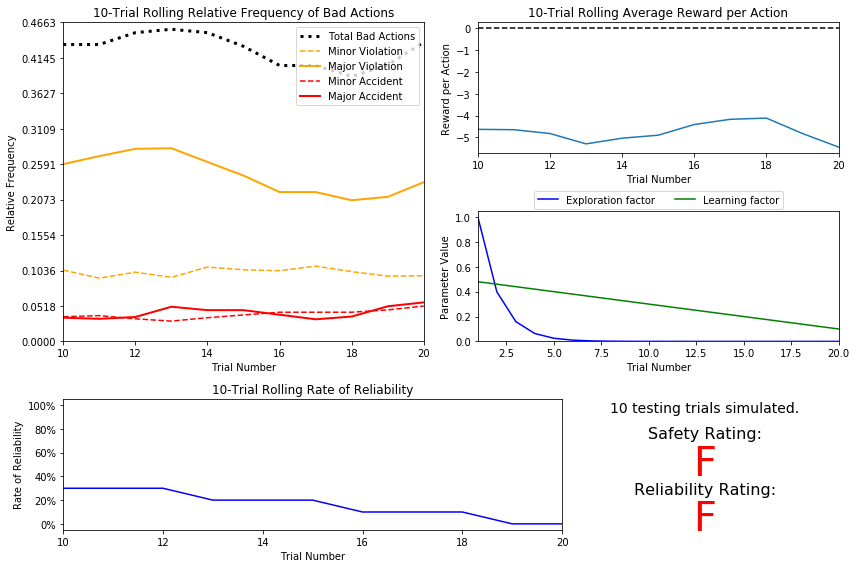

In [64]:
# Load the 'sim_no-learning' log file from the initial simulation results
vs.plot_trials('C:\Users\dk2539\ML Nanodegree\Projects1\machine-learning-master\projects\smartcab\logs\sim_no-learning.csv')

### Question 3
Using the visualization above that was produced from your initial simulation, provide an analysis and make several observations about the driving agent. Be sure that you are making at least one observation about each panel present in the visualization. Some things you could consider:
- *How frequently is the driving agent making bad decisions? How many of those bad decisions cause accidents?*
- *Given that the agent is driving randomly, does the rate of reliability make sense?*
- *What kind of rewards is the agent receiving for its actions? Do the rewards suggest it has been penalized heavily?*
- *As the number of trials increases, does the outcome of results change significantly?*
- *Would this Smartcab be considered safe and/or reliable for its passengers? Why or why not?*

**Answer:**
A. "bad Actions" = Approximately 40% over the trials.
B. Yes, random is not a smart way to drive a cab. 
C. Average reward = -6.  This is likely not good.
D. Outcome does NOT improve as number of trials increases.
E. Both the Reliability & the Safety Ratings are "F" by the stated rubic.




-----
## Inform the Driving Agent
The second step to creating an optimized Q-learning driving agent is defining a set of states that the agent can occupy in the environment. Depending on the input, sensory data, and additional variables available to the driving agent, a set of states can be defined for the agent so that it can eventually *learn* what action it should take when occupying a state. The condition of `'if state then action'` for each state is called a **policy**, and is ultimately what the driving agent is expected to learn. Without defining states, the driving agent would never understand which action is most optimal -- or even what environmental variables and conditions it cares about!

### Identify States
Inspecting the `'build_state()'` agent function shows that the driving agent is given the following data from the environment:
- `'waypoint'`, which is the direction the *Smartcab* should drive leading to the destination, relative to the *Smartcab*'s heading.
- `'inputs'`, which is the sensor data from the *Smartcab*. It includes 
  - `'light'`, the color of the light.
  - `'left'`, the intended direction of travel for a vehicle to the *Smartcab*'s left. Returns `None` if no vehicle is present.
  - `'right'`, the intended direction of travel for a vehicle to the *Smartcab*'s right. Returns `None` if no vehicle is present.
  - `'oncoming'`, the intended direction of travel for a vehicle across the intersection from the *Smartcab*. Returns `None` if no vehicle is present.
- `'deadline'`, which is the number of actions remaining for the *Smartcab* to reach the destination before running out of time.

### Question 4
*Which features available to the agent are most relevant for learning both **safety** and **efficiency**? Why are these features appropriate for modeling the *Smartcab* in the environment? If you did not choose some features, why are those features* not *appropriate? Please note that whatever features you eventually choose for your agent's state, must be argued for here. That is: your code in agent.py should reflect the features chosen in this answer.
*

NOTE: You are not allowed to engineer new features for the smartcab. 

**Answer:**
A. The features that are important both efficiency and safety are epsilon, epsilon decay function & the alpha learning rate function.  Also, the "inputs" are important for enumerating where the driving pitfalls exist: oncoming traffic combined with completing 'left' turns.
B. The epsilon & its decay function allow for the learning random actions in the initial process to explore, but later in the trainning, the exporation is not so central to the process, the epsilon must be increasely a smaller positive proportion. The learning rate should a about .5 so the process does not learn to quickly ("over-learn"?) else missing the important 'knowledge'. 


### Define a State Space
When defining a set of states that the agent can occupy, it is necessary to consider the *size* of the state space. That is to say, if you expect the driving agent to learn a **policy** for each state, you would need to have an optimal action for *every* state the agent can occupy. If the number of all possible states is very large, it might be the case that the driving agent never learns what to do in some states, which can lead to uninformed decisions. For example, consider a case where the following features are used to define the state of the *Smartcab*:

`('is_raining', 'is_foggy', 'is_red_light', 'turn_left', 'no_traffic', 'previous_turn_left', 'time_of_day')`.

How frequently would the agent occupy a state like `(False, True, True, True, False, False, '3AM')`? Without a near-infinite amount of time for training, it's doubtful the agent would ever learn the proper action!

### Question 5
*If a state is defined using the features you've selected from **Question 4**, what would be the size of the state space? Given what you know about the environment and how it is simulated, do you think the driving agent could learn a policy for each possible state within a reasonable number of training trials?*  
**Hint:** Consider the *combinations* of features to calculate the total number of states!

**Answer:** the states are:
for 'light'    there are 2 states = (red, green)
for 'left'     there are 4 states = (left, right, straight, none)
for 'oncoming' from straight there are 2 states = (oncoming from straight, no oncoming straight)
for 'oncoming' from right there are 2 states = (oncoming from right, no oncoming right)
for 'oncoming' from left  there are 2 states = (oncoming from left, no oncoming left)

2x4x2x2x2  =  64 states total states,; this analysis ignores the current state 

### Update the Driving Agent State
For your second implementation, navigate to the `'build_state()'` agent function. With the justification you've provided in **Question 4**, you will now set the `'state'` variable to a tuple of all the features necessary for Q-Learning. Confirm your driving agent is updating its state by running the agent file and simulation briefly and note whether the state is displaying. If the visual simulation is used, confirm that the updated state corresponds with what is seen in the simulation.

**Note:** Remember to reset simulation flags to their default setting when making this observation!

-----
## Implement a Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to begin implementing the functionality of Q-Learning itself. The concept of Q-Learning is fairly straightforward: For every state the agent visits, create an entry in the Q-table for all state-action pairs available. Then, when the agent encounters a state and performs an action, update the Q-value associated with that state-action pair based on the reward received and the iterative update rule implemented. Of course, additional benefits come from Q-Learning, such that we can have the agent choose the *best* action for each state based on the Q-values of each state-action pair possible. For this project, you will be implementing a *decaying,* $\epsilon$*-greedy* Q-learning algorithm with *no* discount factor. Follow the implementation instructions under each **TODO** in the agent functions.

Note that the agent attribute `self.Q` is a dictionary: This is how the Q-table will be formed. Each state will be a key of the `self.Q` dictionary, and each value will then be another dictionary that holds the *action* and *Q-value*. Here is an example:

```
{ 'state-1': { 
    'action-1' : Qvalue-1,
    'action-2' : Qvalue-2,
     ...
   },
  'state-2': {
    'action-1' : Qvalue-1,
     ...
   },
   ...
}
```

Furthermore, note that you are expected to use a *decaying* $\epsilon$ *(exploration) factor*. Hence, as the number of trials increases, $\epsilon$ should decrease towards 0. This is because the agent is expected to learn from its behavior and begin acting on its learned behavior. Additionally, The agent will be tested on what it has learned after $\epsilon$ has passed a certain threshold (the default threshold is 0.05). For the initial Q-Learning implementation, you will be implementing a linear decaying function for $\epsilon$.

### Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.

In addition, use the following decay function for $\epsilon$:

$$ \epsilon_{t+1} = \epsilon_{t} - 0.05, \hspace{10px}\textrm{for trial number } t$$

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the initial Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

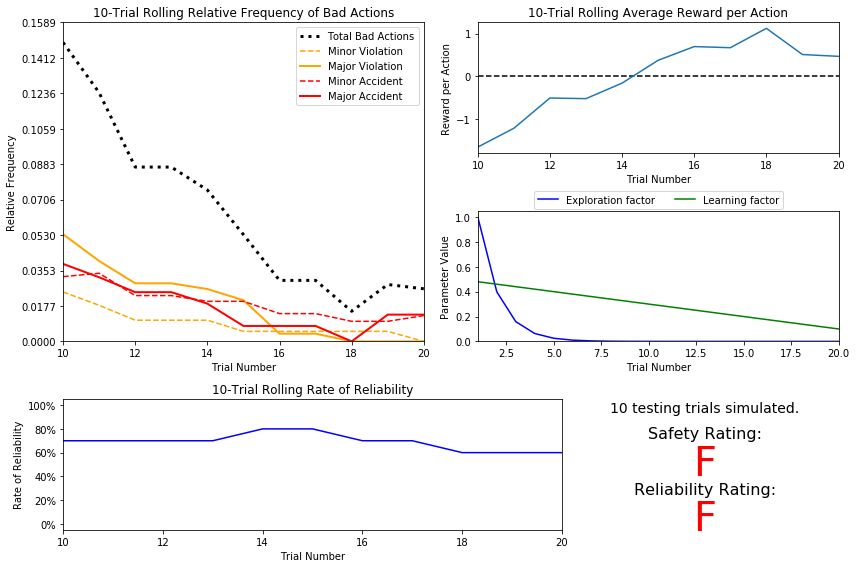

In [24]:
# Load the 'sim_default-learning' file from the default Q-Learning simulation
vs.plot_trials('C:\Users\dk2539\ML Nanodegree\Projects1\machine-learning-master\projects\smartcab\logs\sim_default-learning.csv')

### Question 6
Using the visualization above that was produced from your default Q-Learning simulation, provide an analysis and make observations about the driving agent like in **Question 3**. Note that the simulation should have also produced the Q-table in a text file which can help you make observations about the agent's learning. Some additional things you could consider:  
- *Are there any observations that are similar between the basic driving agent and the default Q-Learning agent?*
- *Approximately how many training trials did the driving agent require before testing? Does that number make sense given the epsilon-tolerance?*
- *Is the decaying function you implemented for $\epsilon$ (the exploration factor) accurately represented in the parameters panel?*
- *As the number of training trials increased, did the number of bad actions decrease? Did the average reward increase?*
- *How does the safety and reliability rating compare to the initial driving agent?*

**Answer:**
A. The "Default" is much better than the "Basic" Q-Learning agent as judged by the graphic deplay above compared the graphics above Question #3.
B. Approximately 20 trials before testing.
C. exp(-.6*num_trial) is the approximate epsilon function used (derived from reverse function)
D. Yes, the number of 'bad' action decreased and the rewards did recrease.
E. In both the basic and the default cases, the Reliability and Safety ranking were "F"s.


-----
## Improve the Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to perform the optimization! Now that the Q-Learning algorithm is implemented and the driving agent is successfully learning, it's necessary to tune settings and adjust learning paramaters so the driving agent learns both **safety** and **efficiency**. Typically this step will require a lot of trial and error, as some settings will invariably make the learning worse. One thing to keep in mind is the act of learning itself and the time that this takes: In theory, we could allow the agent to learn for an incredibly long amount of time; however, another goal of Q-Learning is to *transition from experimenting with unlearned behavior to acting on learned behavior*. For example, always allowing the agent to perform a random action during training (if $\epsilon = 1$ and never decays) will certainly make it *learn*, but never let it *act*. When improving on your Q-Learning implementation, consider the implications it creates and whether it is logistically sensible to make a particular adjustment.

### Improved Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.
- `'optimized'` - Set this to `'True'` to tell the driving agent you are performing an optimized version of the Q-Learning implementation.

Additional flags that can be adjusted as part of optimizing the Q-Learning agent:
- `'n_test'` - Set this to some positive number (previously 10) to perform that many testing trials.
- `'alpha'` - Set this to a real number between 0 - 1 to adjust the learning rate of the Q-Learning algorithm.
- `'epsilon'` - Set this to a real number between 0 - 1 to adjust the starting exploration factor of the Q-Learning algorithm.
- `'tolerance'` - set this to some small value larger than 0 (default was 0.05) to set the epsilon threshold for testing.

Furthermore, use a decaying function of your choice for $\epsilon$ (the exploration factor). Note that whichever function you use, it **must decay to **`'tolerance'`** at a reasonable rate**. The Q-Learning agent will not begin testing until this occurs. Some example decaying functions (for $t$, the number of trials):

$$ \epsilon = a^t, \textrm{for } 0 < a < 1 \hspace{50px}\epsilon = \frac{1}{t^2}\hspace{50px}\epsilon = e^{-at}, \textrm{for } 0 < a < 1 \hspace{50px} \epsilon = \cos(at), \textrm{for } 0 < a < 1$$
You may also use a decaying function for $\alpha$ (the learning rate) if you so choose, however this is typically less common. If you do so, be sure that it adheres to the inequality $0 \leq \alpha \leq 1$.

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the improved Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

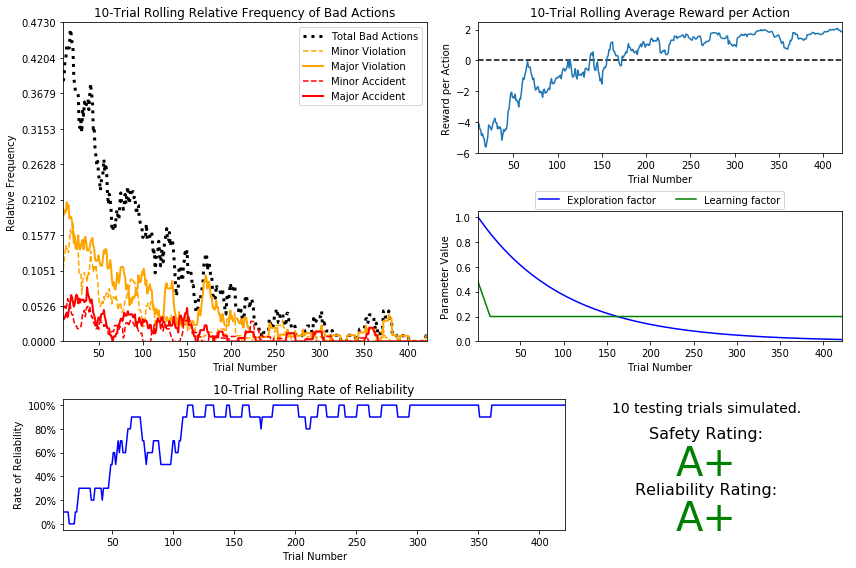

In [31]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('C:\Users\dk2539\ML Nanodegree\Projects1\machine-learning-master\projects\smartcab\logs\sim_improved-learning2a.csv')

### Question 7
Using the visualization above that was produced from your improved Q-Learning simulation, provide a final analysis and make observations about the improved driving agent like in **Question 6**. Questions you should answer:  
- *What decaying function was used for epsilon (the exploration factor)?*
- *Approximately how many training trials were needed for your agent before begining testing?*
- *What epsilon-tolerance and alpha (learning rate) did you use? Why did you use them?*
- *How much improvement was made with this Q-Learner when compared to the default Q-Learner from the previous section?*
- *Would you say that the Q-Learner results show that your driving agent successfully learned an appropriate policy?*
- *Are you satisfied with the safety and reliability ratings of the *Smartcab*?*

**Answer:**
A. The epsilon decay function I used is self.epsilon = math.exp(-.05*self.trial_num). 
B. Approximately 400 trials for learning before testing.
C. I used the "epsilon tolerance" = .015 and "learning rate" = alpha = .5. Both are small and were recommendated in the Project Notes above.
D. The improvement was notable across the entire domain of trials for the one chosen compared the default, but the number of trials were greater in the chosen model.  
E.  Clearly the driving agent 'learned' successfully in the chosen model.
F.  I am very satisfied with this exercise both the reliability & safety!!

### Define an Optimal Policy

Sometimes, the answer to the important question *"what am I trying to get my agent to learn?"* only has a theoretical answer and cannot be concretely described. Here, however, you can concretely define what it is the agent is trying to learn, and that is the U.S. right-of-way traffic laws. Since these laws are known information, you can further define, for each state the *Smartcab* is occupying, the optimal action for the driving agent based on these laws. In that case, we call the set of optimal state-action pairs an **optimal policy**. Hence, unlike some theoretical answers, it is clear whether the agent is acting "incorrectly" not only by the reward (penalty) it receives, but also by pure observation. If the agent drives through a red light, we both see it receive a negative reward but also know that it is not the correct behavior. This can be used to your advantage for verifying whether the **policy** your driving agent has learned is the correct one, or if it is a **suboptimal policy**.

### Question 8

1. Please summarize what the optimal policy is for the smartcab in the given environment. What would be the best set of instructions possible given what we know about the environment? 
   _You can explain with words or a table, but you should thoroughly discuss the optimal policy._

2. Next, investigate the `'sim_improved-learning.txt'` text file to see the results of your improved Q-Learning algorithm. _For each state that has been recorded from the simulation, is the **policy** (the action with the highest value) correct for the given state? Are there any states where the policy is different than what would be expected from an optimal policy?_ 

3. Provide a few examples from your recorded Q-table which demonstrate that your smartcab learned the optimal policy. Explain why these entries demonstrate the optimal policy.

4. Try to find at least one entry where the smartcab did _not_ learn the optimal policy.  Discuss why your cab may have not learned the correct policy for the given state.

Be sure to document your `state` dictionary below, it should be easy for the reader to understand what each state represents.

**Answer:** 
A. By making slight changes to the epsilon & alpha, I believe I can achieve better reward scores and shorter completion durations.
B. Are these policies?  Yes, These are not what i had expected.
C. 2 Optimal Policy Examples are:
('left', 'green', 'left', None)
 -- forward : 0.30
 -- right : 0.53
 -- None : -4.76
 -- left : 1.75
 so left with the highest reward would be the optimal choice


('left', 'green', 'forward', 'left')
 -- forward : 0.39
 -- right : 0.80
 -- None : 0.00
 -- left : 0.00
 so right with the highest reward would the optimal choice

D. All states have at least one possible reward so all states have an optimal policy (action).


-----
### Optional: Future Rewards - Discount Factor, `'gamma'`
Curiously, as part of the Q-Learning algorithm, you were asked to **not** use the discount factor, `'gamma'` in the implementation. Including future rewards in the algorithm is used to aid in propagating positive rewards backwards from a future state to the current state. Essentially, if the driving agent is given the option to make several actions to arrive at different states, including future rewards will bias the agent towards states that could provide even more rewards. An example of this would be the driving agent moving towards a goal: With all actions and rewards equal, moving towards the goal would theoretically yield better rewards if there is an additional reward for reaching the goal. However, even though in this project, the driving agent is trying to reach a destination in the allotted time, including future rewards will not benefit the agent. In fact, if the agent were given many trials to learn, it could negatively affect Q-values!

### Optional Question 9
*There are two characteristics about the project that invalidate the use of future rewards in the Q-Learning algorithm. One characteristic has to do with the *Smartcab* itself, and the other has to do with the environment. Can you figure out what they are and why future rewards won't work for this project?*

**Answer:**


> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.